# Telecom Churn case study

###### Problem Statement:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
- For many incumbent operators, retaining high profitable customers is the number one business goal. 
- To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

###### Requirement:

- Analyse customer-level data of a leading telecom firm.
- Build predictive models to identify customers at high risk of churn.
- Identify the main indicators of churn.

###### Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
pd.set_option('float_format', '{:f}'.format)
%matplotlib inline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import PowerTransformer

# settings to see the data.
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.max_colwidth', -1)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the data dictionary
dic = pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")

## Data Dictionary

In [3]:
dic

Acronyms      \
0   MOBILE_NUMBER   
1   CIRCLE_ID       
2   LOC             
3   STD             
4   IC              
5   OG              
6   T2T             
7   T2M             
8   T2O             
9   T2F             
10  T2C             
11  ARPU            
12  MOU             
13  AON             
14  ONNET           
15  OFFNET          
16  ROAM            
17  SPL             
18  ISD             
19  RECH            
20  NUM             
21  AMT             
22  MAX             
23  DATA            
24  3G              
25  AV              
26  VOL             
27  2G              
28  PCK             
29  NIGHT           
30  MONTHLY         
31  SACHET          
32  *.6             
33  *.7             
34  *.8             
35  *.9             
36  FB_USER         
37  VBC             

                                                                          Descriptions  
0   Customer phone number                                                               
1   Telecom circle area to which the customer belongs to                                
2   Local calls - within same telecom circle                                            
3   STD calls - outside the calling circle                                              
4   Incoming calls                                                                      
5   Outgoing calls                                                                      
6   Operator T to T, i.e. within same operator (mobile to mobile)                       
7   Operator T to other operator mobile                                                 
8   Operator T to other operator fixed line                                             
9   Operator T to fixed lines of T                                                      
10  Operator T to it’s own call center                                                  
11  Average revenue per user                                                            
12  Minutes of usage - voice calls                                                      
13  Age on network - number of days the customer is using the operator T network        
14  All kind of calls within the same operator network                                  
15  All kind of calls outside the operator T network                                    
16  Indicates that customer is in roaming zone during the call                          
17  Special calls                                                                       
18  ISD calls                                                                           
19  Recharge                                                                            
20  Number                                                                              
21  Amount in local currency                                                            
22  Maximum                                                                             
23  Mobile internet                                                                     
24  3G network                                                                          
25  Average                                                                             
26  Mobile internet usage volume (in MB)                                                
27  2G network                                                                          
28  Prepaid service schemes called - PACKS                                              
29  Scheme to use during specific night hours only                                      
30  Service schemes with validity equivalent to a month                                 
31  Service schemes with validity smaller than a month                                  
32  KPI for the month of June                                                           
33  KPI for the month of July                                                           
34  KPI for the month of August                                       

In [4]:
#Read the telecom churn csv file
telecom_churn_df = pd.read_csv("telecom_churn_data.csv")

In [5]:
telecom_churn_df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  7000842753     109       0.000000        0.000000        0.000000          
1  7001865778     109       0.000000        0.000000        0.000000          
2  7001625959     109       0.000000        0.000000        0.000000          
3  7001204172     109       0.000000        0.000000        0.000000          
4  7000142493     109       0.000000        0.000000        0.000000          

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0  6/30/2014            7/31/2014            8/31/2014             
1  6/30/2014            7/31/2014            8/31/2014             
2  6/30/2014            7/31/2014            8/31/2014             
3  6/30/2014            7/31/2014            8/31/2014             
4  6/30/2014            7/31/2014            8/31/2014             

  last_date_of_month_9     arpu_6     arpu_7     arpu_8     arpu_9  \
0  9/30/2014           197.385000 214.816000 213.803000 21.100000    
1  9/30/2014           34.047000  355.074000 268.321000 86.285000    
2  9/30/2014           167.690000 189.058000 210.226000 290.714000   
3  9/30/2014           221.338000 251.102000 508.054000 389.500000   
4  9/30/2014           261.636000 309.876000 238.174000 163.426000   

   onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
0 nan          nan          0.000000     nan          nan             
1 24.110000    78.680000    7.680000     18.340000    15.740000       
2 11.540000    55.240000    37.260000    74.810000    143.330000      
3 99.910000    54.390000    310.980000   241.710000   123.310000      
4 50.310000    149.440000   83.890000    58.780000    76.960000       

   offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0 nan           0.000000      nan           nan            nan              
1 99.840000     304.760000    53.760000     0.000000       0.000000         
2 220.590000    208.360000    118.910000    0.000000       0.000000         
3 109.010000    71.680000     113.540000    0.000000       54.860000        
4 91.880000     124.260000    45.810000     0.000000       0.000000         

   roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0 0.000000       nan            nan            nan            0.000000         
1 0.000000       0.000000       0.000000       0.000000       0.000000         
2 0.000000       38.490000      0.000000       0.000000       0.000000         
3 44.380000      0.000000       0.000000       28.090000      39.040000        
4 0.000000       0.000000       0.000000       0.000000       0.000000         

   roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0 nan            nan               nan               0.000000            
1 0.000000       23.880000         74.560000         7.680000            
2 70.940000      7.190000          28.740000         13.580000           
3 0.000000       73.680000         34.810000         10.610000           
4 0.000000       50.310000         149.440000        83.890000           

   loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0 nan               nan               nan               0.000000            
1 18.340000         11.510000         75.940000         291.860000          
2 14.390000         29.340000         16.860000         38.460000           
3 15.490000         107.430000        83.210000         22.460000           
4 58.780000         67.640000         91.880000         124.260000          

   loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0 nan               nan               nan               0.000000            
1 53.760000         0.000000          0.000000          0.000000            
2 28.160000         24.110000         21.790000         15.610000           
3 65.460000         1.910000          0.650000          4.910000            
4 37.890000         0.000000      

### Get unique elements in column

In [6]:
unique = telecom_churn_df.nunique()
unique

mobile_number               99999
circle_id                   1    
loc_og_t2o_mou              1    
std_og_t2o_mou              1    
loc_ic_t2o_mou              1    
last_date_of_month_6        1    
last_date_of_month_7        1    
last_date_of_month_8        1    
last_date_of_month_9        1    
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
onnet_mou_6                 24313
onnet_mou_7                 24336
onnet_mou_8                 24089
onnet_mou_9                 23565
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
roam_ic_mou_6               6512 
roam_ic_mou_7               5230 
roam_ic_mou_8               5315 
roam_ic_mou_9               4827 
roam_og_mou_6               8038 
roam_og_mou_7               6639 
roam_og_mou_8               6504 
roam_og_mou_9               5882 
loc_og_t2t_mou

In [7]:
#Eliminate columns with just 1 value
telecom_churn_df = telecom_churn_df[unique.index[unique.values>1]]

In [8]:
#Check for null values in the data columnwise
perc_na=round(100*(telecom_churn_df.isnull().sum()/len(telecom_churn_df.index)), 2)

In [9]:
header=['Name']
perc_na_df=pd.DataFrame(perc_na,columns=header)

In [10]:
#Columns having 0-5% null values
na_5 = perc_na_df[(perc_na_df['Name']<5.000) & (perc_na_df['Name']>00.00)]

In [11]:
#Columns having 5-10% null values
na_10 = perc_na_df[(perc_na_df['Name']<10.000) & (perc_na_df['Name']>05.00)]

In [12]:
#Columns having more than 70% null values
na_70 = perc_na_df[(perc_na_df['Name']>70.00)]

In [13]:
#Check for columns having between 10-70% null values
perc_na_df[(perc_na_df['Name']>10.000) & (perc_na_df['Name']<70.000)]

Empty DataFrame
Columns: [Name]
Index: []

#### No Columns with 10-70% Null values

In [14]:
#Find the columns which have more than 70% null values
perc_na_df[perc_na_df['Name']>70.000].count()

Name    40
dtype: int64

In [15]:
#Check unique values of each column having null vlaues greater than 70%
print("date_of_last_rech_data_6 --", telecom_churn_df.date_of_last_rech_data_6.unique())
print("date_of_last_rech_data_7 --", telecom_churn_df.date_of_last_rech_data_7.unique())
print("date_of_last_rech_data_8 --", telecom_churn_df.date_of_last_rech_data_8.unique())
print("date_of_last_rech_data_9 --", telecom_churn_df.date_of_last_rech_data_9.unique())
print("-"*100)
print("count_rech_2g_6 --", telecom_churn_df.count_rech_2g_6.unique())
print("count_rech_2g_7 --", telecom_churn_df.count_rech_2g_7.unique())
print("count_rech_2g_8 --", telecom_churn_df.count_rech_2g_8.unique())
print("count_rech_2g_9 --", telecom_churn_df.count_rech_2g_9.unique())
print("-"*100)
print("count_rech_3g_6 --", telecom_churn_df.count_rech_3g_6.unique())
print("count_rech_3g_7 --", telecom_churn_df.count_rech_3g_7.unique())
print("count_rech_3g_8 --", telecom_churn_df.count_rech_3g_8.unique())
print("count_rech_3g_9 --", telecom_churn_df.count_rech_3g_9.unique())
print("-"*100)
print("total_rech_data_6 --", telecom_churn_df.total_rech_data_6.unique())
print("total_rech_data_7 --", telecom_churn_df.total_rech_data_7.unique())
print("total_rech_data_8 --", telecom_churn_df.total_rech_data_8.unique())
print("total_rech_data_9 --", telecom_churn_df.total_rech_data_9.unique())
print("-"*100)
print("max_rech_data_6 --", telecom_churn_df.max_rech_data_6.unique())
print("max_rech_data_7 --", telecom_churn_df.max_rech_data_7.unique())
print("max_rech_data_8 --", telecom_churn_df.max_rech_data_8.unique())
print("max_rech_data_9 --", telecom_churn_df.max_rech_data_9.unique())
print("-"*100)
print("arpu_2g_6 --", telecom_churn_df.arpu_2g_6.unique())
print("arpu_2g_7 --", telecom_churn_df.arpu_2g_7.unique())
print("arpu_2g_8 --", telecom_churn_df.arpu_2g_8.unique())
print("arpu_2g_9 --", telecom_churn_df.arpu_2g_9.unique())
print("-"*100)
print("arpu_3g_6 --", telecom_churn_df.arpu_3g_6.unique())
print("arpu_3g_7 --", telecom_churn_df.arpu_3g_7.unique())
print("arpu_3g_8 --", telecom_churn_df.arpu_3g_8.unique())
print("arpu_3g_9 --", telecom_churn_df.arpu_3g_9.unique())
print("-"*100)
print("night_pck_user_6 --", telecom_churn_df.night_pck_user_6.unique())
print("night_pck_user_7 --", telecom_churn_df.night_pck_user_7.unique())
print("night_pck_user_8--", telecom_churn_df.night_pck_user_8.unique())
print("night_pck_user_9 --", telecom_churn_df.night_pck_user_9.unique())
print("-"*100)
print("fb_user_6 --", telecom_churn_df.fb_user_6.unique())
print("fb_user_7 --", telecom_churn_df.fb_user_7.unique())
print("fb_user_8 --", telecom_churn_df.fb_user_8.unique())
print("fb_user_9 --", telecom_churn_df.fb_user_9.unique())
print("-"*100)

date_of_last_rech_data_6 -- ['6/21/2014' nan '6/4/2014' '6/27/2014' '6/30/2014' '6/6/2014' '6/2/2014'
 '6/12/2014' '6/19/2014' '6/29/2014' '6/5/2014' '6/17/2014' '6/11/2014'
 '6/25/2014' '6/10/2014' '6/20/2014' '6/23/2014' '6/13/2014' '6/26/2014'
 '6/16/2014' '6/14/2014' '6/24/2014' '6/28/2014' '6/15/2014' '6/9/2014'
 '6/22/2014' '6/1/2014' '6/8/2014' '6/7/2014' '6/18/2014' '6/3/2014']
date_of_last_rech_data_7 -- ['7/16/2014' '7/25/2014' nan '7/31/2014' '7/23/2014' '7/7/2014'
 '7/27/2014' '7/2/2014' '7/28/2014' '7/12/2014' '7/4/2014' '7/5/2014'
 '7/6/2014' '7/26/2014' '7/19/2014' '7/10/2014' '7/11/2014' '7/29/2014'
 '7/18/2014' '7/9/2014' '7/24/2014' '7/14/2014' '7/13/2014' '7/22/2014'
 '7/30/2014' '7/20/2014' '7/21/2014' '7/15/2014' '7/8/2014' '7/17/2014'
 '7/1/2014' '7/3/2014']
date_of_last_rech_data_8 -- ['8/8/2014' '8/10/2014' nan '8/23/2014' '8/24/2014' '8/21/2014'
 '8/30/2014' '8/6/2014' '8/25/2014' '8/7/2014' '8/26/2014' '8/11/2014'
 '8/2/2014' '8/31/2014' '8/20/2014' '8/29/2014

## Data Cleaning

In [16]:
#As Night pack user and fb user columns have only 0 and 1s. Let's impute by adding min value
for column in telecom_churn_df.filter(regex ='user').columns:
    telecom_churn_df[column].replace(np.nan, 0, inplace = True)

In [17]:
# drop column with > 70% missing values
telecom_churn_df.drop(na_70.index, axis=1, inplace=True)

In [18]:
#After imputing all the variables having null values more than 70%, let's verify the null values which are above 70%
perc_na=round(100*(telecom_churn_df.isnull().sum()/len(telecom_churn_df.index)), 2)
perc_na.where(perc_na>10).count()

0

In [19]:
telecom_churn_df.shape

(99999, 170)

In [20]:
round(100*(telecom_churn_df.isnull().sum()/len(telecom_churn_df.index)), 2).max()

7.75

In [21]:
#impute date columns
date_columns = telecom_churn_df.filter(regex ='date').columns

In [22]:
for d in date_columns:
    telecom_churn_df[d] = pd.to_datetime(telecom_churn_df[d]).dt.day
    telecom_churn_df[d].fillna(int(telecom_churn_df[d].mean()), inplace=True)

In [23]:
#check the type of  variables in data frame
telecom_churn_df.dtypes.value_counts()

float64    136
int64      34 
dtype: int64

### Impute columns where nan values % is less than 10

In [24]:
#impute the missing values for variables having upto 10%
perc_na_df_10=perc_na_df[(perc_na_df['Name']<10) & (perc_na_df['Name']>0)]
perc_na_df_10.count()

Name    112
dtype: int64

In [25]:
columns_name = telecom_churn_df.columns

In [26]:
# Impute remaining values using iterative imputer
telecom_churn_df = pd.DataFrame(IterativeImputer().fit_transform(telecom_churn_df))

In [27]:
#Check if null values exist
telecom_churn_df.isnull().sum().sum()

0

In [28]:
telecom_churn_df.columns = columns_name
telecom_churn_df.shape

(99999, 170)

### Find the High Value Customer

In [29]:
telecom_churn_df.head()

mobile_number     arpu_6     arpu_7     arpu_8     arpu_9  onnet_mou_6  \
0 7000842753.000000 197.385000 214.816000 213.803000 21.100000  -44.438098     
1 7001865778.000000 34.047000  355.074000 268.321000 86.285000  24.110000      
2 7001625959.000000 167.690000 189.058000 210.226000 290.714000 11.540000      
3 7001204172.000000 221.338000 251.102000 508.054000 389.500000 99.910000      
4 7000142493.000000 261.636000 309.876000 238.174000 163.426000 50.310000      

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0 -16.626867   0.000000     -32.636006   186.655305    174.503612      
1 78.680000    7.680000     18.340000    15.740000     99.840000       
2 55.240000    37.260000    74.810000    143.330000    220.590000      
3 54.390000    310.980000   241.710000   123.310000    109.010000      
4 149.440000   83.890000    58.780000    76.960000     91.880000       

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0 0.000000      172.488312    33.384555      21.765562      0.000000         
1 304.760000    53.760000     0.000000       0.000000       0.000000         
2 208.360000    118.910000    0.000000       0.000000       0.000000         
3 71.680000     113.540000    0.000000       54.860000      44.380000        
4 124.260000    45.810000     0.000000       0.000000       0.000000         

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0 21.134706      13.974016      5.455431       0.000000       3.273219         
1 0.000000       0.000000       0.000000       0.000000       0.000000         
2 38.490000      0.000000       0.000000       0.000000       70.940000        
3 0.000000       0.000000       28.090000      39.040000      0.000000         
4 0.000000       0.000000       0.000000       0.000000       0.000000         

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0 41.029962         27.189186         0.000000          34.806762           
1 23.880000         74.560000         7.680000          18.340000           
2 7.190000          28.740000         13.580000         14.390000           
3 73.680000         34.810000         10.610000         15.490000           
4 50.310000         149.440000        83.890000         58.780000           

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0 93.337673         91.389217         0.000000          90.477521           
1 11.510000         75.940000         291.860000        53.760000           
2 29.340000         16.860000         38.460000         28.160000           
3 107.430000        83.210000         22.460000         65.460000           
4 67.640000         91.880000         124.260000        37.890000           

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0 3.750886          3.797937          0.000000          3.642997            
1 0.000000          0.000000          0.000000          0.000000            
2 24.110000         21.790000         15.610000         22.240000           
3 1.910000          0.650000          4.910000          2.060000            
4 0.000000          0.000000          0.000000          1.930000            

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0 -7.823876         -14.679529        0.000000          -10.582539          
1 0.000000          2.910000          0.000000          0.000000            
2 0.000000          135.540000        45.760000         0.480000            
3 0.000000          0.000000          0.000000          0.000000            
4 0.000000          0.000000          0.000000          0.000000            

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0 5.198265      -12.594821    0.000000      -21.365351    92.121163           
1 35.390000     150.510000    299.540000    72.110000     0.230000            
2 60.660000     67.410000     67.660000     64.810000

#### Get total recharge amount for 6th and 7th months - Good phase

In [30]:
telecom_churn_df.total_rech_amt_avg = (telecom_churn_df.total_rech_amt_6 +telecom_churn_df.total_rech_amt_7)/2

##### Find total recharge amount for 6th and 7th months - Good phase

In [31]:
#Finding good phase for filtering HVC
telecom_churn_df.total_rech_amt_good_phase=(telecom_churn_df.total_rech_amt_avg)

In [32]:
telecom_churn_df.total_rech_amt_good_phase.describe()

count   99999.000000
mean    325.238792  
std     370.833466  
min     0.000000    
25%     115.000000  
50%     229.000000  
75%     419.000000  
max     37762.500000
dtype: float64

Compute the 70 percentile of High Value Customer data set

In [33]:
_70percentile = telecom_churn_df.total_rech_amt_good_phase.quantile(q=0.7)

In [34]:
print(_70percentile)

368.5


##### Fetching High Value customer of more than 70th percentile(inclusive) of data set

In [35]:
telecom_churn_df_high = telecom_churn_df[(telecom_churn_df.total_rech_amt_good_phase >= _70percentile)]

In [36]:
telecom_churn_df_high.describe()

mobile_number       arpu_6       arpu_7       arpu_8       arpu_9  \
count 30011.000000      30011.000000 30011.000000 30011.000000 30011.000000   
mean  7001222923.595415 587.284404   589.135427   534.857433   488.656197     
std   684640.490765     442.722413   462.897814   492.259586   496.486834     
min   7000000074.000000 -2258.709000 -2014.045000 -945.808000  -1899.505000   
25%   7000641091.500000 364.161000   365.004500   289.609500   239.184000     
50%   7001231966.000000 495.682000   493.561000   452.091000   413.152000     
75%   7001813975.000000 703.922000   700.788000   671.150000   635.553000     
max   7002410905.000000 27731.088000 35145.834000 33543.624000 38805.617000   

       onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
count 30011.000000 30011.000000 30011.000000 30011.000000 30011.000000    
mean  295.569126   304.177482   266.231682   238.881455   419.897852      
std   461.097176   481.891849   467.416946   443.904788   469.227234      
min   -66.389592   -318.468488  -505.548715  -327.784848  0.000000        
25%   41.130000    40.960000    27.010000    18.140000    142.825000      
50%   125.830000   125.460000   99.440000    82.880000    282.190000      
75%   353.310000   359.925000   297.735000   260.785000   523.125000      
max   7376.710000  8157.780000  10752.560000 10427.460000 8362.360000     

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count 30011.000000  30011.000000  30011.000000  30011.000000   30011.000000     
mean  425.689319    380.458605    346.893217    17.777082      13.733325        
std   485.299927    474.167109    438.897754    79.201308      76.346868        
min   0.000000      0.000000      0.000000      -156.445560    -91.719660       
25%   141.185000    111.730000    96.350000     0.000000       0.000000         
50%   281.940000    240.940000    208.210000    0.000000       0.000000         
75%   532.695000    482.610000    434.430000    0.000000       0.000000         
max   9667.130000   14007.340000  10310.760000  2613.310000    3813.290000      

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count 30011.000000   30011.000000   30011.000000   30011.000000     
mean  14.501697      12.897271      29.470346      22.092268        
std   74.932932      68.629380      118.542432     97.914354        
min   -381.036420    -244.379285    0.000000       -16.385778       
25%   0.000000       0.000000       0.000000       0.000000         
50%   0.000000       0.000000       0.000000       0.000000         
75%   0.000000       0.000000       0.000000       0.000000         
max   4169.810000    3220.660000    3775.110000    2812.040000      

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count 30011.000000   30011.000000   30011.000000      30011.000000        
mean  21.712004      17.429069      95.112718         96.004237           
std   106.204486     90.164106      236.713546        248.041586          
min   -11.994322     -4.028761      0.000000          0.000000            
25%   0.000000       0.000000       8.990000          9.760000            
50%   0.000000       0.000000       34.010000         33.160000           
75%   0.000000       0.000000       91.460000         91.480000           
max   5337.040000    4428.460000    6431.330000       7400.660000         

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count 30011.000000      30011.000000      30011.000000      30011.000000        
mean  88.061839         82.731527         182.262379        182.194218          
std   234.435628        227.371156        249.600653        240.200111          
min   0.000000          0.000000          0.000000          0.000000            
25%   7.760000          6.835000          32.210000         35.560000           
50%   29.494931         32.610000         101.240000        104.340000          
75%   84.670000         78.

In [37]:
round(100*(telecom_churn_df_high.isnull().sum()/len(telecom_churn_df_high.index)), 2)

mobile_number         0.000000
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
arpu_9                0.000000
onnet_mou_6           0.000000
onnet_mou_7           0.000000
onnet_mou_8           0.000000
onnet_mou_9           0.000000
offnet_mou_6          0.000000
offnet_mou_7          0.000000
offnet_mou_8          0.000000
offnet_mou_9          0.000000
roam_ic_mou_6         0.000000
roam_ic_mou_7         0.000000
roam_ic_mou_8         0.000000
roam_ic_mou_9         0.000000
roam_og_mou_6         0.000000
roam_og_mou_7         0.000000
roam_og_mou_8         0.000000
roam_og_mou_9         0.000000
loc_og_t2t_mou_6      0.000000
loc_og_t2t_mou_7      0.000000
loc_og_t2t_mou_8      0.000000
loc_og_t2t_mou_9      0.000000
loc_og_t2m_mou_6      0.000000
loc_og_t2m_mou_7      0.000000
loc_og_t2m_mou_8      0.000000
loc_og_t2m_mou_9      0.000000
loc_og_t2f_mou_6      0.000000
loc_og_t2f_mou_7      0.000000
loc_og_t2f_mou_8      0.000000
loc_og_t

##### Including churn information to dataframe

In [38]:
telecom_churn_df_high['usage_9'] = telecom_churn_df_high['total_ic_mou_9'] + telecom_churn_df_high['total_og_mou_9'] + telecom_churn_df_high['vol_3g_mb_9'] + telecom_churn_df_high['vol_2g_mb_9']

##### Get the churn data from 9th(Sept) month of data

In [39]:
telecom_churn_df_high["churn_data"] = [1 if value == 0 else 0 for value in telecom_churn_df_high.usage_9]

In [40]:
telecom_churn_df_high["churn_data"].describe()

count   30011.000000
mean    0.086402    
std     0.280961    
min     0.000000    
25%     0.000000    
50%     0.000000    
75%     0.000000    
max     1.000000    
Name: churn_data, dtype: float64

Review the churn data percentage 

In [41]:
(telecom_churn_df_high["churn_data"].sum()/telecom_churn_df_high["churn_data"].count())*100

8.64016527273333

Dropping 9th(Sept) month columns from data set 

In [42]:
drop_columns = telecom_churn_df_high.filter(regex ='9').columns
telecom_churn_df_high.drop(drop_columns, axis=1,inplace=True)

In [43]:
#Checking the shape of clean data after finding high value customers
telecom_churn_df_high.shape

(30011, 130)

## Derived metrics

In [44]:
# Find out ratio of revenue on happy/action phase
telecom_churn_df_high['arpu_ratio'] = ((telecom_churn_df_high.arpu_6 + telecom_churn_df_high.arpu_7)/2)/[1 if x ==0 else x for x in telecom_churn_df_high.arpu_8]

In [45]:
# Find out if customer centre call were made more in action phase
telecom_churn_df_high['call_centre_ratio'] = ((telecom_churn_df_high.loc_og_t2c_mou_6 + telecom_churn_df_high.loc_og_t2c_mou_7)/2)/[1 if x ==0 else x for x in telecom_churn_df_high.loc_og_t2c_mou_8]

In [46]:
# Find out ratio of usage from other network
telecom_churn_df_high['network_usage_diff'] = (telecom_churn_df_high.onnet_mou_8) - ( telecom_churn_df_high.offnet_mou_8)
# Find out ratio of usage from other network
telecom_churn_df_high['network_usage_diff_good'] = (telecom_churn_df_high.onnet_mou_6 + telecom_churn_df_high.onnet_mou_7 - telecom_churn_df_high.offnet_mou_6 - telecom_churn_df_high.offnet_mou_6)/2

In [47]:
# Find ratio of good/action for 2g
telecom_churn_df_high['2g_usage_ratio'] = ((telecom_churn_df_high.vol_2g_mb_6 + telecom_churn_df_high.vol_2g_mb_7)/2)/[1 if x ==0 else x for x in telecom_churn_df_high.vol_2g_mb_8]

In [48]:
# Find ratio of good/action for 3g
telecom_churn_df_high['3g_usage_ratio'] = ((telecom_churn_df_high.vol_3g_mb_6 + telecom_churn_df_high.vol_3g_mb_7)/2)/[1 if x ==0 else x for x in telecom_churn_df_high.vol_3g_mb_8]

In [49]:
# Find ratio of good/action for outgoing call
telecom_churn_df_high['og_ratio'] = ((telecom_churn_df_high.total_og_mou_6 + telecom_churn_df_high.total_og_mou_7)/2)/[1 if x ==0 else x for x in telecom_churn_df_high.total_og_mou_8]

In [50]:
# Find ratio of good/action for outgoing call
telecom_churn_df_high['ic_ratio'] = ((telecom_churn_df_high.total_ic_mou_6 + telecom_churn_df_high.total_ic_mou_7)/2)/[1 if x ==0 else x for x in telecom_churn_df_high.total_ic_mou_8]

In [51]:
# Find ratio of good/action for vbc
telecom_churn_df_high['vbc_difference'] = ((telecom_churn_df_high.jun_vbc_3g + telecom_churn_df_high.jul_vbc_3g)/2) - [1 if x ==0 else x for x in telecom_churn_df_high.aug_vbc_3g]

# EDA

In [52]:
# checking variance to see which columns hold most information
round(100*(np.var(telecom_churn_df_high.drop('mobile_number' , axis =1))/np.var(telecom_churn_df_high.drop('mobile_number' , axis =1)).sum()), 2).sort_values().tail()

vol_3g_mb_7   4.370000 
vol_3g_mb_8   4.400000 
vol_3g_mb_6   4.470000 
aon           5.670000 
arpu_ratio    12.250000
dtype: float64

In [53]:
telecom_churn_df_high.describe()

mobile_number       arpu_6       arpu_7       arpu_8  onnet_mou_6  \
count 30011.000000      30011.000000 30011.000000 30011.000000 30011.000000   
mean  7001222923.595415 587.284404   589.135427   534.857433   295.569126     
std   684640.490765     442.722413   462.897814   492.259586   461.097176     
min   7000000074.000000 -2258.709000 -2014.045000 -945.808000  -66.389592     
25%   7000641091.500000 364.161000   365.004500   289.609500   41.130000      
50%   7001231966.000000 495.682000   493.561000   452.091000   125.830000     
75%   7001813975.000000 703.922000   700.788000   671.150000   353.310000     
max   7002410905.000000 27731.088000 35145.834000 33543.624000 7376.710000    

       onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count 30011.000000 30011.000000 30011.000000  30011.000000  30011.000000    
mean  304.177482   266.231682   419.897852    425.689319    380.458605      
std   481.891849   467.416946   469.227234    485.299927    474.167109      
min   -318.468488  -505.548715  0.000000      0.000000      0.000000        
25%   40.960000    27.010000    142.825000    141.185000    111.730000      
50%   125.460000   99.440000    282.190000    281.940000    240.940000      
75%   359.925000   297.735000   523.125000    532.695000    482.610000      
max   8157.780000  10752.560000 8362.360000   9667.130000   14007.340000    

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count 30011.000000   30011.000000   30011.000000   30011.000000     
mean  17.777082      13.733325      14.501697      29.470346        
std   79.201308      76.346868      74.932932      118.542432       
min   -156.445560    -91.719660     -381.036420    0.000000         
25%   0.000000       0.000000       0.000000       0.000000         
50%   0.000000       0.000000       0.000000       0.000000         
75%   0.000000       0.000000       0.000000       0.000000         
max   2613.310000    3813.290000    4169.810000    3775.110000      

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count 30011.000000   30011.000000   30011.000000      30011.000000        
mean  22.092268      21.712004      95.112718         96.004237           
std   97.914354      106.204486     236.713546        248.041586          
min   -16.385778     -11.994322     0.000000          0.000000            
25%   0.000000       0.000000       8.990000          9.760000            
50%   0.000000       0.000000       34.010000         33.160000           
75%   0.000000       0.000000       91.460000         91.480000           
max   2812.040000    5337.040000    6431.330000       7400.660000         

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count 30011.000000      30011.000000      30011.000000      30011.000000        
mean  88.061839         182.262379        182.194218        170.458790          
std   234.435628        249.600653        240.200111        233.353939          
min   0.000000          0.000000          0.000000          0.000000            
25%   7.760000          32.210000         35.560000         28.480000           
50%   29.494931         101.240000        104.340000        91.748099           
75%   84.670000         240.165000        239.485000        223.590000          
max   10752.560000      4729.740000       4557.140000       4961.330000         

       loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
count 30011.000000      30011.000000      30011.000000      30011.000000        
mean  7.018827          7.135612          6.609229          1.485321            
std   22.656590         22.580006         20.193222         6.954467            
min   0.000000          0.000000          0.000000          -12.079722          
25%   0.000000          0.000000          0.000000          0.000000            
50%   0.430000          0.480000          0.450000          0.000000            
75%   5.0

# Univariate analysis

mobile_number


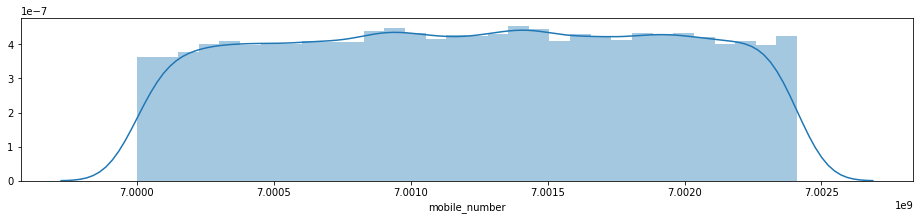

arpu_6


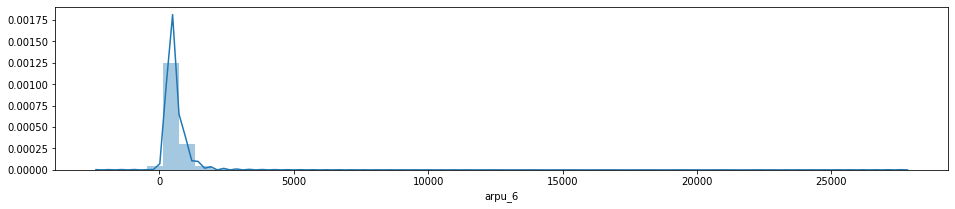

arpu_7


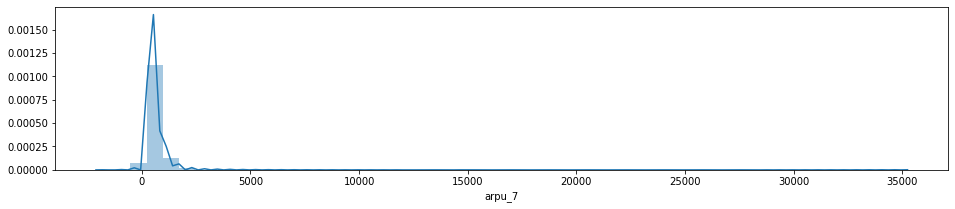

arpu_8


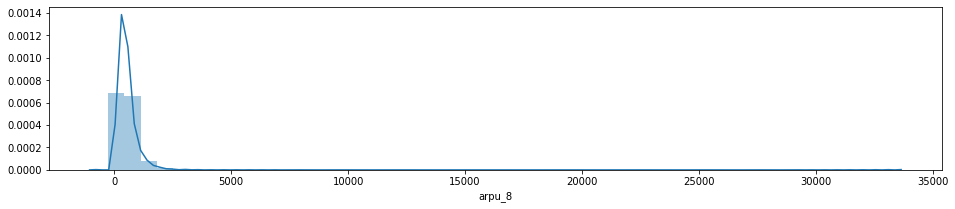

onnet_mou_6


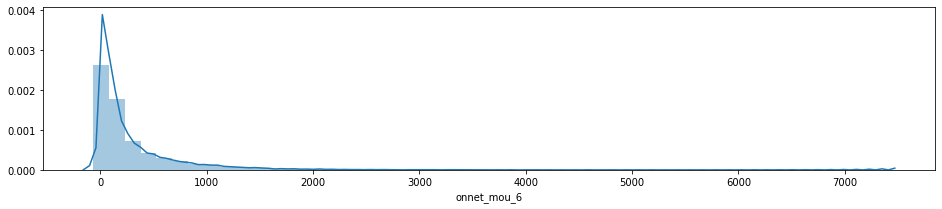

onnet_mou_7


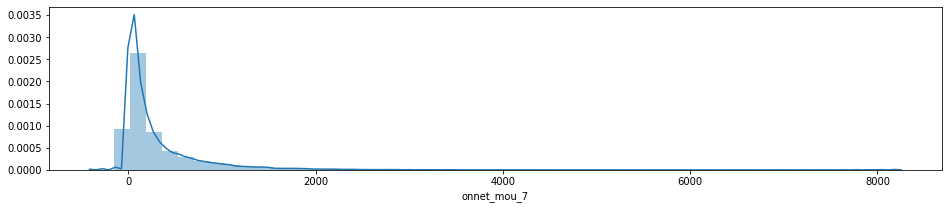

onnet_mou_8


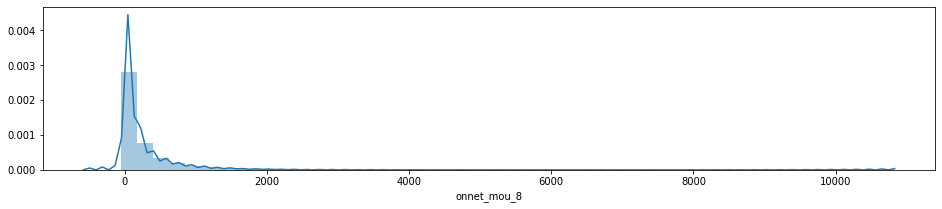

offnet_mou_6


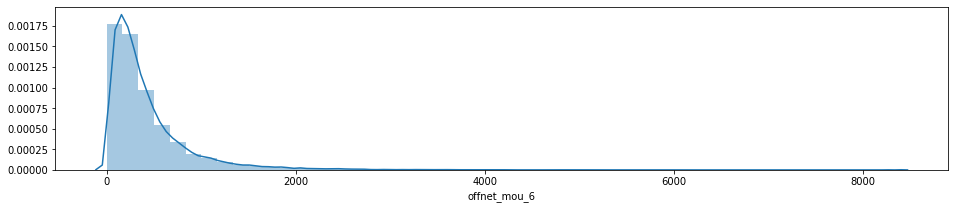

offnet_mou_7


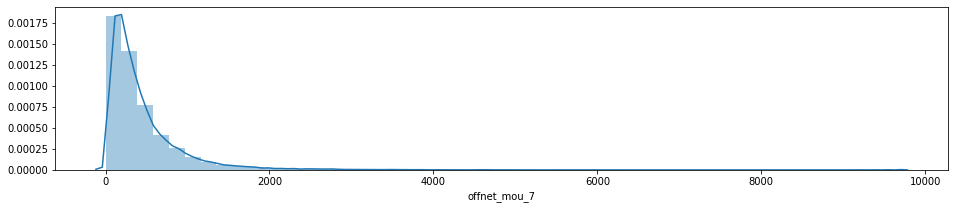

offnet_mou_8


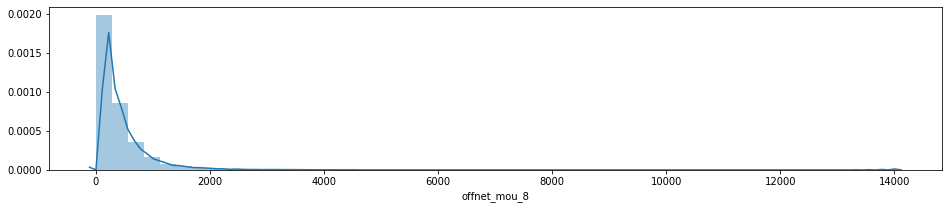

roam_ic_mou_6


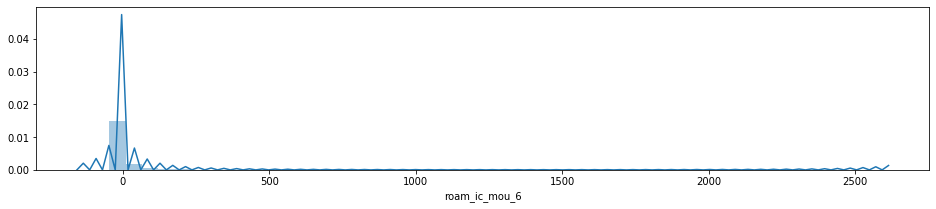

roam_ic_mou_7


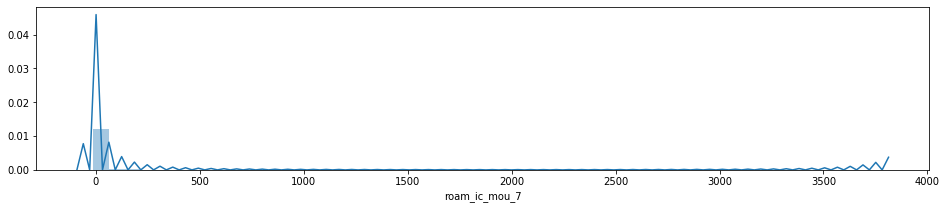

roam_ic_mou_8


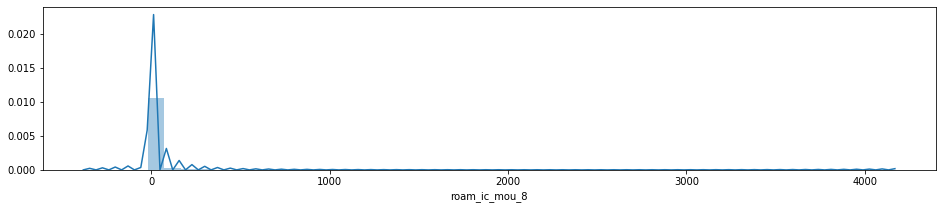

roam_og_mou_6


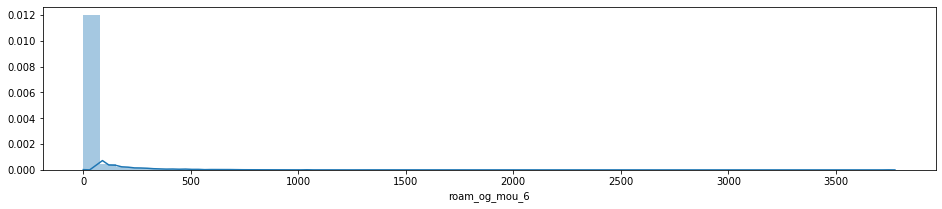

roam_og_mou_7


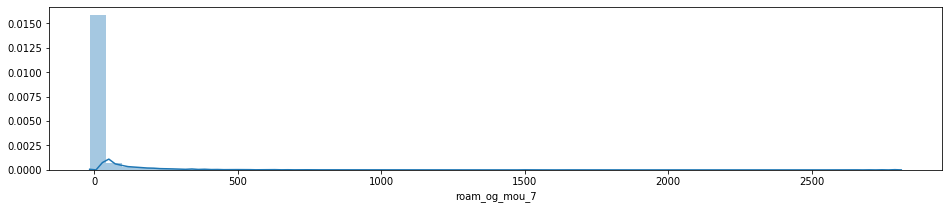

roam_og_mou_8


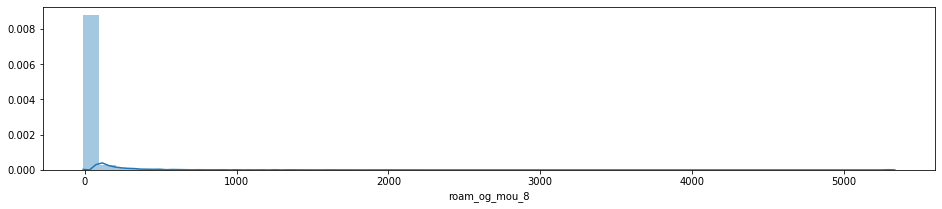

loc_og_t2t_mou_6


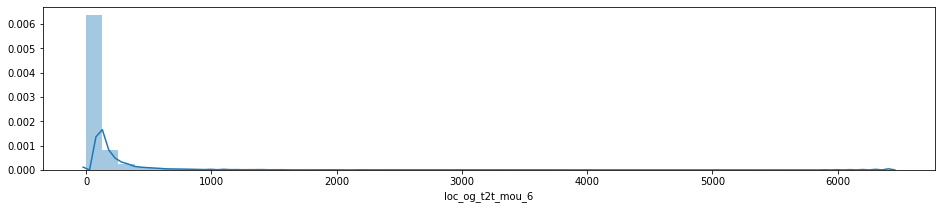

loc_og_t2t_mou_7


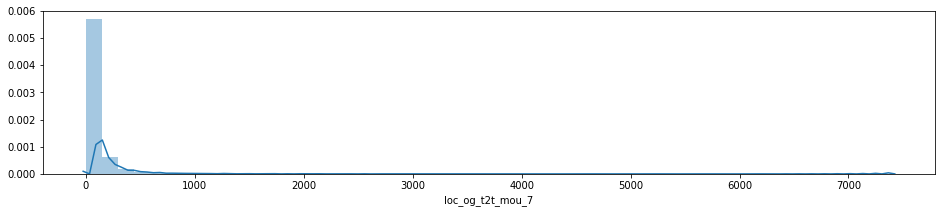

loc_og_t2t_mou_8


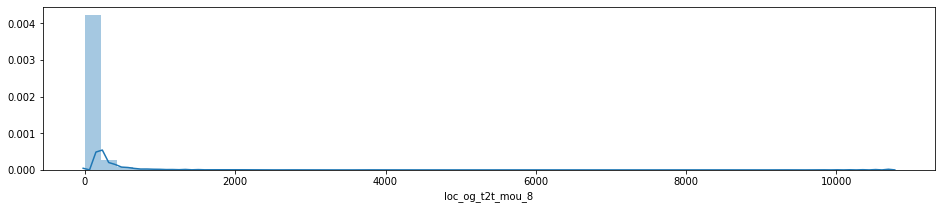

loc_og_t2m_mou_6


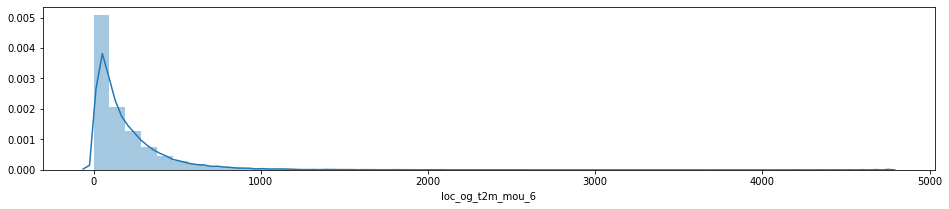

loc_og_t2m_mou_7


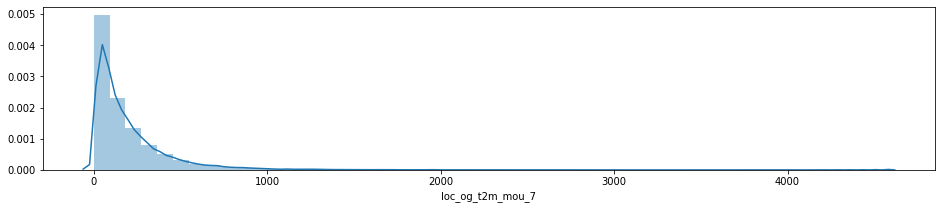

loc_og_t2m_mou_8


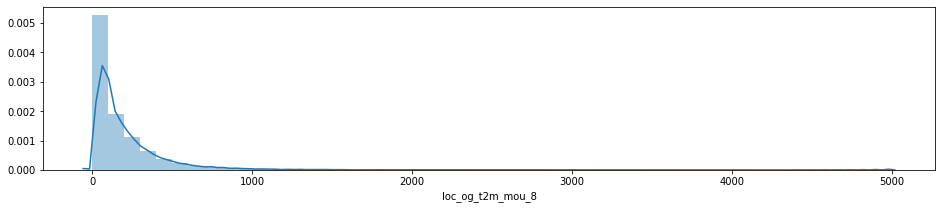

loc_og_t2f_mou_6


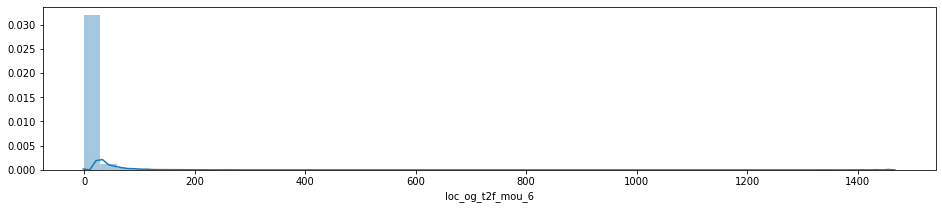

loc_og_t2f_mou_7


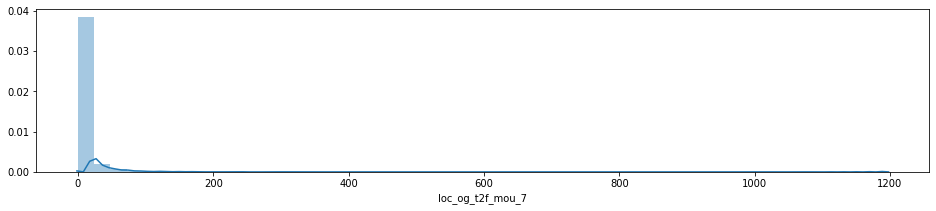

loc_og_t2f_mou_8


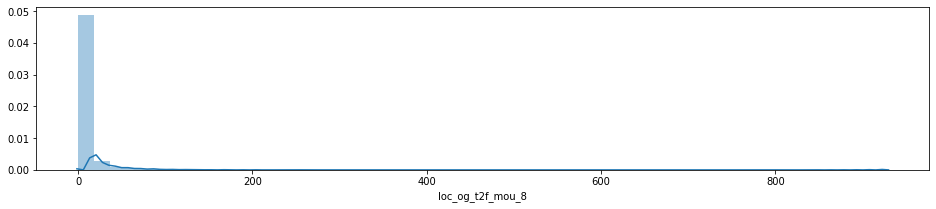

loc_og_t2c_mou_6


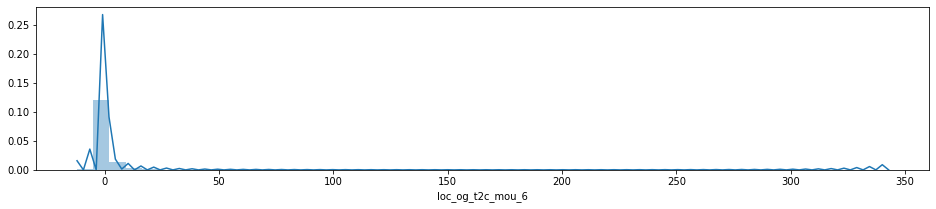

loc_og_t2c_mou_7


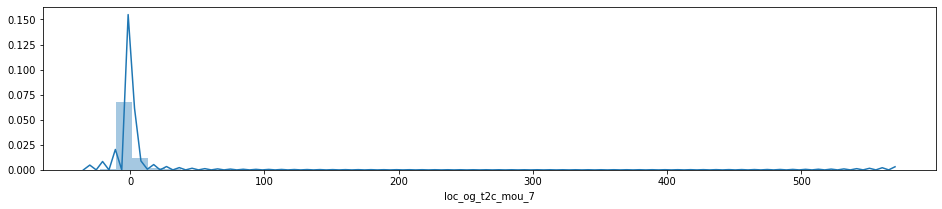

loc_og_t2c_mou_8


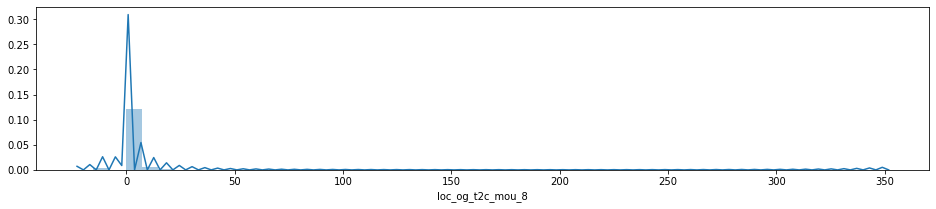

loc_og_mou_6


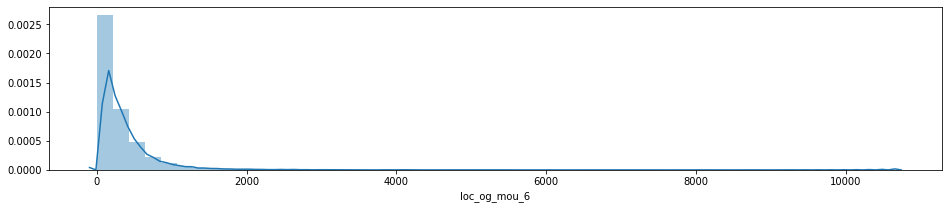

loc_og_mou_7


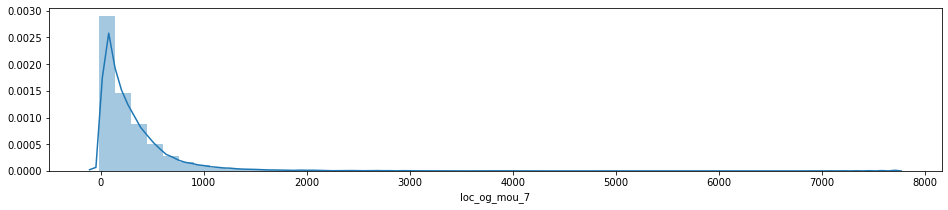

loc_og_mou_8


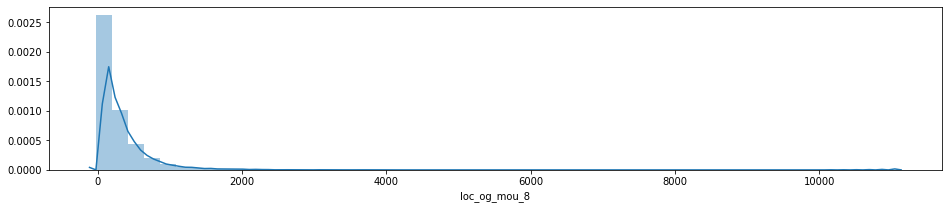

std_og_t2t_mou_6


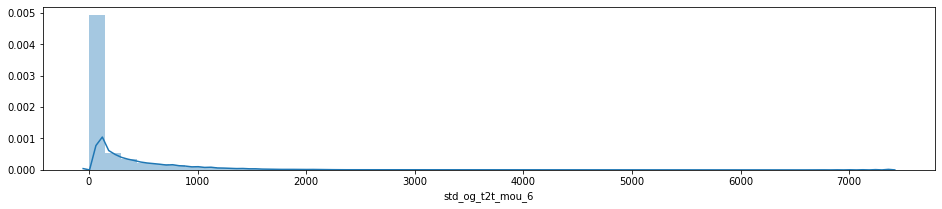

std_og_t2t_mou_7


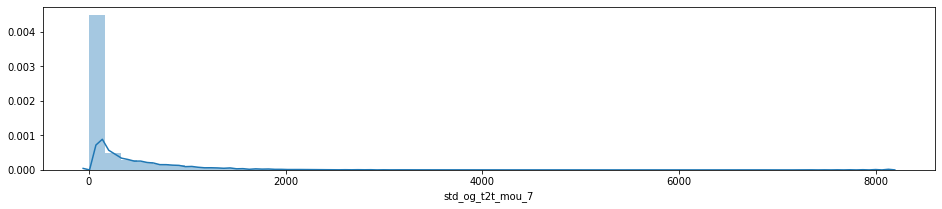

std_og_t2t_mou_8


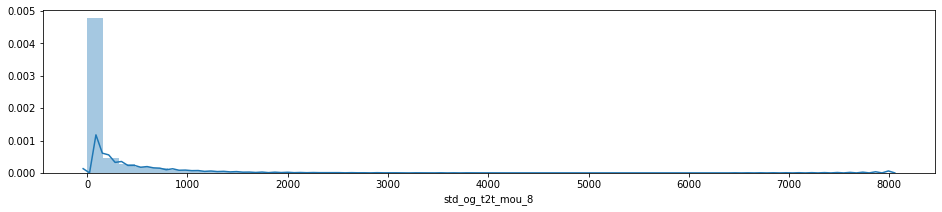

std_og_t2m_mou_6


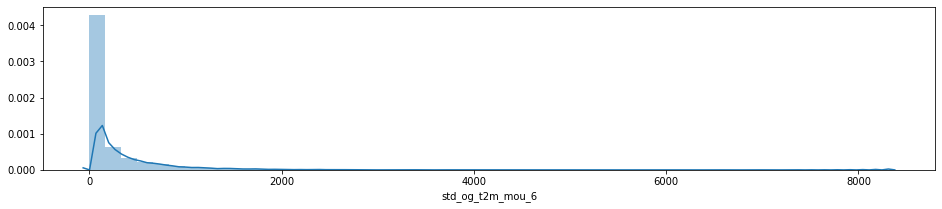

std_og_t2m_mou_7


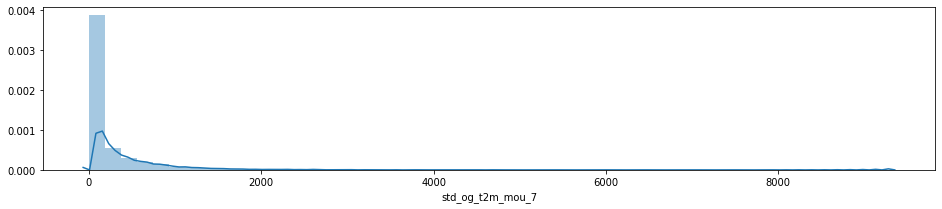

std_og_t2m_mou_8


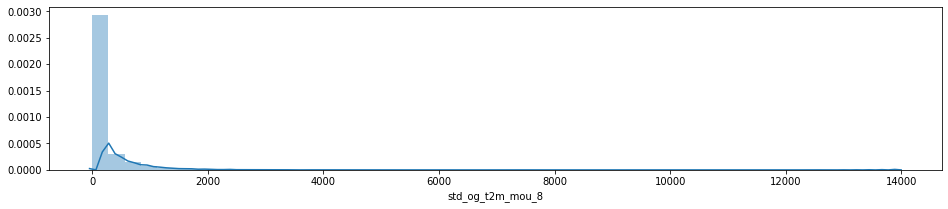

std_og_t2f_mou_6


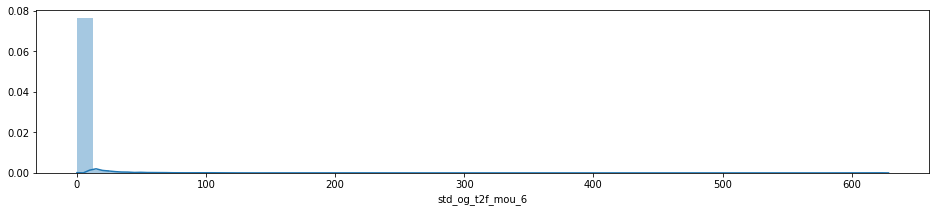

std_og_t2f_mou_7


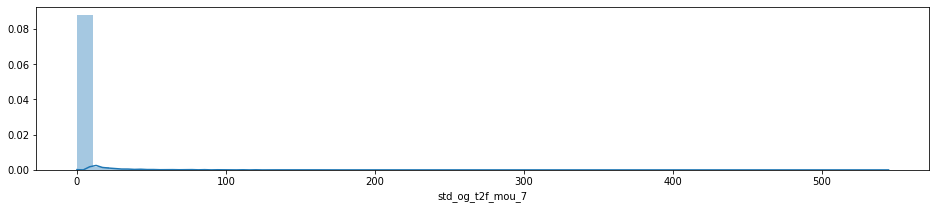

std_og_t2f_mou_8


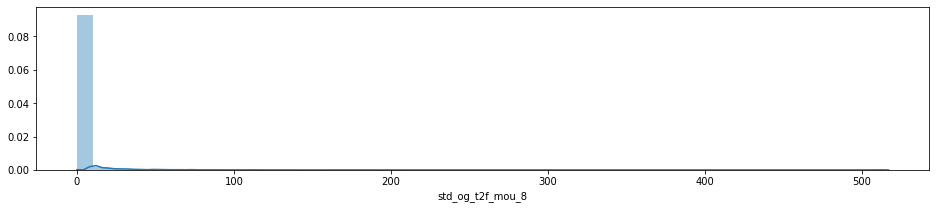

std_og_mou_6


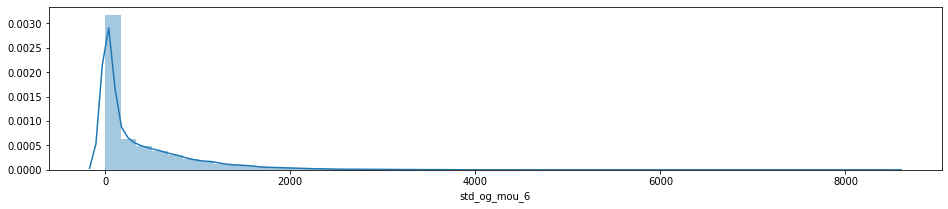

std_og_mou_7


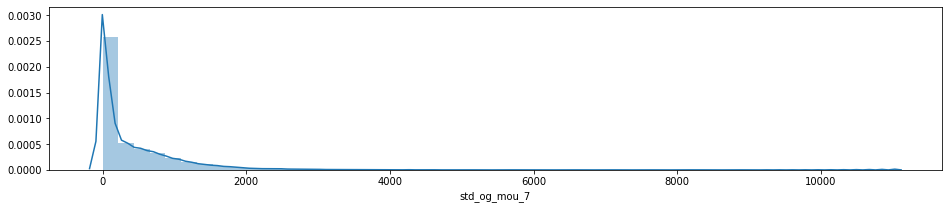

std_og_mou_8


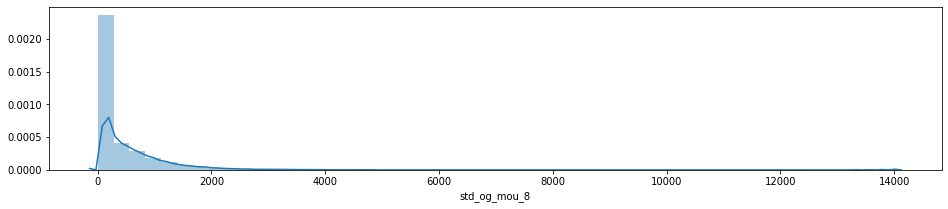

isd_og_mou_6


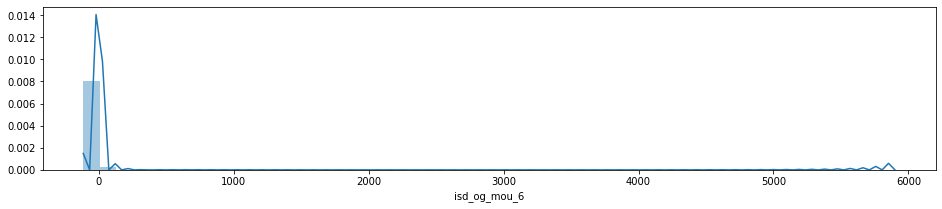

isd_og_mou_7


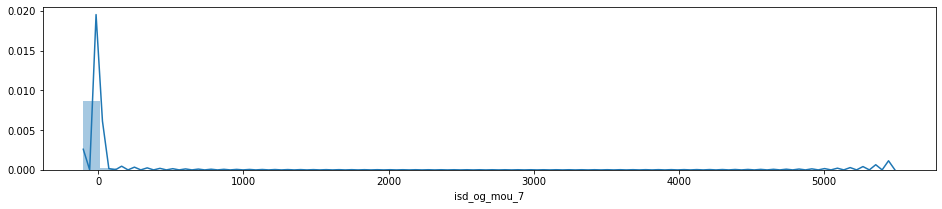

isd_og_mou_8


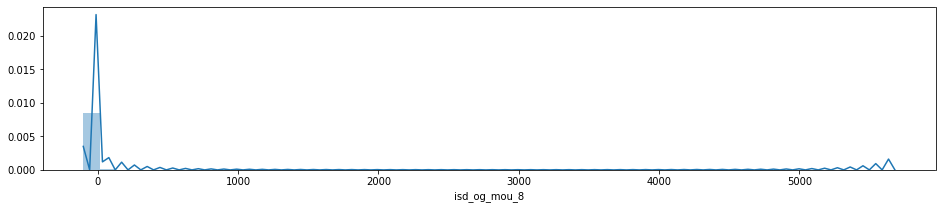

spl_og_mou_6


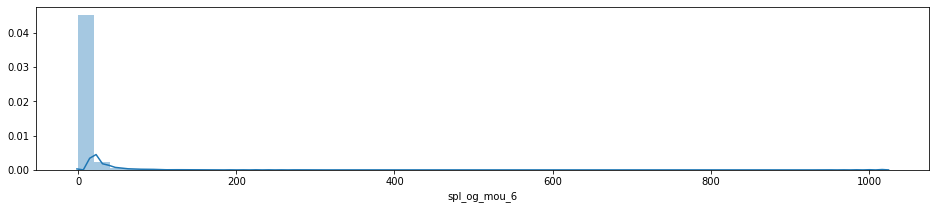

spl_og_mou_7


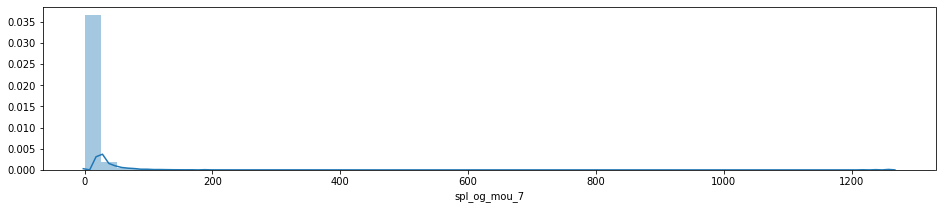

spl_og_mou_8


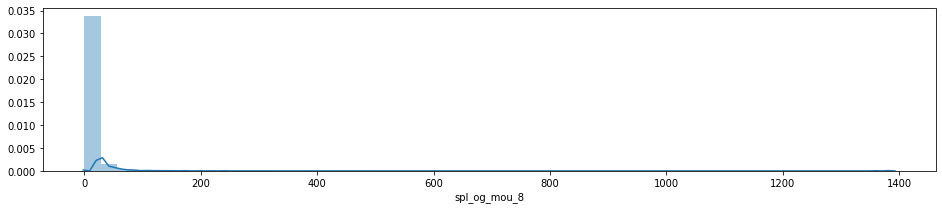

og_others_6


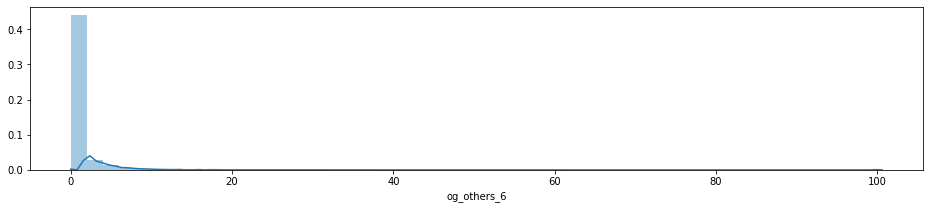

og_others_7


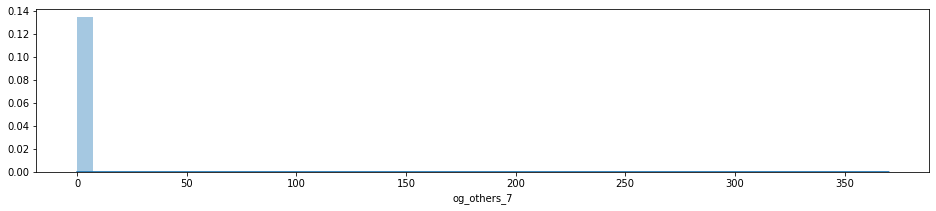

og_others_8


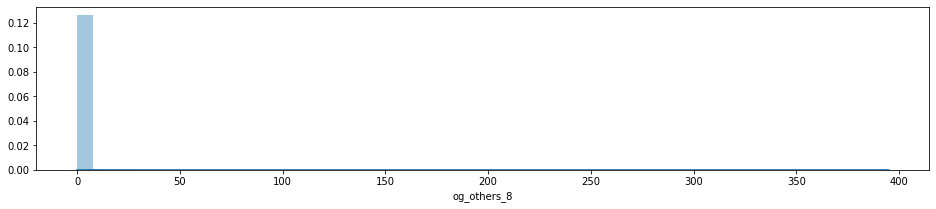

total_og_mou_6


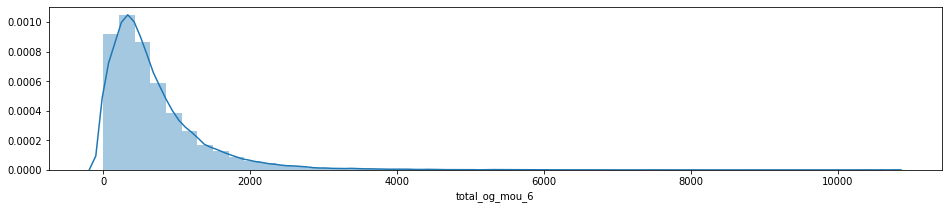

total_og_mou_7


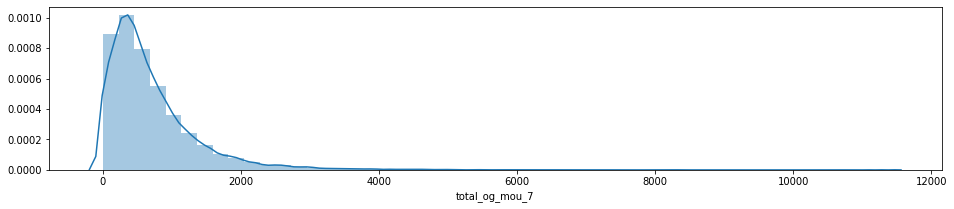

total_og_mou_8


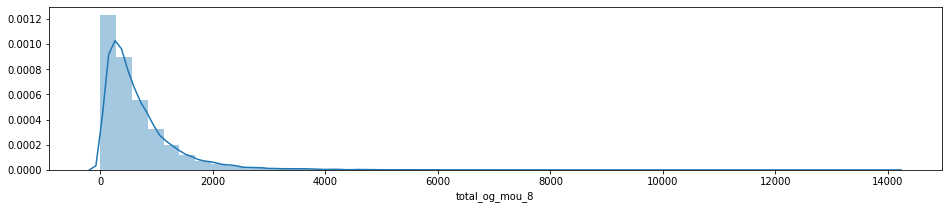

loc_ic_t2t_mou_6


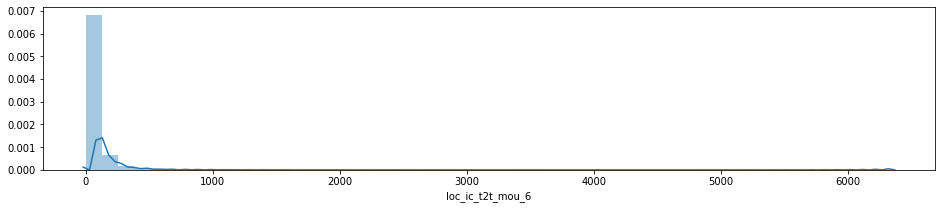

loc_ic_t2t_mou_7


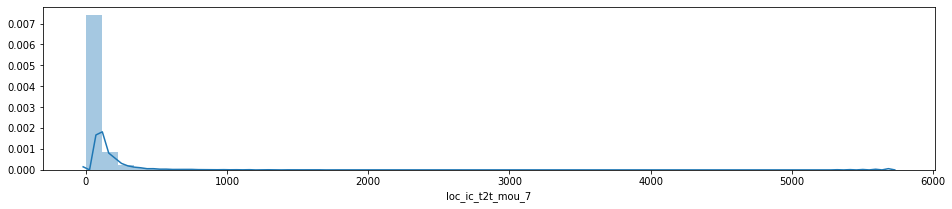

loc_ic_t2t_mou_8


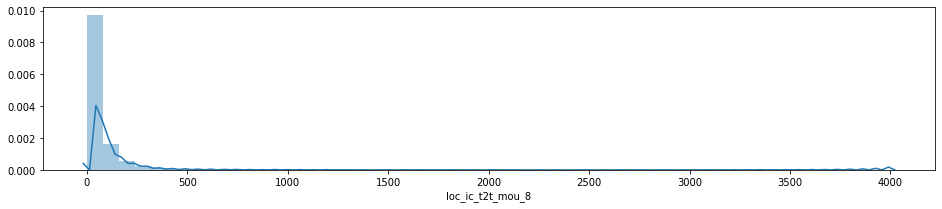

loc_ic_t2m_mou_6


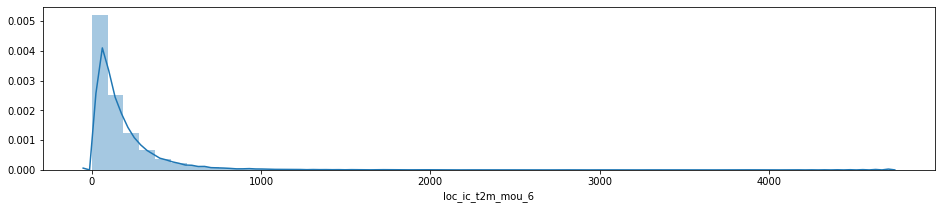

loc_ic_t2m_mou_7


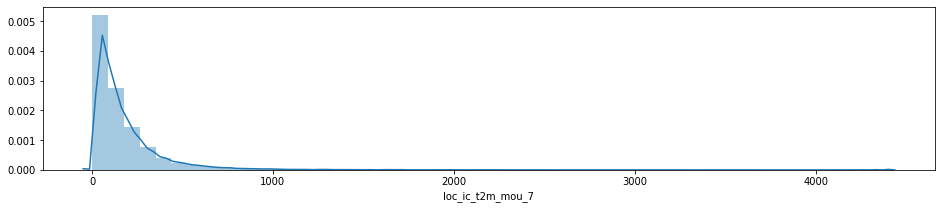

loc_ic_t2m_mou_8


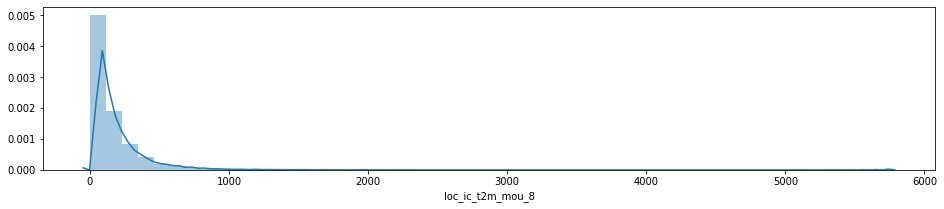

loc_ic_t2f_mou_6


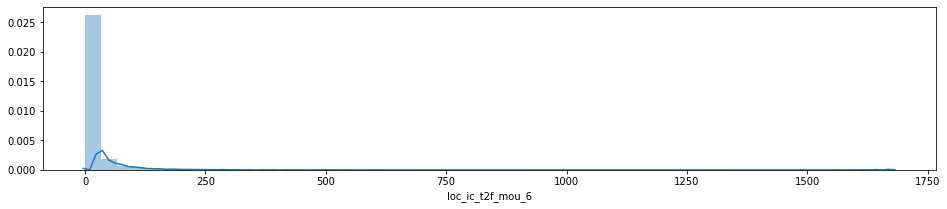

loc_ic_t2f_mou_7


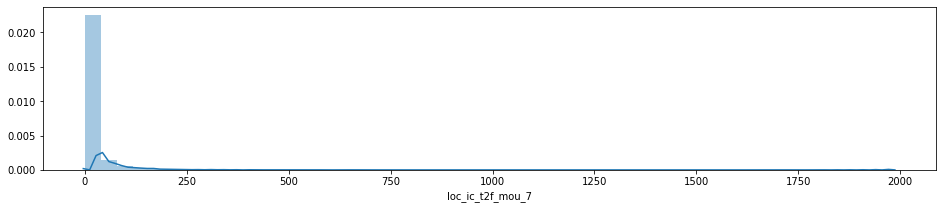

loc_ic_t2f_mou_8


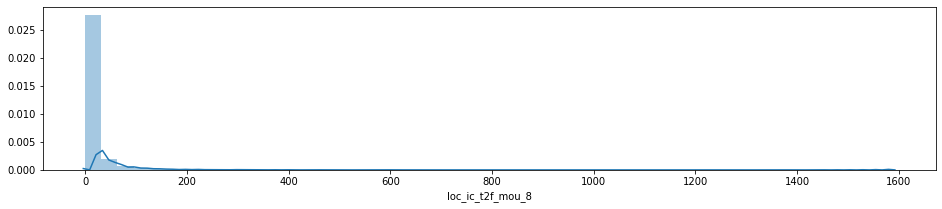

loc_ic_mou_6


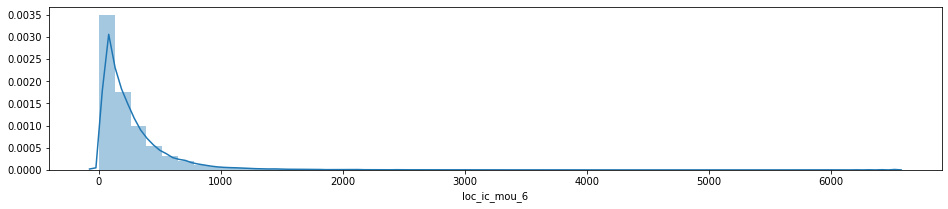

loc_ic_mou_7


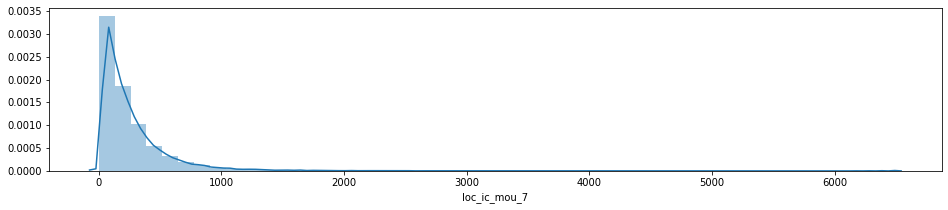

loc_ic_mou_8


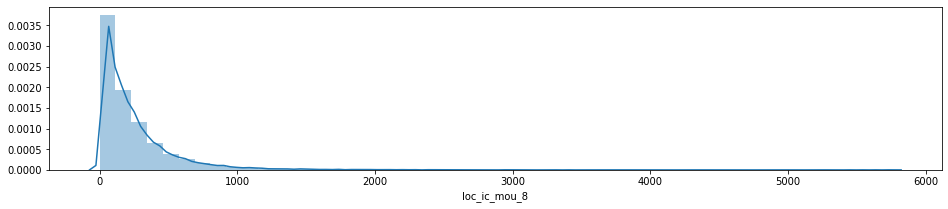

std_ic_t2t_mou_6


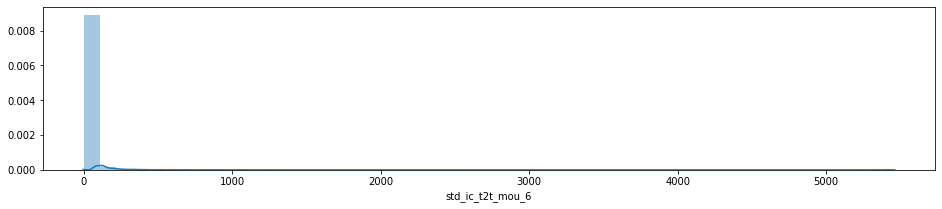

std_ic_t2t_mou_7


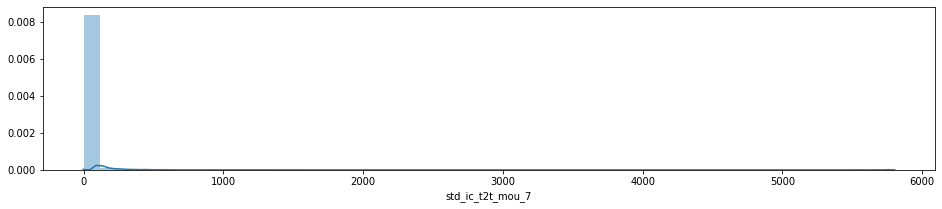

std_ic_t2t_mou_8


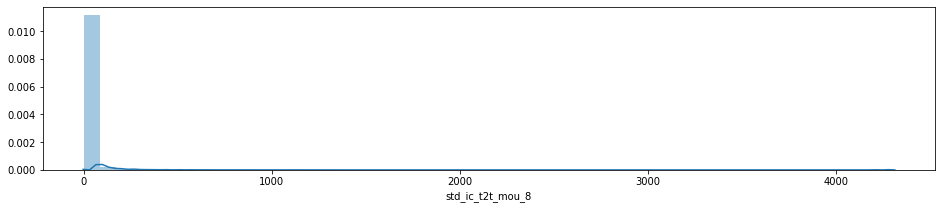

std_ic_t2m_mou_6


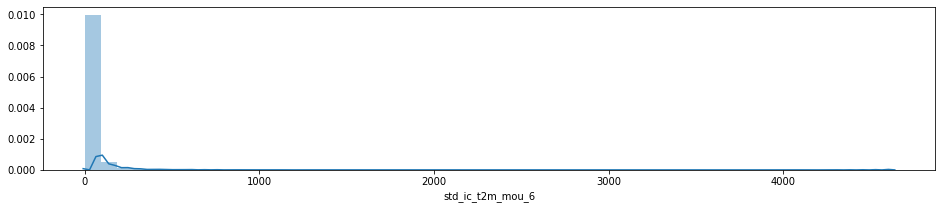

std_ic_t2m_mou_7


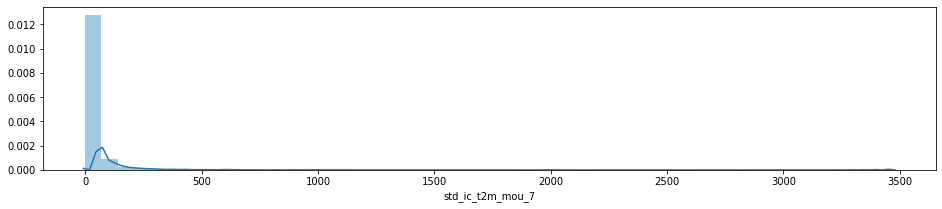

std_ic_t2m_mou_8


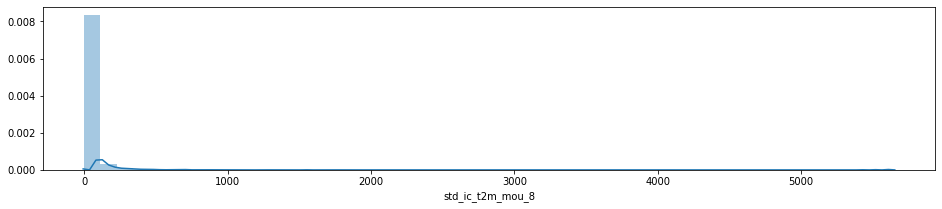

std_ic_t2f_mou_6


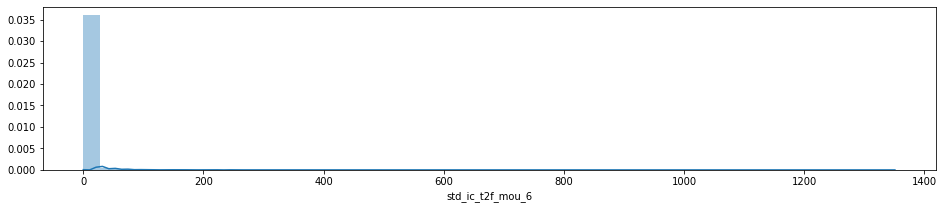

std_ic_t2f_mou_7


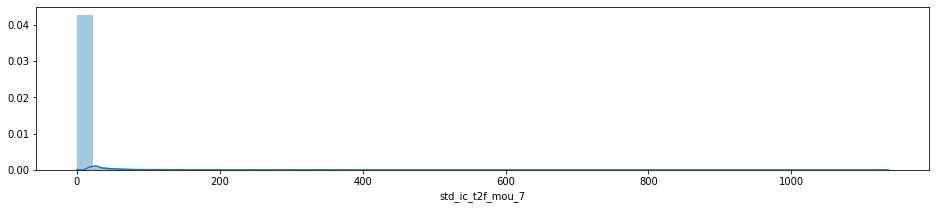

std_ic_t2f_mou_8


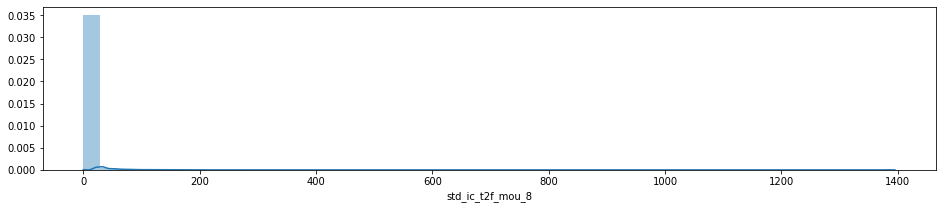

std_ic_mou_6


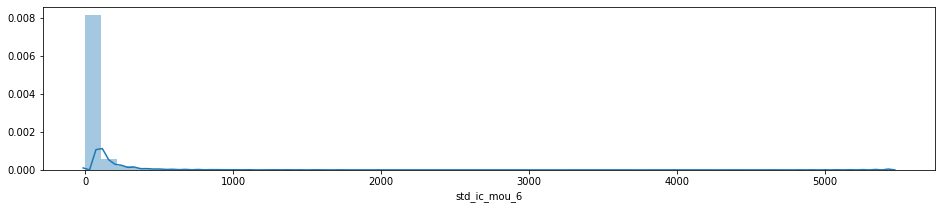

std_ic_mou_7


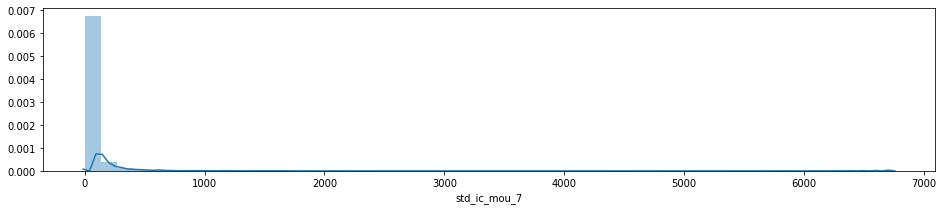

std_ic_mou_8


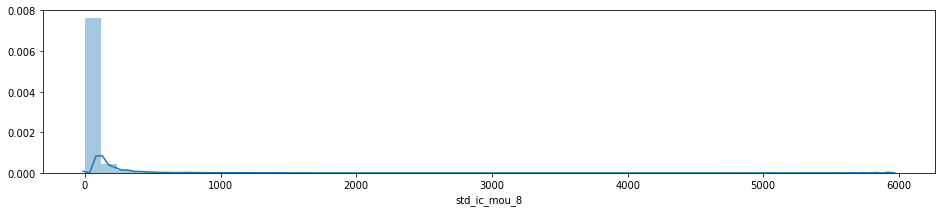

total_ic_mou_6


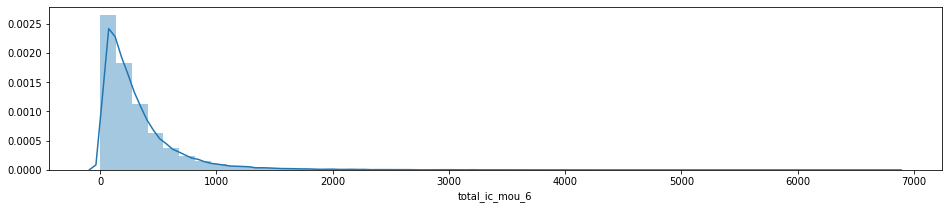

total_ic_mou_7


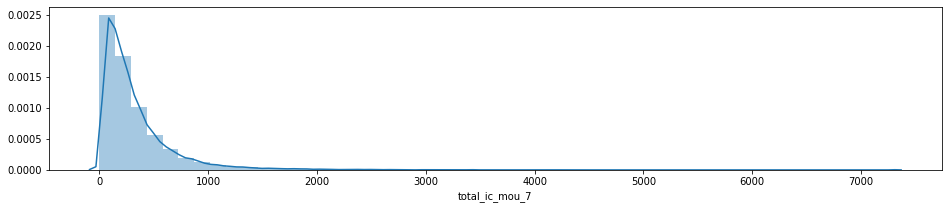

total_ic_mou_8


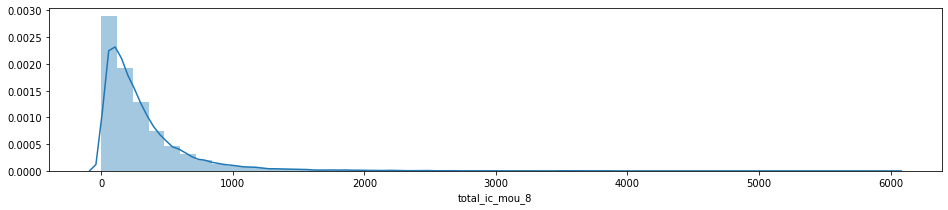

spl_ic_mou_6


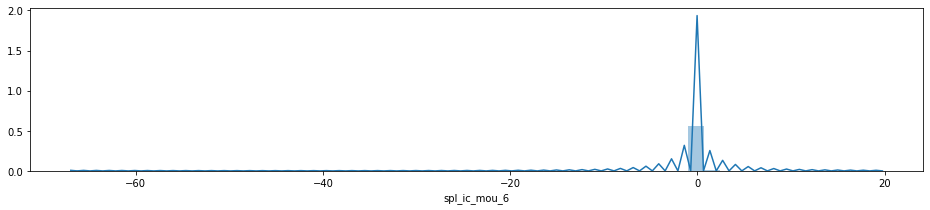

spl_ic_mou_7


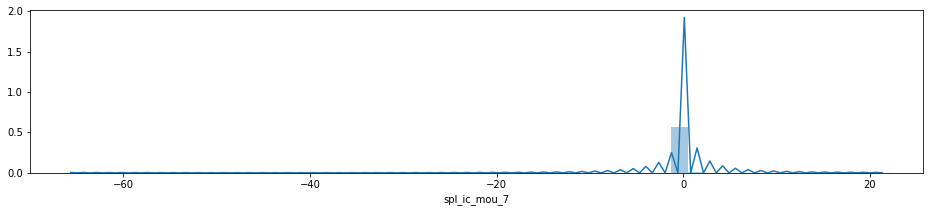

spl_ic_mou_8


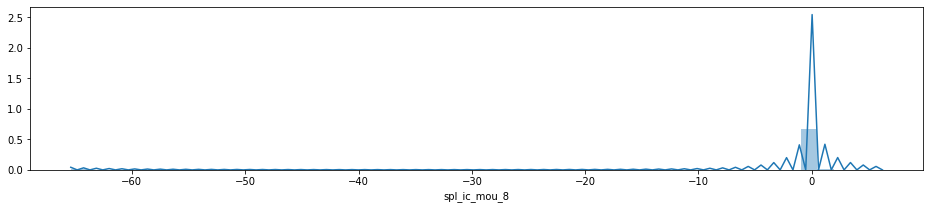

isd_ic_mou_6


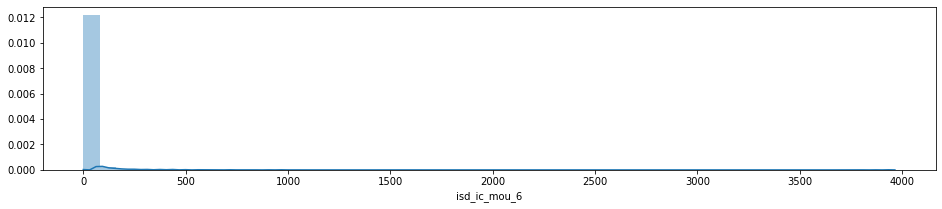

isd_ic_mou_7


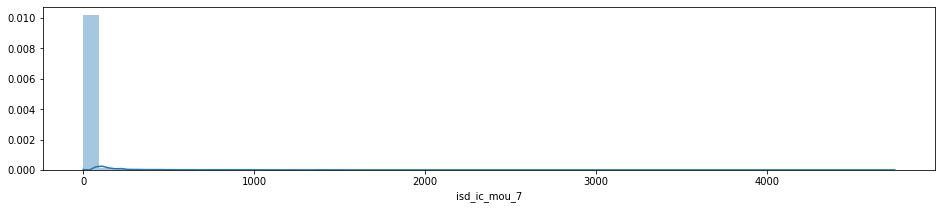

isd_ic_mou_8


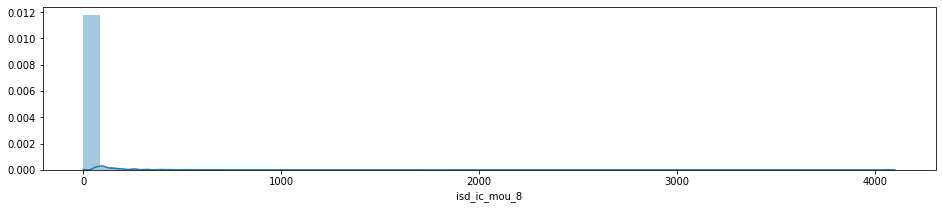

ic_others_6


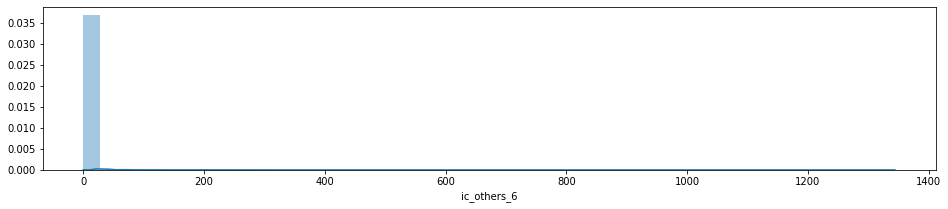

ic_others_7


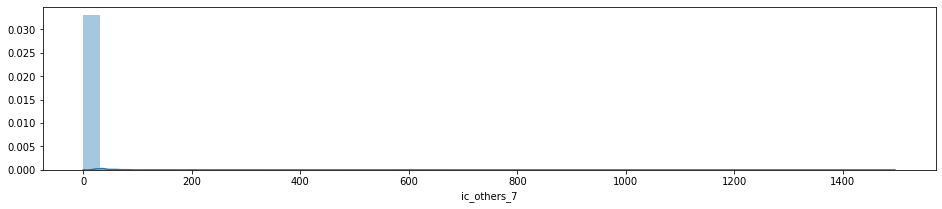

ic_others_8


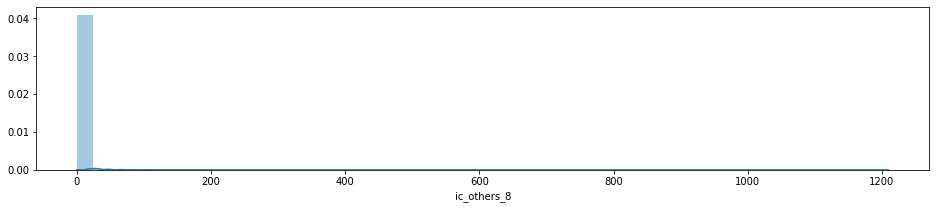

total_rech_num_6


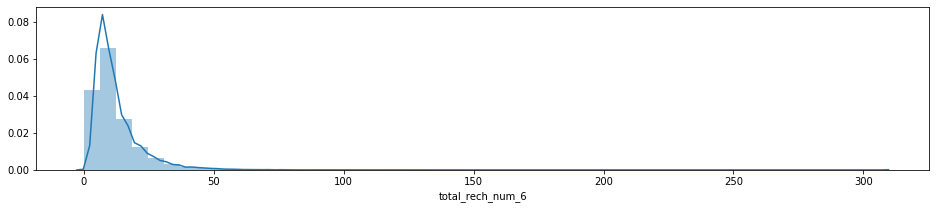

total_rech_num_7


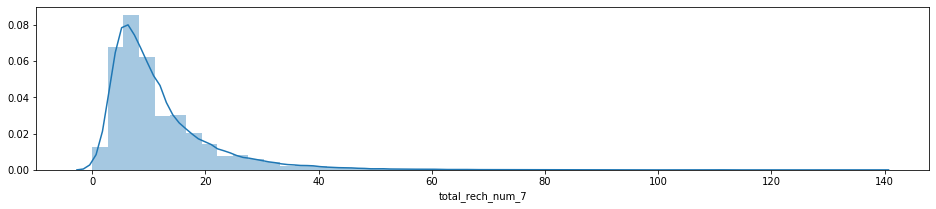

total_rech_num_8


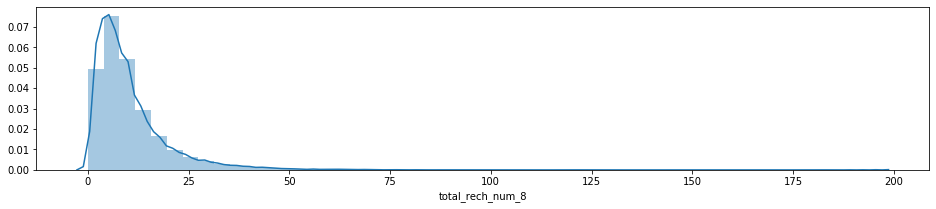

total_rech_amt_6


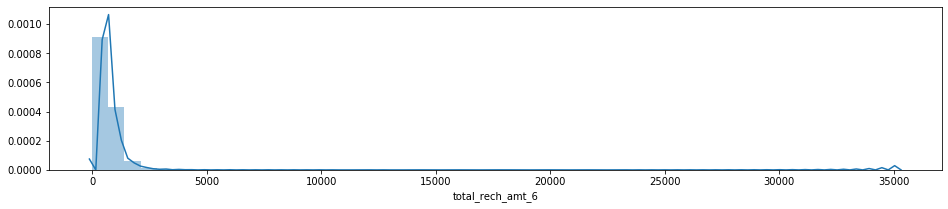

total_rech_amt_7


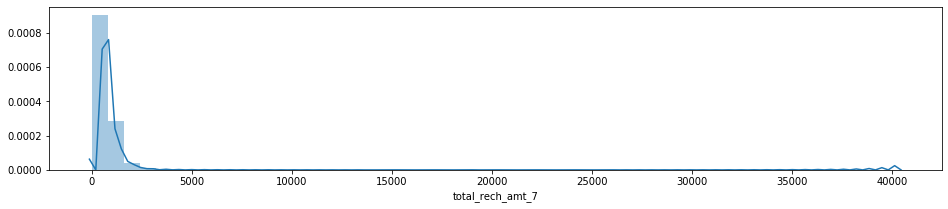

total_rech_amt_8


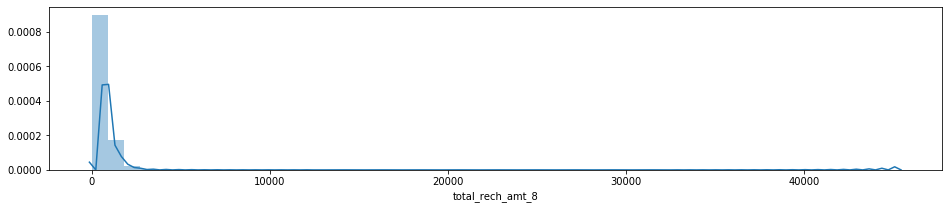

max_rech_amt_6


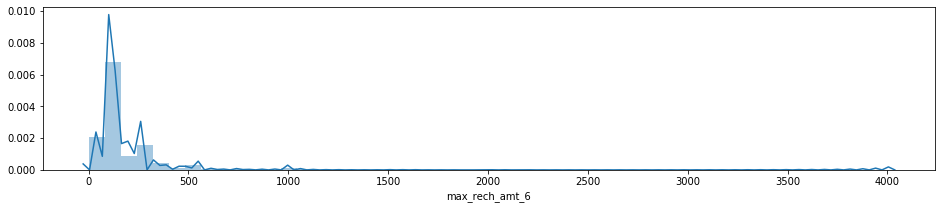

max_rech_amt_7


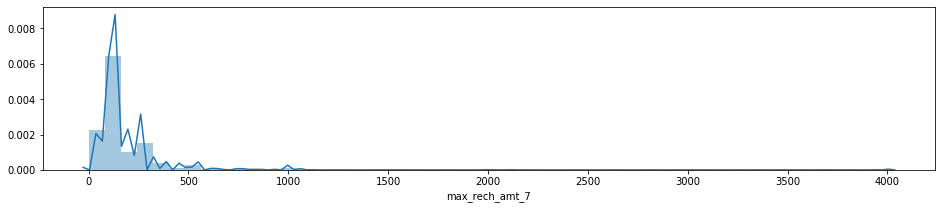

max_rech_amt_8


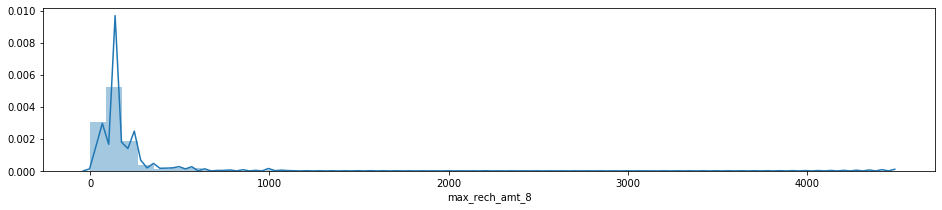

date_of_last_rech_6


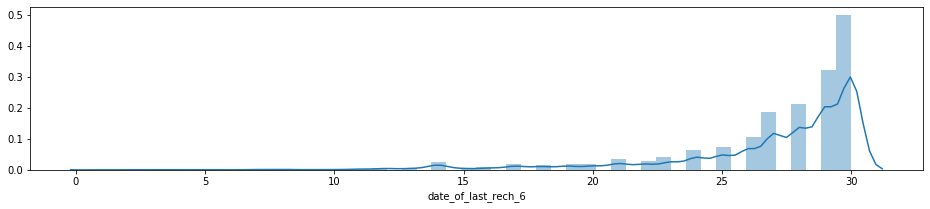

date_of_last_rech_7


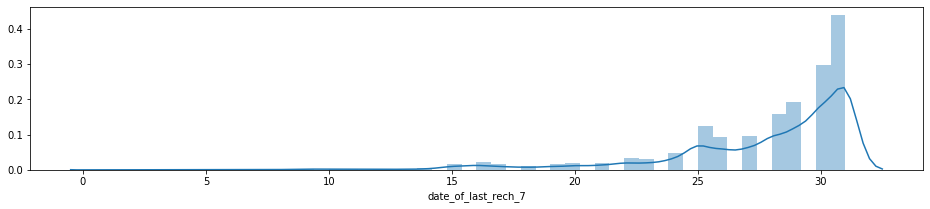

date_of_last_rech_8


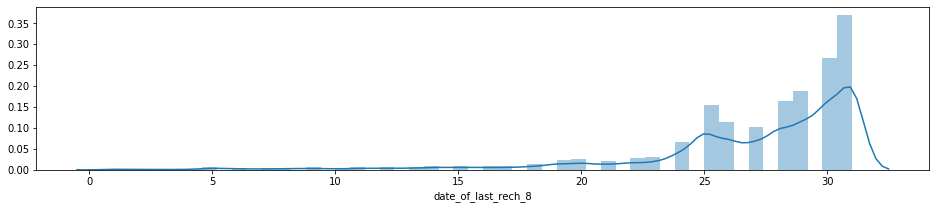

last_day_rch_amt_6


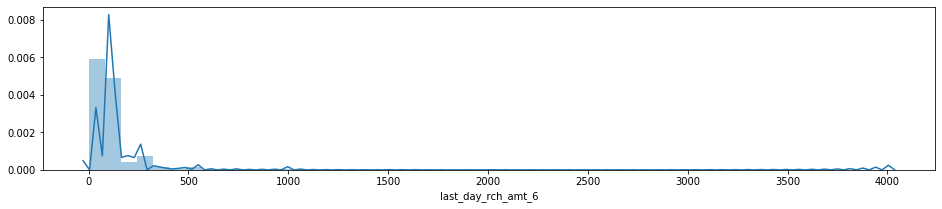

last_day_rch_amt_7


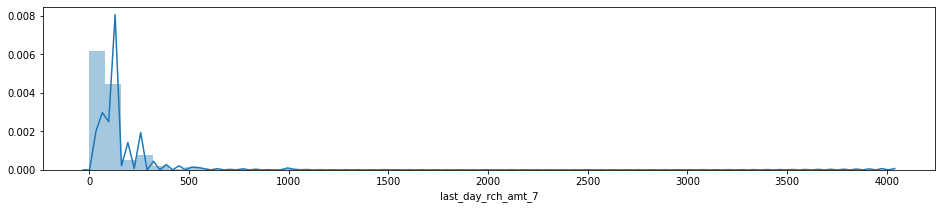

last_day_rch_amt_8


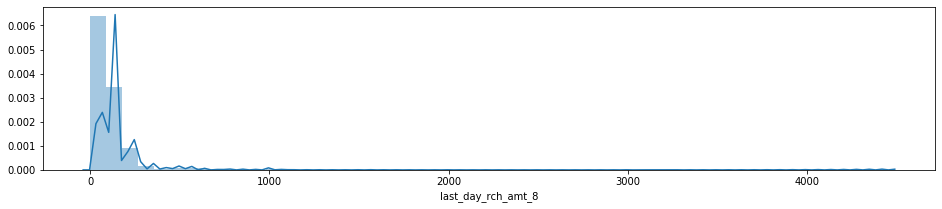

vol_2g_mb_6


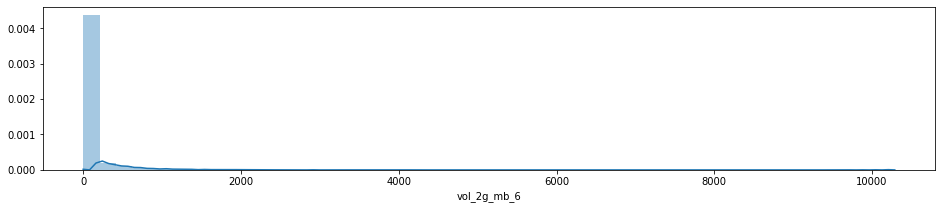

vol_2g_mb_7


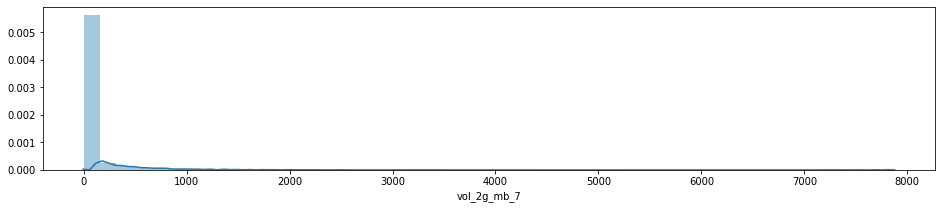

vol_2g_mb_8


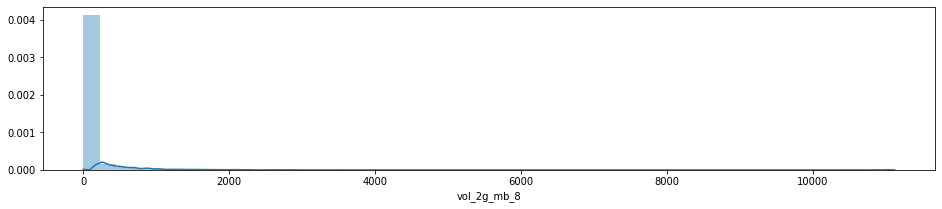

vol_3g_mb_6


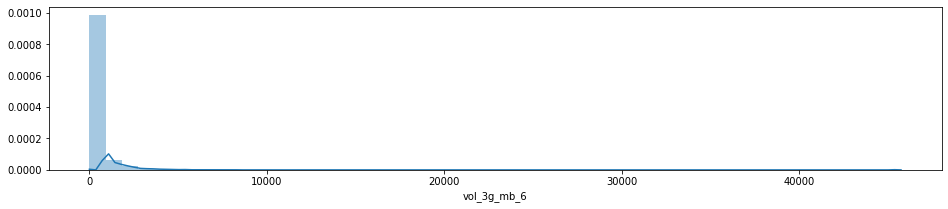

vol_3g_mb_7


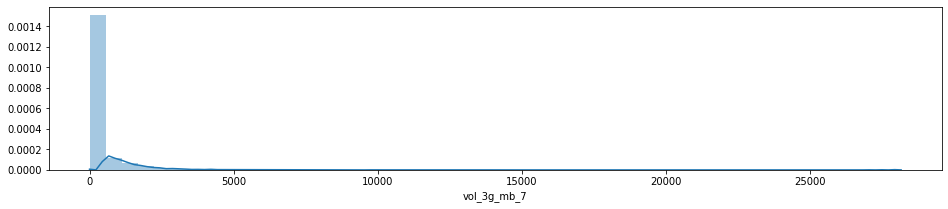

vol_3g_mb_8


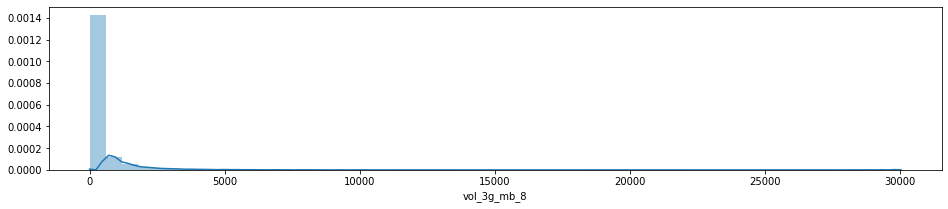

monthly_2g_6


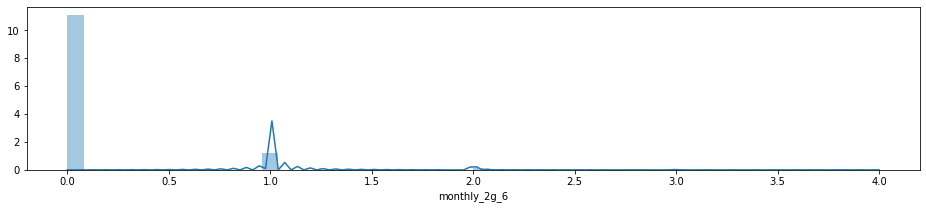

monthly_2g_7


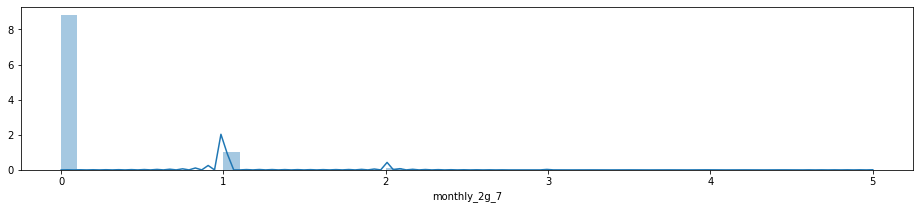

monthly_2g_8


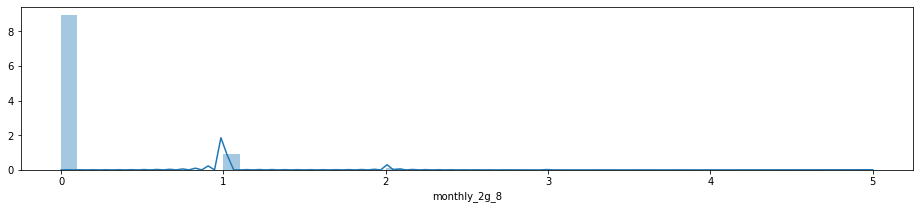

sachet_2g_6


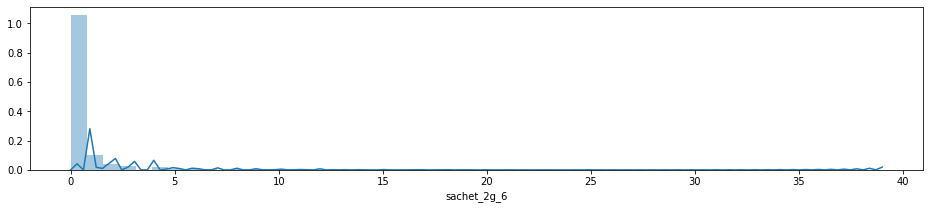

sachet_2g_7


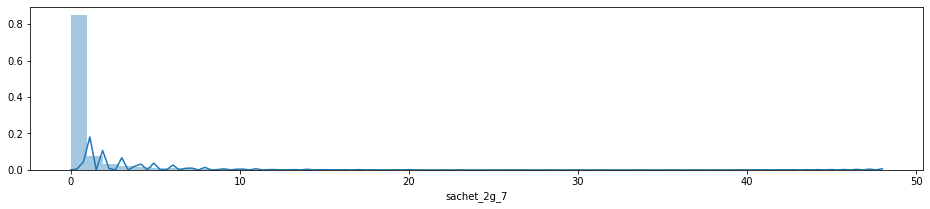

sachet_2g_8


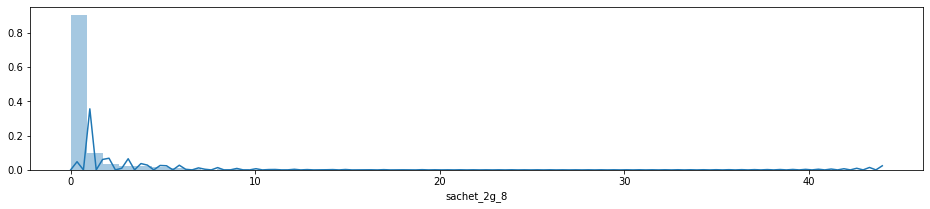

monthly_3g_6


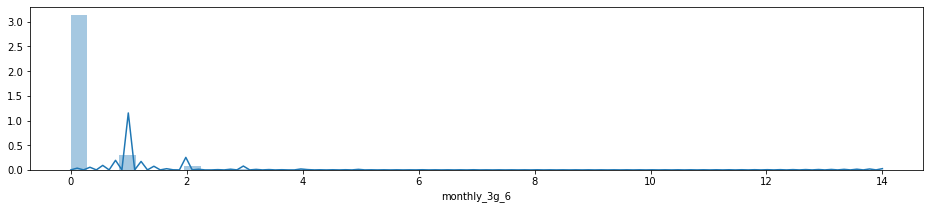

monthly_3g_7


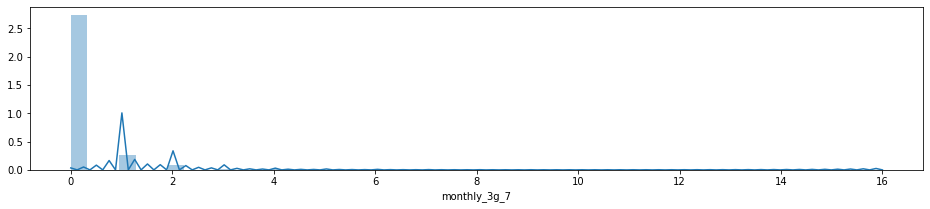

monthly_3g_8


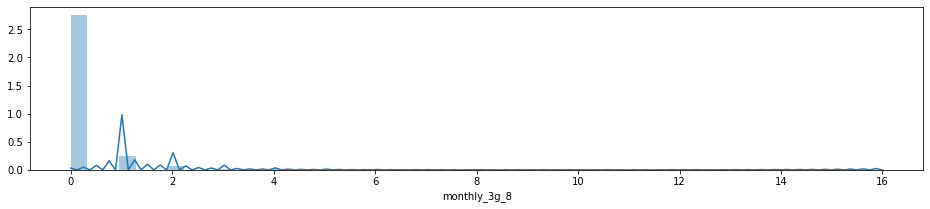

sachet_3g_6


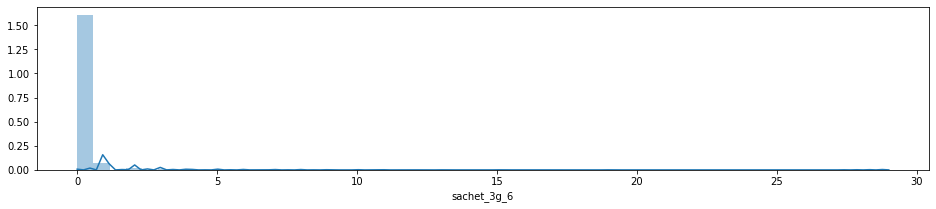

sachet_3g_7


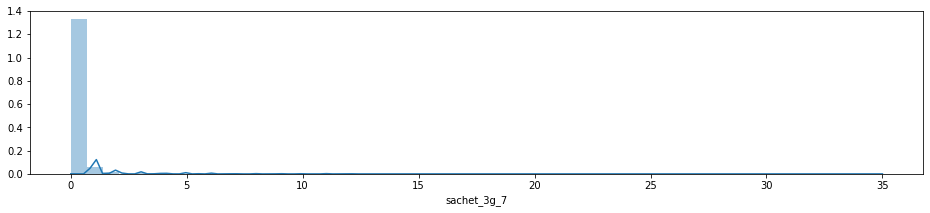

sachet_3g_8


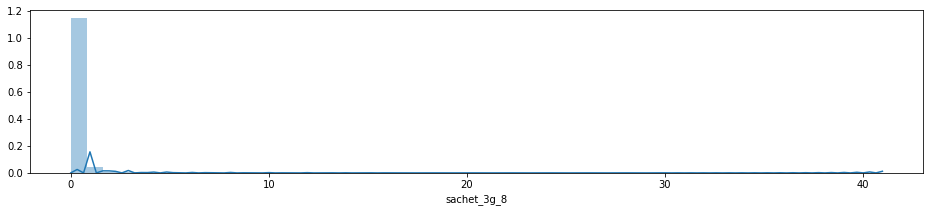

aon


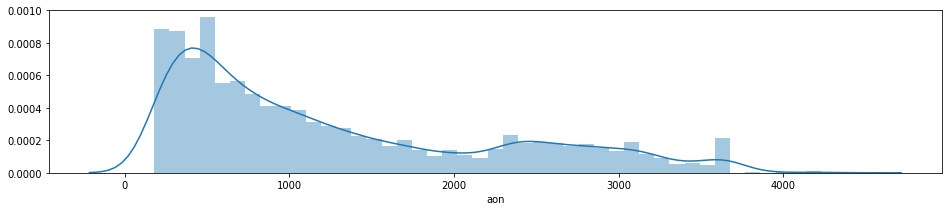

aug_vbc_3g


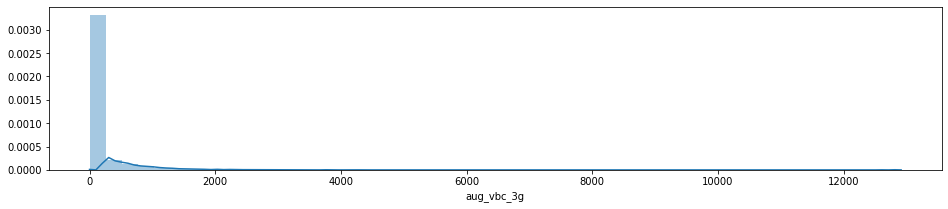

jul_vbc_3g


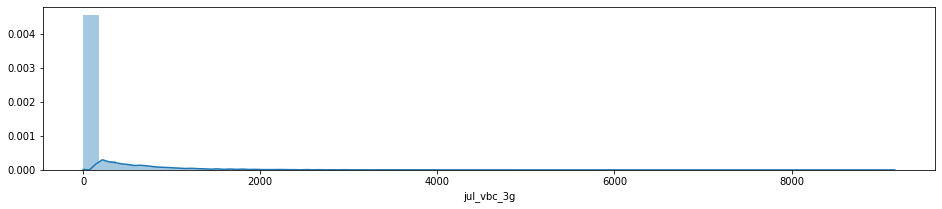

jun_vbc_3g


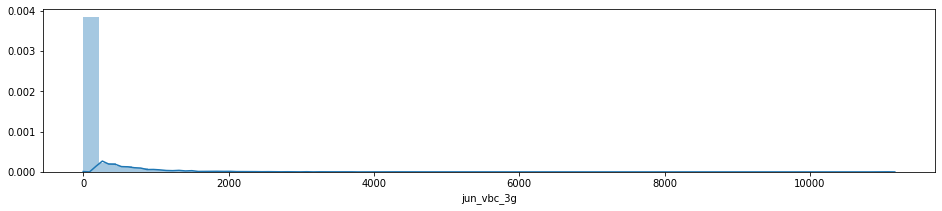

sep_vbc_3g


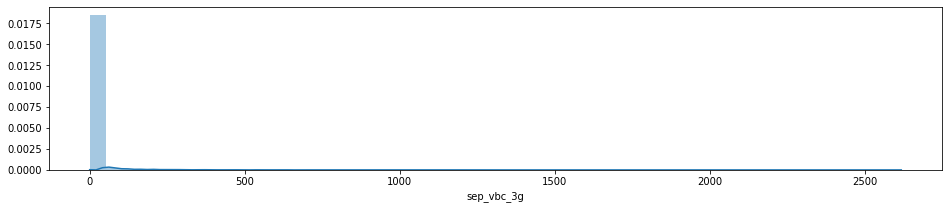

churn_data


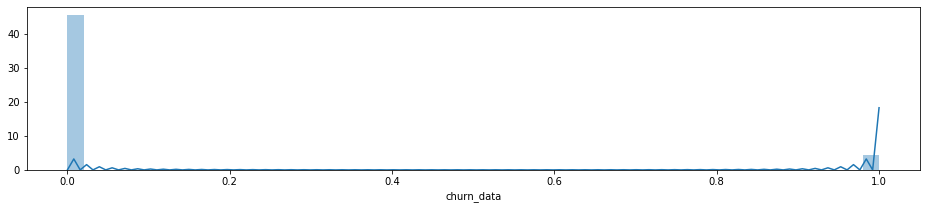

arpu_ratio


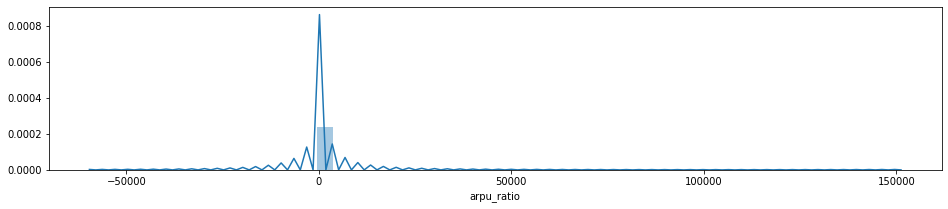

call_centre_ratio


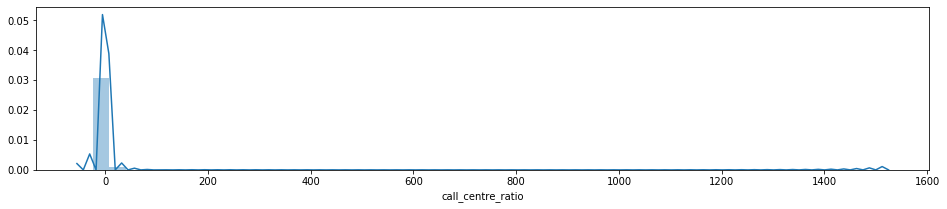

network_usage_diff


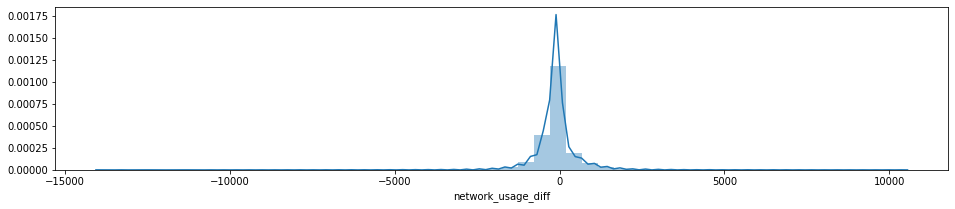

network_usage_diff_good


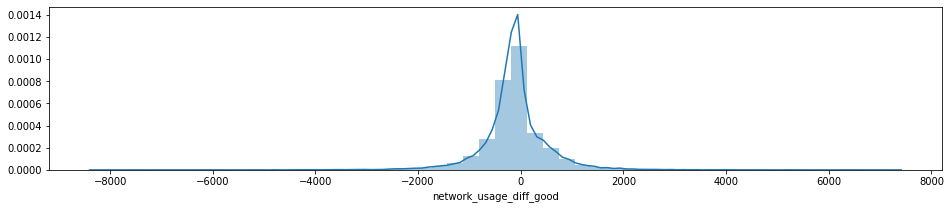

2g_usage_ratio


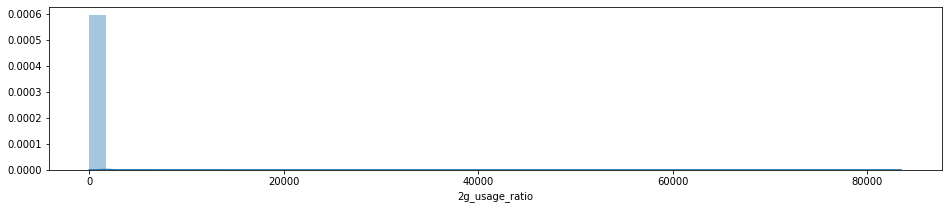

3g_usage_ratio


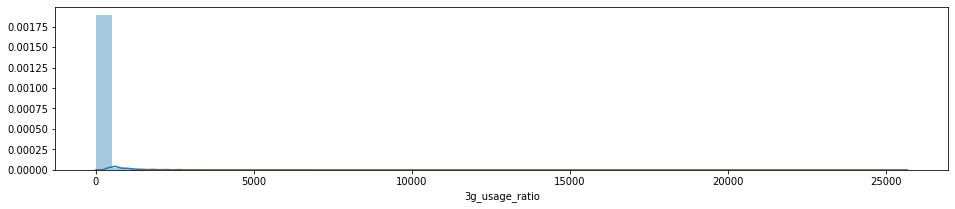

og_ratio


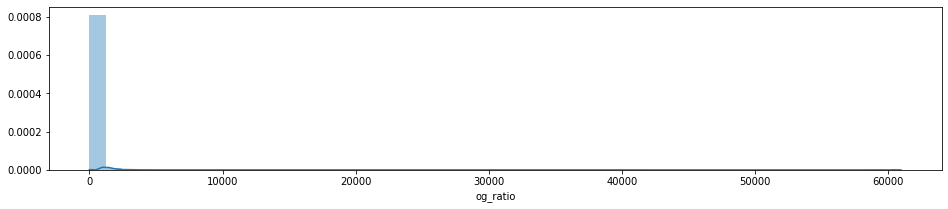

ic_ratio


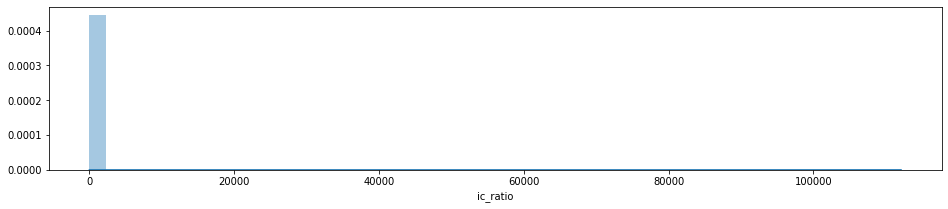

vbc_difference


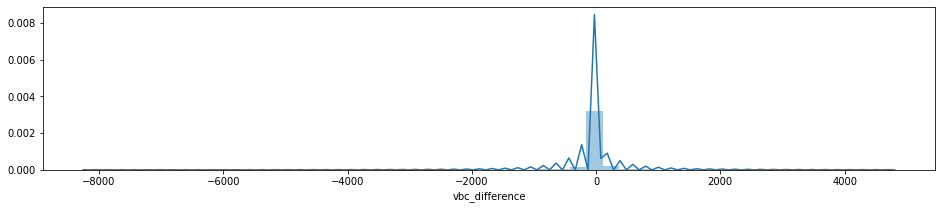

In [54]:
# Univariate analysis on all column
for columns in telecom_churn_df_high.columns:
    plt.figure(figsize=(16,3))
    column = telecom_churn_df_high[columns]
    print(columns)
    sns.distplot(column)
    plt.show()

# Bivariate analysis

In [55]:
#Older customer are more likely to continue
telecom_churn_df_high['binned_aon'] = pd.qcut(telecom_churn_df_high['aon'], 10)
(round(100*(telecom_churn_df_high.groupby(['binned_aon','churn_data']).count()/telecom_churn_df_high.groupby(['binned_aon']).count()).mobile_number),2)

(binned_aon        churn_data
 (179.999, 294.0]  0            85.000000
                   1            15.000000
 (294.0, 418.0]    0            87.000000
                   1            13.000000
 (418.0, 522.0]    0            90.000000
                   1            10.000000
 (522.0, 703.0]    0            89.000000
                   1            11.000000
 (703.0, 914.0]    0            88.000000
                   1            12.000000
 (914.0, 1183.0]   0            91.000000
                   1            9.000000 
 (1183.0, 1590.0]  0            94.000000
                   1            6.000000 
 (1590.0, 2325.0]  0            95.000000
                   1            5.000000 
 (2325.0, 2846.0]  0            96.000000
                   1            4.000000 
 (2846.0, 4321.0]  0            97.000000
                   1            3.000000 
 Name: mobile_number, dtype: float64, 2)

In [56]:
telecom_churn_df_high.drop(['binned_aon'], axis=1, inplace=True)

In [57]:
# customers having low arpu in action phase as compared to good phase is likely to churn
telecom_churn_df_high['binned_arpu_ratio'] = pd.qcut(telecom_churn_df_high['arpu_ratio'], 10)
(round(100*(telecom_churn_df_high.groupby(['binned_arpu_ratio','churn_data']).count()/telecom_churn_df_high.groupby(['binned_arpu_ratio']).count()).mobile_number),2)

(binned_arpu_ratio             churn_data
 (-59575.700999999994, 0.661]  0            95.000000
                               1            5.000000 
 (0.661, 0.79]                 0            97.000000
                               1            3.000000 
 (0.79, 0.894]                 0            97.000000
                               1            3.000000 
 (0.894, 0.991]                0            98.000000
                               1            2.000000 
 (0.991, 1.098]                0            97.000000
                               1            3.000000 
 (1.098, 1.229]                0            97.000000
                               1            3.000000 
 (1.229, 1.415]                0            96.000000
                               1            4.000000 
 (1.415, 1.786]                0            95.000000
                               1            5.000000 
 (1.786, 3.391]                0            87.000000
                               1        

In [58]:
telecom_churn_df_high.drop(['binned_arpu_ratio'], axis=1, inplace=True)

In [59]:
# customers not using outgoing calls for september are likely to churn
telecom_churn_df_high['binned_total_og_mou_8'] = pd.qcut(telecom_churn_df_high['total_og_mou_8'], 10)
(round(100*(telecom_churn_df_high.groupby(['binned_total_og_mou_8','churn_data']).count()/telecom_churn_df_high.groupby(['binned_total_og_mou_8']).count()).mobile_number),2)

(binned_total_og_mou_8  churn_data
 (-0.001, 19.41]        0            51.000000
                        1            49.000000
 (19.41, 138.06]        0            91.000000
                        1            9.000000 
 (138.06, 235.91]       0            94.000000
                        1            6.000000 
 (235.91, 331.76]       0            96.000000
                        1            4.000000 
 (331.76, 435.33]       0            96.000000
                        1            4.000000 
 (435.33, 563.51]       0            97.000000
                        1            3.000000 
 (563.51, 732.94]       0            98.000000
                        1            2.000000 
 (732.94, 960.03]       0            97.000000
                        1            3.000000 
 (960.03, 1393.51]      0            97.000000
                        1            3.000000 
 (1393.51, 14043.06]    0            97.000000
                        1            3.000000 
 Name: mobile_number, dty

In [60]:
telecom_churn_df_high.drop(['binned_total_og_mou_8'], axis=1, inplace=True)

In [61]:
# customers having low arpu in action period is likely to churn
telecom_churn_df_high['binned_arpu_8'] = pd.qcut(telecom_churn_df_high['arpu_8'], 10)
(round(100*(telecom_churn_df_high.groupby(['binned_arpu_8','churn_data']).count()/telecom_churn_df_high.groupby(['binned_arpu_8']).count()).mobile_number),2)

(binned_arpu_8         churn_data
 (-945.809, 134.17]    0            53.000000
                       1            47.000000
 (134.17, 252.3]       0            90.000000
                       1            10.000000
 (252.3, 324.913]      0            94.000000
                       1            6.000000 
 (324.913, 387.465]    0            96.000000
                       1            4.000000 
 (387.465, 452.091]    0            97.000000
                       1            3.000000 
 (452.091, 526.063]    0            97.000000
                       1            3.000000 
 (526.063, 614.013]    0            97.000000
                       1            3.000000 
 (614.013, 744.166]    0            97.000000
                       1            3.000000 
 (744.166, 985.202]    0            97.000000
                       1            3.000000 
 (985.202, 33543.624]  0            96.000000
                       1            4.000000 
 Name: mobile_number, dtype: float64, 2)

In [62]:
telecom_churn_df_high.drop(['binned_arpu_8'], axis=1, inplace=True)

In [63]:
# customers having low arpu in action period is likely to churn
telecom_churn_df_high['binned_onnet_mou_8'] = pd.qcut(telecom_churn_df_high['onnet_mou_8'], 10)
(round(100*(telecom_churn_df_high.groupby(['binned_onnet_mou_8','churn_data']).count()/telecom_churn_df_high.groupby(['binned_onnet_mou_8']).count()).mobile_number),2)

(binned_onnet_mou_8          churn_data
 (-505.54999999999995, 2.9]  0            62.000000
                             1            38.000000
 (2.9, 17.98]                0            89.000000
                             1            11.000000
 (17.98, 38.24]              0            92.000000
                             1            8.000000 
 (38.24, 63.58]              0            95.000000
                             1            5.000000 
 (63.58, 99.44]              0            96.000000
                             1            4.000000 
 (99.44, 150.38]             0            96.000000
                             1            4.000000 
 (150.38, 234.51]            0            96.000000
                             1            4.000000 
 (234.51, 389.31]            0            96.000000
                             1            4.000000 
 (389.31, 723.61]            0            96.000000
                             1            4.000000 
 (723.61, 10752.56]     

In [64]:
telecom_churn_df_high.drop(['binned_onnet_mou_8'], axis=1, inplace=True)

In [65]:
# customers having low arpu in action period is likely to churn
telecom_churn_df_high['binned_offnet_mou_8'] = pd.qcut(telecom_churn_df_high['offnet_mou_8'], 10)
(round(100*(telecom_churn_df_high.groupby(['binned_offnet_mou_8','churn_data']).count()/telecom_churn_df_high.groupby(['binned_offnet_mou_8']).count()).mobile_number),2)

(binned_offnet_mou_8  churn_data
 (-0.001, 35.08]      0            78.000000
                      1            22.000000
 (35.08, 85.63]       0            91.000000
                      1            9.000000 
 (85.63, 138.88]      0            94.000000
                      1            6.000000 
 (138.88, 177.36]     0            72.000000
                      1            28.000000
 (177.36, 240.94]     0            95.000000
                      1            5.000000 
 (240.94, 314.71]     0            97.000000
                      1            3.000000 
 (314.71, 415.84]     0            97.000000
                      1            3.000000 
 (415.84, 564.58]     0            97.000000
                      1            3.000000 
 (564.58, 853.79]     0            97.000000
                      1            3.000000 
 (853.79, 14007.34]   0            97.000000
                      1            3.000000 
 Name: mobile_number, dtype: float64, 2)

In [66]:
telecom_churn_df_high.drop(['binned_offnet_mou_8'], axis=1, inplace=True)

# Outlier Treatment

There must be data which are not significant in predicting the Churn customers in every column and presence of this data would give biased results. Hence we can do outlier treatement to remove such data

It is done using 3 sigma technique

In [67]:
pre_treatment = telecom_churn_df_high.index.size

In [68]:
# Remove 0.3 percent outliers from data set 
for columns in telecom_churn_df_high.columns:
    column = telecom_churn_df_high[columns]
    upper = column.mean() + 3*column.std()
    lower = column.mean() - 3*column.std()
    outliers = pd.Series([x for x in column if (x < lower) or (x > upper)])
    out_percent = (outliers.size/column.size) * 100
    if out_percent <= 0.3:
        print(out_percent)
        telecom_churn_df_high = telecom_churn_df_high[(telecom_churn_df_high[columns] >= lower) & (telecom_churn_df_high[columns] <= upper)]
    

0.0
0.29322581720035984
0.08354777261638205
0.12709880259549133
0.09377093101138648
0.19777420219898095
0.2854935679978504
0.13136620856911885
0.03372795035245708


In [69]:
telecom_churn_df_high.shape

(29639, 139)

In [70]:
# % data retained after treatment
(telecom_churn_df_high.index.size/pre_treatment) *100

98.76045450001666

### Standardizing data

- Converting data set into dependant and independant variables for building the models

In [71]:
X = telecom_churn_df_high.drop(['churn_data','mobile_number'],axis=1)

# Putting response variable to y
y = telecom_churn_df_high['churn_data']

y.head()

7     1
13    0
16    0
17    0
21    0
Name: churn_data, dtype: int64

### Splitting test/train data:
- We need to split the data into training and testing set. Models would be run on Training set and validated on testing data set later

In [72]:
columns_name = X.columns
[print(x) for x in columns_name]

arpu_6
arpu_7
arpu_8
onnet_mou_6
onnet_mou_7
onnet_mou_8
offnet_mou_6
offnet_mou_7
offnet_mou_8
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
og_others_6
og_others_7
og_others_8
total_og_mou_6
total_og_mou_7
total_og_mou_8
loc_ic_t2t_mou_6
loc_ic_t2t_mou_7
loc_ic_t2t_mou_8
loc_ic_t2m_mou_6
loc_ic_t2m_mou_7
loc_ic_t2m_mou_8
loc_ic_t2f_mou_6
loc_ic_t2f_mou_7
loc_ic_t2f_mou_8
loc_ic_mou_6
loc_ic_mou_7
loc_ic_mou_8
std_ic_t2t_mou_6
std_ic_t2t_mou_7


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [73]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3,random_state=100) 

### Balancing data:
- There will be imbalanced data present, which would give wrong results. We need to do resampling by SMOTE sampling

In [74]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE 
X_train, y_train = SMOTE().fit_resample(X_train, y_train)
y_train =pd.Series(y_train)

### Scaling

In [75]:
#scaler = PowerTransformer(method='yeo-johnson')
#X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)

from sklearn.preprocessing import MaxAbsScaler
mabs = MaxAbsScaler()
X_train = pd.DataFrame(mabs.fit_transform(X_train))
X_test = pd.DataFrame(mabs.transform(X_test))
X_train.columns=columns_name
X_test.columns=columns_name

In [76]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV

### Using LassoCV to get the best indicators of churn

In [77]:
reg = LassoCV()
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train, y_train))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.000069
Best score using built-in LassoCV: 0.485562


In [78]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 59 variables and eliminated the other 78 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

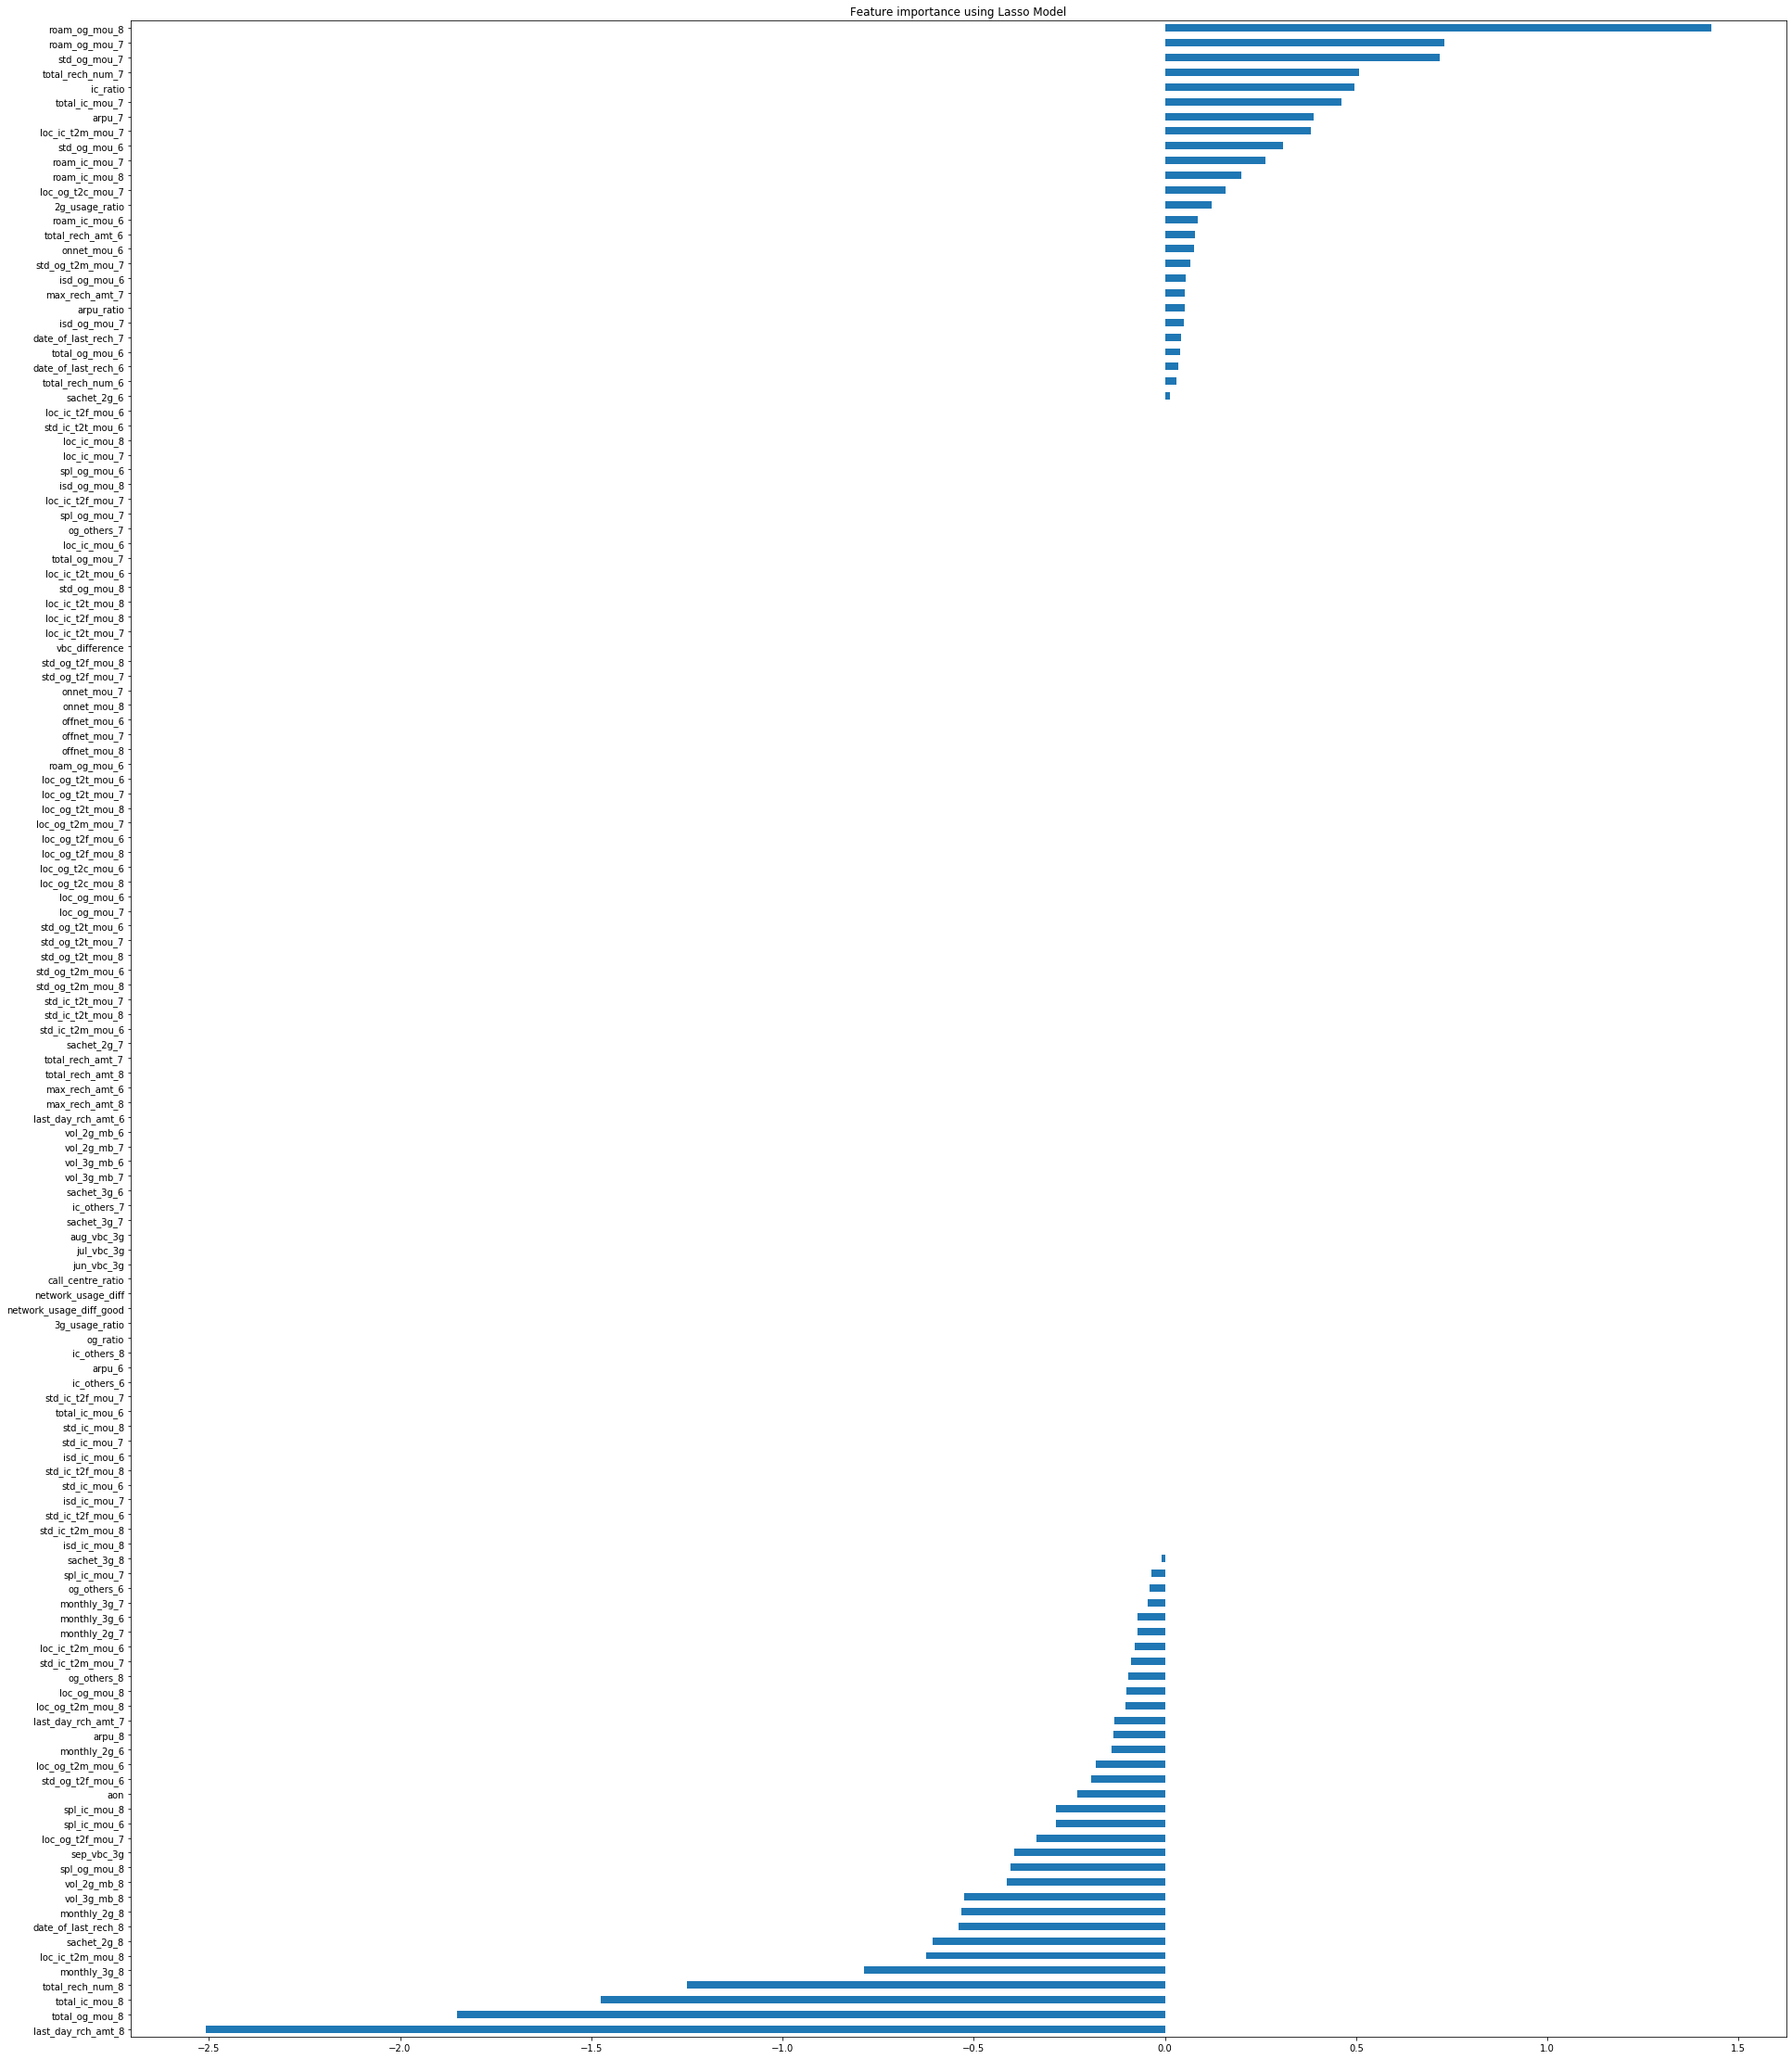

In [79]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (32, 40)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [80]:
# The best indicators of churn in reverse order are:
imp_coef.tail(10)

roam_ic_mou_7      0.262393
std_og_mou_6       0.309085
loc_ic_t2m_mou_7   0.380872
arpu_7             0.388503
total_ic_mou_7     0.461641
ic_ratio           0.494692
total_rech_num_7   0.507481
std_og_mou_7       0.718301
roam_og_mou_7      0.731698
roam_og_mou_8      1.427705
dtype: float64

In [81]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
# Logistic regression model, first training model
logm1 = sm.GLM(list(y_train),(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37972
Model:                            GLM   Df Residuals:                    37836
Model Family:                Binomial   Df Model:                          135
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12854.
Date:                Sun, 26 Jan 2020   Deviance:                       25707.
Time:                        00:37:02   Pearson chi2:                 1.25e+06
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       3.0397      0.204     14.870      0.000       2.639       3.440
arpu_6                     -3.6965      1.276     -2.896      0.004      -6.198      -1.195
arpu_7                      3.0720      1.473      2.085      0.037       0.185       5.959
arpu_8                     13.2858      1.920      6.921      0.000       9.523      17.048
onnet_mou_6               -62.3445     37.767     -1.651      0.099    -136.366      11.677
onnet_mou_7               -23.5910     21.298     -1.108      0.268     -65.334      18.152
onnet_mou_8               -85.3781     44.763     -1.907      0.056    -173.113       2.357
offnet_mou_6              -44.2417     26.323     -1.681      0.093     -95.835       7.351
offnet_mou_7              -24.6021     29.560     -0.832      0.405     -82.538      33.334
offnet_mou_8              -93.9949     41.962     -2.240      0.025    -176.240     -11.750
roam_ic_mou_6               1.1427      0.731      1.563      0.118      -0.290       2.575
roam_ic_mou_7               7.0176      1.529      4.591      0.000       4.022      10.014
roam_ic_mou_8              -3.1331      1.429     -2.193      0.028      -5.934      -0.332
roam_og_mou_6              25.9781     16.781      1.548      0.122      -6.913      58.869
roam_og_mou_7              10.1268      8.744      1.158      0.247      -7.011      27.264
roam_og_mou_8              47.1392     20.053      2.351      0.019       7.836      86.442
loc_og_t2t_mou_6         2.067e+04   1.44e+04      1.435      0.151   -7565.947    4.89e+04
loc_og_t2t_mou_7        -7.824e+04   1.67e+04     -4.695      0.000   -1.11e+05   -4.56e+04
loc_og_t2t_mou_8        -1.471e+05   2.26e+04     -6.515      0.000   -1.91e+05   -1.03e+05
loc_og_t2m_mou_6         1.602e+04   1.12e+04      1.433      0.152   -5890.804    3.79e+04
loc_og_t2m_mou_7        -4.712e+04      1e+04     -4.695      0.000   -6.68e+04   -2.74e+04
loc_og_t2m_mou_8        -6.818e+04   1.05e+04     -6.512      0.000   -8.87e+04   -4.77e+04
loc_og_t2f_mou_6         2096.3946   1459.996      1.436      0.151    -765.145    4957.934
loc_og_t2f_mou_7        -5100.3584   1085.054     -4.701      0.000   -7227.025   -2973.692
loc_og_t2f_mou_8        -8686.8433   1334.159     -6.511      0.000   -1.13e+04   -6071.940
loc_og_t2c_mou_6           -2.1611      1.238     -1.746      0.081      -4.587       0.265
loc_og_t2c_mou_7            3.2153      1.525      2.108      0.035       0.225       6.205
loc_og_t2c_mou_8            3.7567      1.339      2.806      0.005       1.133       6.381
loc_og_mou_6            -5.605e+04   2.12e+04     -2.641      0.008   -9.76e+04   -1.45e+04
loc_og_mou_7             -2.81e+04   2.82e+04     -0.996      0.319   -8.34e+04    2.72e+04
loc_og_mou_8             2.503e+05   3.73e+04  

### RFE

In [83]:
logreg = LogisticRegression()

In [84]:
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [85]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False,  True,

In [86]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 68),
 ('arpu_7', False, 4),
 ('arpu_8', False, 88),
 ('onnet_mou_6', False, 32),
 ('onnet_mou_7', False, 120),
 ('onnet_mou_8', False, 45),
 ('offnet_mou_6', False, 106),
 ('offnet_mou_7', False, 23),
 ('offnet_mou_8', False, 22),
 ('roam_ic_mou_6', False, 52),
 ('roam_ic_mou_7', False, 14),
 ('roam_ic_mou_8', False, 33),
 ('roam_og_mou_6', False, 91),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 50),
 ('loc_og_t2t_mou_7', False, 49),
 ('loc_og_t2t_mou_8', False, 11),
 ('loc_og_t2m_mou_6', False, 17),
 ('loc_og_t2m_mou_7', False, 72),
 ('loc_og_t2m_mou_8', False, 6),
 ('loc_og_t2f_mou_6', False, 83),
 ('loc_og_t2f_mou_7', False, 13),
 ('loc_og_t2f_mou_8', False, 80),
 ('loc_og_t2c_mou_6', False, 105),
 ('loc_og_t2c_mou_7', False, 27),
 ('loc_og_t2c_mou_8', False, 67),
 ('loc_og_mou_6', False, 84),
 ('loc_og_mou_7', False, 75),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 121),
 ('std_og_t2t_mou_7', False, 95),
 ('

In [87]:
col = X_train.columns[rfe.support_]
col

Index(['roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_8', 'std_og_mou_7',
       'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_mou_8', 'total_ic_mou_8',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sep_vbc_3g', 'ic_ratio'],
      dtype='object')

In [88]:
X_train.columns[~rfe.support_]

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'jul_vbc_3g', 'jun_vbc_3g', 'arpu_ratio', 'call_centre_ratio',
       'network_usage_diff', 'network_usage_diff_good', '2g_usage_ratio',
       '3g_usage_ratio', 'og_ratio', 'vbc_difference'],
      dtype='object', length=122)

### Model Assessment with stats model

In [89]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(list(y_train),X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37972
Model:                            GLM   Df Residuals:                    37956
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14412.
Date:                Sun, 26 Jan 2020   Deviance:                       28825.
Time:                        00:39:04   Pearson chi2:                 8.55e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.1321      0.094     44.136      0.000       3.949       4.316
roam_og_mou_7           6.1065      0.543     11.237      0.000       5.041       7.172
roam_og_mou_8          10.1784      0.945     10.769      0.000       8.326      12.031
loc_og_mou_8          -18.4619      1.474    -12.526      0.000     -21.351     -15.573
std_og_mou_7            8.7732      0.431     20.343      0.000       7.928       9.618
total_og_mou_8        -12.0999      0.690    -17.525      0.000     -13.453     -10.747
loc_ic_t2m_mou_7       10.2997      0.663     15.533      0.000       9.000      11.599
loc_ic_mou_8           -1.6756      1.896     -0.884      0.377      -5.391       2.040
total_ic_mou_8        -23.1806      1.447    -16.020      0.000     -26.017     -20.345
date_of_last_rech_8    -4.1350      0.106    -38.848      0.000      -4.344      -3.926
last_day_rch_amt_8    -25.2696      0.912    -27.697      0.000     -27.058     -23.481
monthly_2g_8           -7.8955      0.433    -18.221      0.000      -8.745      -7.046
sachet_2g_8            -5.6110      0.561    -10.001      0.000      -6.711      -4.511
monthly_3g_8           -9.4410      0.789    -11.969      0.000     -10.987      -7.895
sep_vbc_3g            -54.6271      6.026     -9.066      0.000     -66.437     -42.817
ic_ratio               19.0477      0.872     21.842      0.000      17.338      20.757
=======================================================================================
"""

### Adding the probablity column

Now we add the probablity column as well as the prediction column in order to make our predictions.

In [90]:
# Get the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0   0.088048
1   0.006034
2   0.404504
3   0.682049
4   0.996528
5   0.003448
6   0.217172
7   0.037276
8   0.779970
9   0.325983
dtype: float64

In [91]:
y_train_pred_final = pd.DataFrame({'Churned':y_train.values, 'Churn_Prob':y_train_pred})

In [92]:
y_train_pred_final.head()

Churned  Churn_Prob
0  0       0.088048   
1  0       0.006034   
2  0       0.404504   
3  1       0.682049   
4  1       0.996528

In [93]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.035 else 0)

y_train_pred_final.head()

Churned  Churn_Prob  predicted
0  0       0.088048     1        
1  0       0.006034     0        
2  0       0.404504     1        
3  1       0.682049     1        
4  1       0.996528     1

## Confusion Metrics

In [94]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

In [95]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

[[ 4603 14383]
 [  175 18811]]


In [96]:
#overall accuracy check
print(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))

0.6166122405983356


## VIFs

In [97]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
6   loc_ic_mou_8        9.340000
7   total_ic_mou_8      8.180000
4   total_og_mou_8      3.870000
8   date_of_last_rech_8 3.170000
3   std_og_mou_7        2.860000
2   loc_og_mou_8        2.840000
5   loc_ic_t2m_mou_7    2.710000
1   roam_og_mou_8       2.110000
0   roam_og_mou_7       2.070000
9   last_day_rch_amt_8  1.560000
14  ic_ratio            1.280000
12  monthly_3g_8        1.140000
11  sachet_2g_8         1.130000
10  monthly_2g_8        1.110000
13  sep_vbc_3g          1.040000

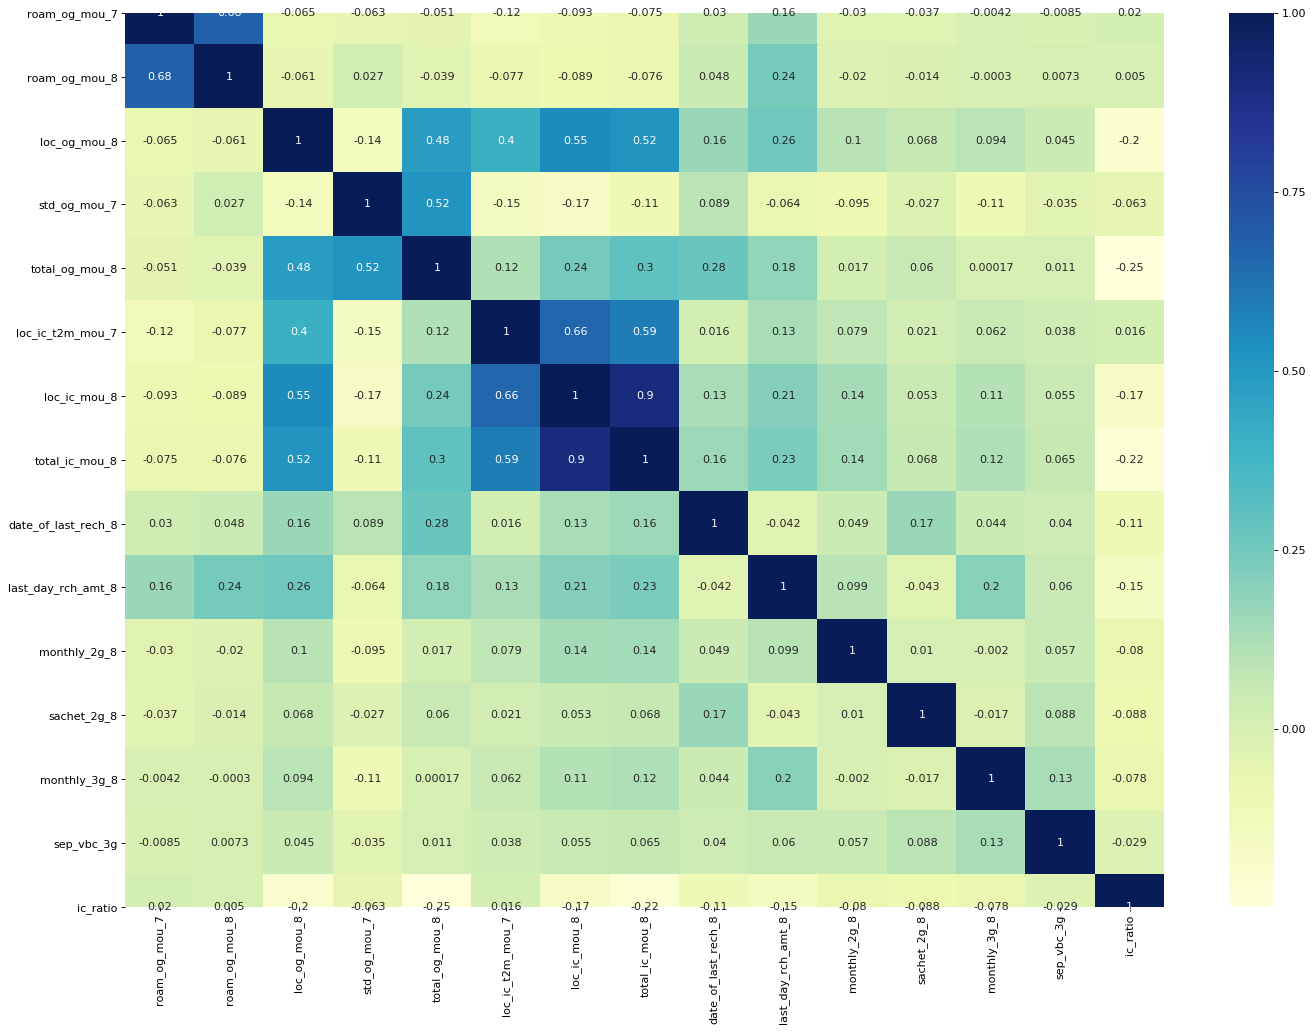

In [98]:
plt.figure(figsize=(18,13), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

### Removal of variables and updation of the Model

Some of the variable have high VIFs although the p-value of them are in a good state. Those variables are insignificant and can be dropped.

In [99]:
col = col.drop('loc_ic_mou_8', 1)
col

Index(['roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_8', 'std_og_mou_7',
       'total_og_mou_8', 'loc_ic_t2m_mou_7', 'total_ic_mou_8',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sep_vbc_3g', 'ic_ratio'],
      dtype='object')

In [100]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(list(y_train),X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37972
Model:                            GLM   Df Residuals:                    37957
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14413.
Date:                Sun, 26 Jan 2020   Deviance:                       28826.
Time:                        00:40:20   Pearson chi2:                 8.10e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.1327      0.094     44.152      0.000       3.949       4.316
roam_og_mou_7           6.1246      0.544     11.266      0.000       5.059       7.190
roam_og_mou_8          10.2051      0.945     10.795      0.000       8.352      12.058
loc_og_mou_8          -18.7347      1.442    -12.988      0.000     -21.562     -15.908
std_og_mou_7            8.8073      0.430     20.489      0.000       7.965       9.650
total_og_mou_8        -12.0955      0.691    -17.516      0.000     -13.449     -10.742
loc_ic_t2m_mou_7       10.0692      0.606     16.604      0.000       8.881      11.258
total_ic_mou_8        -24.1979      0.891    -27.155      0.000     -25.944     -22.451
date_of_last_rech_8    -4.1364      0.106    -38.871      0.000      -4.345      -3.928
last_day_rch_amt_8    -25.2930      0.912    -27.728      0.000     -27.081     -23.505
monthly_2g_8           -7.8977      0.433    -18.230      0.000      -8.747      -7.049
sachet_2g_8            -5.6004      0.561     -9.991      0.000      -6.699      -4.502
monthly_3g_8           -9.4442      0.789    -11.973      0.000     -10.990      -7.898
sep_vbc_3g            -54.5790      6.025     -9.058      0.000     -66.389     -42.769
ic_ratio               18.9512      0.864     21.934      0.000      17.258      20.645
=======================================================================================
"""

In [101]:
# Get the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0   0.086064
1   0.006116
2   0.403761
3   0.683132
4   0.996503
5   0.003550
6   0.213932
7   0.033878
8   0.780872
9   0.326087
dtype: float64

In [102]:
y_train_pred_final = pd.DataFrame({'Churned':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

Churned  Churn_Prob
0  0       0.086064   
1  0       0.006116   
2  0       0.403761   
3  1       0.683132   
4  1       0.996503

In [103]:
values = y_train_pred_final.Churned * y_train_pred_final.Churn_Prob
m = values.mean()
m

0.3828639798971015

In [104]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > m else 0)
y_train_pred_final.head()

Churned  Churn_Prob  predicted
0  0       0.086064     0        
1  0       0.006116     0        
2  0       0.403761     1        
3  1       0.683132     1        
4  1       0.996503     1

In [105]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

[[14664  4322]
 [ 1827 17159]]


In [106]:
print(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))

0.8380648899188876


In [107]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
4   total_og_mou_8      3.840000
7   date_of_last_rech_8 3.170000
3   std_og_mou_7        2.860000
6   total_ic_mou_8      2.770000
2   loc_og_mou_8        2.730000
5   loc_ic_t2m_mou_7    2.430000
1   roam_og_mou_8       2.110000
0   roam_og_mou_7       2.070000
8   last_day_rch_amt_8  1.560000
13  ic_ratio            1.280000
11  monthly_3g_8        1.140000
10  sachet_2g_8         1.130000
9   monthly_2g_8        1.110000
12  sep_vbc_3g          1.040000

### Remove the Variable and Update the Model

In [109]:
col = col.drop('total_og_mou_8', 1)
col

Index(['roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_8', 'std_og_mou_7',
       'loc_ic_t2m_mou_7', 'total_ic_mou_8', 'date_of_last_rech_8',
       'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'sep_vbc_3g', 'ic_ratio'],
      dtype='object')

In [110]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(list(y_train),X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37972
Model:                            GLM   Df Residuals:                    37958
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14594.
Date:                Sun, 26 Jan 2020   Deviance:                       29187.
Time:                        00:42:05   Pearson chi2:                 2.90e+06
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.5235      0.093     48.560      0.000       4.341       4.706
roam_og_mou_7           4.9517      0.540      9.166      0.000       3.893       6.010
roam_og_mou_8          13.3012      0.966     13.776      0.000      11.409      15.194
loc_og_mou_8          -28.1535      1.372    -20.522      0.000     -30.842     -25.465
std_og_mou_7            2.9487      0.246     11.970      0.000       2.466       3.432
loc_ic_t2m_mou_7       11.6983      0.619     18.890      0.000      10.485      12.912
total_ic_mou_8        -26.8218      0.910    -29.472      0.000     -28.606     -25.038
date_of_last_rech_8    -4.5895      0.105    -43.613      0.000      -4.796      -4.383
last_day_rch_amt_8    -28.6613      0.929    -30.858      0.000     -30.482     -26.841
monthly_2g_8           -7.7700      0.436    -17.803      0.000      -8.625      -6.915
sachet_2g_8            -5.5439      0.559     -9.911      0.000      -6.640      -4.448
monthly_3g_8           -8.9300      0.792    -11.277      0.000     -10.482      -7.378
sep_vbc_3g            -54.4757      6.113     -8.911      0.000     -66.458     -42.494
ic_ratio               21.3530      0.891     23.976      0.000      19.608      23.099
=======================================================================================
"""

In [111]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0   0.069658
1   0.006748
2   0.432977
3   0.619286
4   0.998012
5   0.002372
6   0.225193
7   0.023667
8   0.755265
9   0.312432
dtype: float64

In [112]:
y_train_pred_final = pd.DataFrame({'Churned':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

Churned  Churn_Prob
0  0       0.069658   
1  0       0.006748   
2  0       0.432977   
3  1       0.619286   
4  1       0.998012

In [113]:
values = y_train_pred_final.Churned * y_train_pred_final.Churn_Prob
m = values.mean()
m

0.38098721963302234

In [114]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > m else 0)
y_train_pred_final.head()

Churned  Churn_Prob  predicted
0  0       0.069658     0        
1  0       0.006748     0        
2  0       0.432977     1        
3  1       0.619286     1        
4  1       0.998012     1

In [115]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

[[14248  4738]
 [ 1727 17259]]


In [116]:
print(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))

0.8297429685031076


In [117]:
#VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
6   date_of_last_rech_8 3.160000
5   total_ic_mou_8      2.730000
4   loc_ic_t2m_mou_7    2.410000
1   roam_og_mou_8       2.090000
0   roam_og_mou_7       2.060000
2   loc_og_mou_8        1.930000
3   std_og_mou_7        1.620000
7   last_day_rch_amt_8  1.540000
12  ic_ratio            1.260000
10  monthly_3g_8        1.140000
9   sachet_2g_8         1.130000
8   monthly_2g_8        1.110000
11  sep_vbc_3g          1.040000

### Remove the Variable and Update the Model

In [118]:
col = col.drop('date_of_last_rech_8', 1)
col

Index(['roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_8', 'std_og_mou_7',
       'loc_ic_t2m_mou_7', 'total_ic_mou_8', 'last_day_rch_amt_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sep_vbc_3g',
       'ic_ratio'],
      dtype='object')

In [119]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(list(y_train),X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37972
Model:                            GLM   Df Residuals:                    37959
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15742.
Date:                Sun, 26 Jan 2020   Deviance:                       31484.
Time:                        00:43:29   Pearson chi2:                 1.32e+07
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.7751      0.028     27.502      0.000       0.720       0.830
roam_og_mou_7          4.3224      0.501      8.627      0.000       3.340       5.304
roam_og_mou_8          9.5609      0.888     10.762      0.000       7.820      11.302
loc_og_mou_8         -31.5136      1.329    -23.711      0.000     -34.119     -28.909
std_og_mou_7           1.3408      0.227      5.905      0.000       0.896       1.786
loc_ic_t2m_mou_7      15.5302      0.612     25.370      0.000      14.330      16.730
total_ic_mou_8       -30.9545      0.914    -33.854      0.000     -32.747     -29.162
last_day_rch_amt_8   -21.1348      0.859    -24.606      0.000     -22.818     -19.451
monthly_2g_8          -7.1933      0.408    -17.641      0.000      -7.993      -6.394
sachet_2g_8           -8.6110      0.557    -15.463      0.000      -9.702      -7.519
monthly_3g_8          -9.2007      0.739    -12.456      0.000     -10.648      -7.753
sep_vbc_3g           -55.3213      5.658     -9.778      0.000     -66.411     -44.232
ic_ratio              24.1981      0.919     26.342      0.000      22.398      25.999
======================================================================================
"""

In [120]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0   0.028913
1   0.005617
2   0.580894
3   0.480227
4   0.998957
5   0.004303
6   0.286276
7   0.026375
8   0.338894
9   0.245228
dtype: float64

In [121]:
y_train_pred_final = pd.DataFrame({'Churned':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

Churned  Churn_Prob
0  0       0.028913   
1  0       0.005617   
2  0       0.580894   
3  1       0.480227   
4  1       0.998957

In [122]:
values = y_train_pred_final.Churned * y_train_pred_final.Churn_Prob
m = values.mean()
m

0.3686728295724181

In [123]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > m else 0)
y_train_pred_final.head()

Churned  Churn_Prob  predicted
0  0       0.028913     0        
1  0       0.005617     0        
2  0       0.580894     1        
3  1       0.480227     1        
4  1       0.998957     1

In [124]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

[[12862  6124]
 [ 1750 17236]]


In [125]:
print(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))

0.7926366796586959


In [126]:
# VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
5   total_ic_mou_8     2.670000
4   loc_ic_t2m_mou_7   2.340000
1   roam_og_mou_8      2.090000
0   roam_og_mou_7      2.000000
2   loc_og_mou_8       1.860000
6   last_day_rch_amt_8 1.520000
3   std_og_mou_7       1.130000
11  ic_ratio           1.130000
9   monthly_3g_8       1.120000
7   monthly_2g_8       1.080000
8   sachet_2g_8        1.070000
10  sep_vbc_3g         1.040000

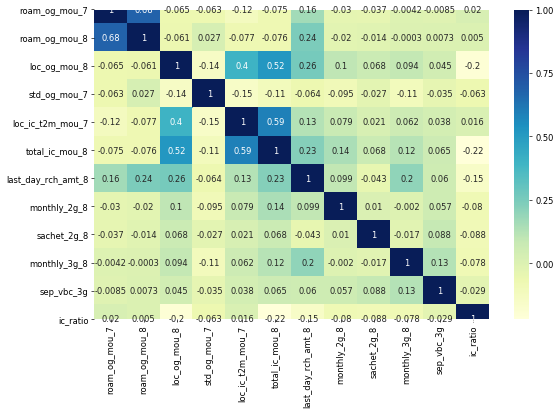

In [127]:
plt.figure(figsize=(10,7), dpi=60, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

### Remove the Variable and Update the Model

In [128]:
col = col.drop('total_ic_mou_8', 1)
col

Index(['roam_og_mou_7', 'roam_og_mou_8', 'loc_og_mou_8', 'std_og_mou_7',
       'loc_ic_t2m_mou_7', 'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sep_vbc_3g', 'ic_ratio'],
      dtype='object')

In [129]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(list(y_train),X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37972
Model:                            GLM   Df Residuals:                    37960
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16601.
Date:                Sun, 26 Jan 2020   Deviance:                       33202.
Time:                        00:45:03   Pearson chi2:                 1.21e+08
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5773      0.027     21.570      0.000       0.525       0.630
roam_og_mou_7          2.9885      0.478      6.249      0.000       2.051       3.926
roam_og_mou_8         13.1990      0.905     14.591      0.000      11.426      14.972
loc_og_mou_8         -53.7358      1.272    -42.251      0.000     -56.229     -51.243
std_og_mou_7           0.8987      0.218      4.117      0.000       0.471       1.327
loc_ic_t2m_mou_7       2.7774      0.381      7.299      0.000       2.032       3.523
last_day_rch_amt_8   -24.5659      0.870    -28.234      0.000     -26.271     -22.861
monthly_2g_8          -7.6693      0.398    -19.265      0.000      -8.450      -6.889
sachet_2g_8           -9.4321      0.551    -17.129      0.000     -10.511      -8.353
monthly_3g_8          -9.5809      0.728    -13.161      0.000     -11.008      -8.154
sep_vbc_3g           -59.1185      5.661    -10.443      0.000     -70.214     -48.023
ic_ratio              31.2805      0.972     32.170      0.000      29.375      33.186
======================================================================================
"""

In [130]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0   0.132993
1   0.005032
2   0.551757
3   0.423063
4   0.999773
5   0.005626
6   0.277944
7   0.351038
8   0.277403
9   0.145426
dtype: float64

In [131]:
y_train_pred_final = pd.DataFrame({'Churned':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

Churned  Churn_Prob
0  0       0.132993   
1  0       0.005032   
2  0       0.551757   
3  1       0.423063   
4  1       0.999773

In [132]:
values = y_train_pred_final.Churned * y_train_pred_final.Churn_Prob
m = values.mean()
m

0.3601469000033084

In [133]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > m else 0)
y_train_pred_final.head()

Churned  Churn_Prob  predicted
0  0       0.132993     0        
1  0       0.005032     0        
2  0       0.551757     1        
3  1       0.423063     1        
4  1       0.999773     1

In [134]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

[[12063  6923]
 [ 1693 17293]]


In [135]:
print(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))

0.773095965448225


In [136]:
# VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
1   roam_og_mou_8      2.080000
0   roam_og_mou_7      1.990000
2   loc_og_mou_8       1.660000
4   loc_ic_t2m_mou_7   1.640000
5   last_day_rch_amt_8 1.500000
3   std_og_mou_7       1.120000
8   monthly_3g_8       1.120000
10  ic_ratio           1.100000
6   monthly_2g_8       1.070000
7   sachet_2g_8        1.070000
9   sep_vbc_3g         1.040000

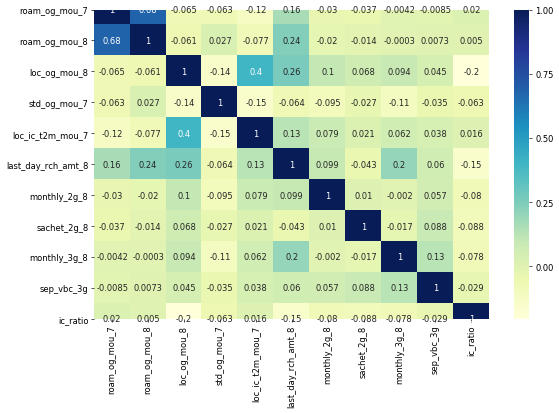

In [137]:
plt.figure(figsize=(10,7), dpi=60, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

### Remove the Variable and Update the Model

In [140]:
col = col.drop('roam_og_mou_8', 1)
col

Index(['roam_og_mou_7', 'loc_og_mou_8', 'std_og_mou_7', 'loc_ic_t2m_mou_7',
       'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'sep_vbc_3g', 'ic_ratio'],
      dtype='object')

In [141]:
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(list(y_train),X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37972
Model:                            GLM   Df Residuals:                    37961
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16712.
Date:                Sun, 26 Jan 2020   Deviance:                       33425.
Time:                        00:48:19   Pearson chi2:                 1.17e+08
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5623      0.027     20.876      0.000       0.510       0.615
roam_og_mou_7          7.3770      0.393     18.765      0.000       6.606       8.147
loc_og_mou_8         -54.7471      1.272    -43.031      0.000     -57.241     -52.253
std_og_mou_7           1.2067      0.216      5.599      0.000       0.784       1.629
loc_ic_t2m_mou_7       2.8830      0.380      7.582      0.000       2.138       3.628
last_day_rch_amt_8   -21.6678      0.887    -24.435      0.000     -23.406     -19.930
monthly_2g_8          -7.6537      0.395    -19.387      0.000      -8.427      -6.880
sachet_2g_8           -9.0628      0.544    -16.661      0.000     -10.129      -7.997
monthly_3g_8          -9.7003      0.727    -13.334      0.000     -11.126      -8.274
sep_vbc_3g           -57.3400      5.788     -9.907      0.000     -68.684     -45.996
ic_ratio              31.5861      0.977     32.345      0.000      29.672      33.500
======================================================================================
"""

In [142]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0   0.139827
1   0.005023
2   0.554866
3   0.440025
4   0.999784
5   0.005601
6   0.283551
7   0.366550
8   0.290033
9   0.149820
dtype: float64

In [143]:
y_train_pred_final = pd.DataFrame({'Churned':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

Churned  Churn_Prob
0  0       0.139827   
1  0       0.005023   
2  0       0.554866   
3  1       0.440025   
4  1       0.999784

In [144]:
values = y_train_pred_final.Churned * y_train_pred_final.Churn_Prob
m = values.mean()
m

0.35868000493781027

In [145]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > m else 0)
y_train_pred_final.head()

Churned  Churn_Prob  predicted
0  0       0.139827     0        
1  0       0.005023     0        
2  0       0.554866     1        
3  1       0.440025     1        
4  1       0.999784     1

In [146]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

[[11934  7052]
 [ 1709 17277]]


In [147]:
print(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))

0.7692773622669336


In [148]:
# VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features      VIF
1  loc_og_mou_8       1.650000
3  loc_ic_t2m_mou_7   1.640000
4  last_day_rch_amt_8 1.440000
2  std_og_mou_7       1.110000
7  monthly_3g_8       1.110000
9  ic_ratio           1.100000
0  roam_og_mou_7      1.090000
5  monthly_2g_8       1.070000
6  sachet_2g_8        1.060000
8  sep_vbc_3g         1.040000

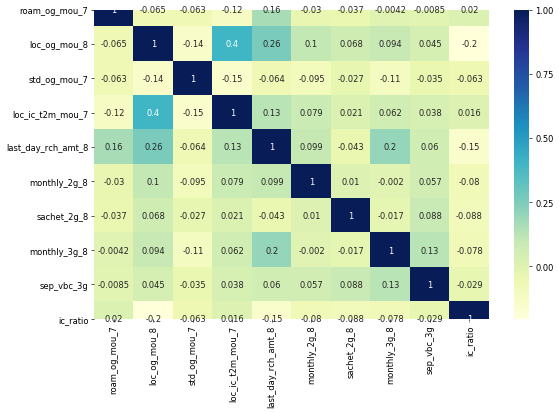

In [149]:
plt.figure(figsize=(10,7), dpi=60, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

## Our latest models features are as follows:

1. All variables have p-values equal to 0.
2. All the features have very low VIF values (less than 2) that means there is less muliticollinearity among the features as per heat map.
3. The overall accuracy of 0.77 at a probability threshold of 0.05 is quite acceptable. So we shouldn't drop more variables and we should proceed with the predictions using this model.

## Calculating Sensitivity and Specificity

In [151]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [152]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.909986305698936

In [153]:
# calculate specificity
TN / float(TN+FP)

0.628568418834931

In [154]:
# false postive rate
print(FP/ float(TN+FP))

0.371431581165069


In [155]:
# positive predicted value 
print (TP / float(TP+FP))

0.7101401619466481


In [156]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8747342959759584


In [157]:
### ROC Curve

In [158]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [159]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churned, y_train_pred_final.Churn_Prob, drop_intermediate = False )

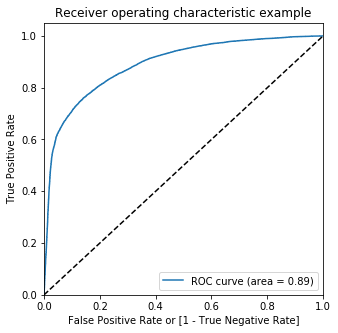

(array([0.        , 0.        , 0.        , ..., 0.99989466, 0.99994733,
        1.        ]),
 array([0.00000000e+00, 5.26703887e-05, 1.05340777e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([2.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.56649775e-20, 1.92074417e-25, 1.52056676e-26]))

In [160]:
draw_roc(y_train_pred_final.Churned, y_train_pred_final.Churn_Prob)

In [161]:
### The area under the curve

In [162]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [163]:
auc = auc_val(fpr,tpr)
auc

0.890360904405579

## Finding the Probablity Cutoff Point

In [166]:
# create columns with different probability cutoffs 
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churned  Churn_Prob  predicted  0.0  0.01  0.02  0.03  0.04  0.05  0.06  \
0  0       0.139827     0          1    1     1     1     1     1     1      
1  0       0.005023     0          1    0     0     0     0     0     0      
2  0       0.554866     1          1    1     1     1     1     1     1      
3  1       0.440025     1          1    1     1     1     1     1     1      
4  1       0.999784     1          1    1     1     1     1     1     1      

   0.07  0.08  0.09  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  
0  1     1     1     1    0    0    0    0    0    0    0    0    
1  0     0     0     0    0    0    0    0    0    0    0    0    
2  1     1     1     1    1    1    1    1    0    0    0    0    
3  1     1     1     1    1    1    1    0    0    0    0    0    
4  1     1     1     1    1    1    1    1    1    1    1    1

In [167]:
#calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

             prob  accuracy    sensi    speci
0.000000 0.000000 0.500000  1.000000 0.000000
0.100000 0.100000 0.648241  0.979880 0.316602
0.200000 0.200000 0.709417  0.957390 0.461445
0.300000 0.300000 0.750158  0.929158 0.571158
0.400000 0.400000 0.778310  0.889023 0.667597
0.500000 0.500000 0.801512  0.826820 0.776204
0.600000 0.600000 0.807779  0.731012 0.884547
0.700000 0.700000 0.761061  0.552934 0.969188
0.800000 0.800000 0.713104  0.446803 0.979406
0.900000 0.900000 0.641525  0.296113 0.986938


In [168]:
### Plot of the accuracy, sensitivity and specificity for various probabilities

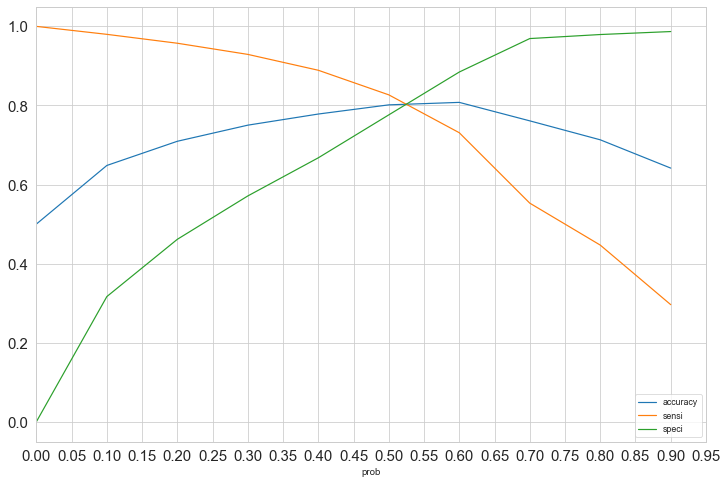

In [169]:
sns.set_style("whitegrid") 
sns.set_context("paper") 
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(12,8))
#plt.xticks(np.arange(0, 1, step=0.05), size = 15)
plt.xticks(np.arange(0, 1, step=0.05), size = 15)                    
plt.yticks(size = 15)
plt.show()



In [ ]:
### 0.525 is the optimum point to take it as a cutoff probability

In [170]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.525 else 0)

y_train_pred_final.head()

Churned  Churn_Prob  predicted  0.0  0.01  0.02  0.03  0.04  0.05  0.06  \
0  0       0.139827     0          1    1     1     1     1     1     1      
1  0       0.005023     0          1    0     0     0     0     0     0      
2  0       0.554866     1          1    1     1     1     1     1     1      
3  1       0.440025     1          1    1     1     1     1     1     1      
4  1       0.999784     1          1    1     1     1     1     1     1      

   0.07  0.08  0.09  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  \
0  1     1     1     1    0    0    0    0    0    0    0    0     
1  0     0     0     0    0    0    0    0    0    0    0    0     
2  1     1     1     1    1    1    1    1    0    0    0    0     
3  1     1     1     1    1    1    1    0    0    0    0    0     
4  1     1     1     1    1    1    1    1    1    1    1    1     

   final_predicted  
0  0                
1  0                
2  1                
3  0                
4  1

In [171]:
metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.final_predicted)

0.8051458969767197

In [172]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.final_predicted)
confusion1

array([[15260,  3726],
       [ 3673, 15313]], dtype=int64)

In [173]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [174]:
#sensitivity 
TP / float(TP+FN)

0.8065416622774676

In [175]:
#specificity
TN / float(TN+FP)

0.8037501316759718

In [176]:
#false postive rate
print(FP/ float(TN+FP))

0.19624986832402824


In [177]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8042964441409738


In [178]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8060001056356626


In [179]:
# Precision and Recall

In [180]:
precision = confusion1[1,1]/(confusion1[0,1]+confusion1[1,1])
precision

0.8042964441409738

In [181]:
recall = confusion1[1,1]/(confusion1[1,0]+confusion1[1,1])
recall

0.8065416622774676

In [182]:
precision_score(y_train_pred_final.Churned, y_train_pred_final.final_predicted)

0.8042964441409738

In [183]:
recall_score(y_train_pred_final.Churned, y_train_pred_final.final_predicted)

0.8065416622774676

In [184]:
y_train_pred_final.Churned, y_train_pred_final.final_predicted

(0        0
 1        0
 2        0
 3        1
 4        1
 5        0
 6        0
 7        0
 8        0
 9        0
 10       0
 11       0
 12       0
 13       0
 14       0
 15       0
 16       0
 17       0
 18       0
 19       0
 20       1
 21       1
 22       0
 23       0
 24       0
 25       0
 26       0
 27       0
 28       0
 29       0
 30       0
 31       0
 32       0
 33       0
 34       0
 35       0
 36       0
 37       0
 38       0
 39       0
 40       0
 41       0
 42       0
 43       0
 44       0
 45       0
 46       0
 47       0
 48       0
 49       1
 50       0
 51       0
 52       0
 53       0
 54       0
 55       0
 56       0
 57       0
 58       1
 59       1
 60       0
 61       0
 62       0
 63       0
 64       0
 65       0
 66       0
 67       0
 68       0
 69       0
 70       0
 71       0
 72       0
 73       0
 74       1
 75       0
 76       0
 77       0
 78       0
 79       0
 80       0
 81       0
 82       1
 83 

In [185]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churned, y_train_pred_final.Churn_Prob)

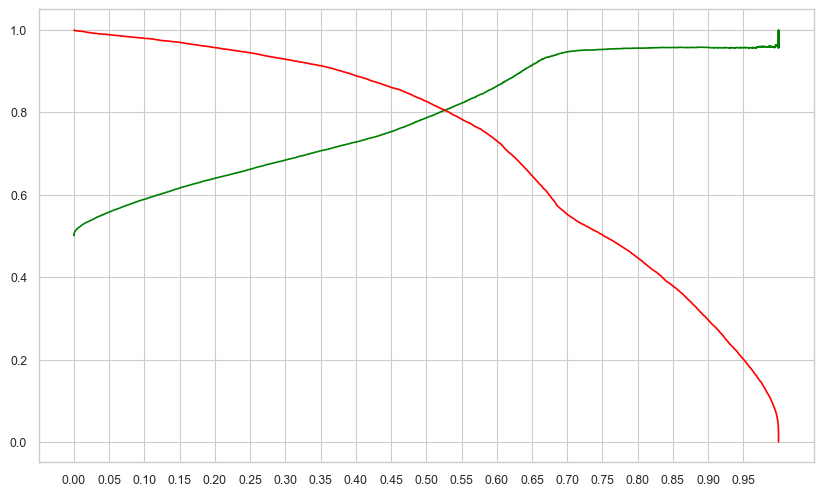

In [186]:
plt.figure(figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

### The optimal threshold value is 0.525

In [188]:
# F1 score
F1 = 2*(precision*recall)/(precision+recall)
F1

0.8054174884944115

In [189]:
# Making predictions on the test set
X_test1 = X_test # Added by Madhu
X_test = X_test[col]
X_test.head()

roam_og_mou_7  loc_og_mou_8  std_og_mou_7  loc_ic_t2m_mou_7  \
0 0.000000       0.040256      0.001681      0.000307            
1 0.000000       0.004125      0.208174      0.021776            
2 0.000000       0.001264      0.023378      0.008769            
3 0.238347       0.000000      0.000000      0.000000            
4 0.014946       0.022582      0.130428      0.080182            

   last_day_rch_amt_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  sep_vbc_3g  \
0 0.029220            0.000000      0.000000     0.000000      0.000000      
1 0.009440            0.000000      0.000000     0.000000      0.000000      
2 0.009890            0.000000      0.000000     0.000000      0.000000      
3 0.029220            0.000000      0.000000     0.000000      0.000000      
4 0.029220            0.000000      0.000000     0.000000      0.000000      

   ic_ratio  
0 0.000502   
1 0.000182   
2 0.000885   
3 0.000000   
4 0.000666

In [190]:
X_test_sm = sm.add_constant(X_test)

In [191]:
y_test_pred = res.predict(X_test_sm)

In [192]:
y_test_pred[:10]

0   0.094837
1   0.611037
2   0.589100
3   0.843888
4   0.312759
5   0.372658
6   0.071378
7   0.003213
8   0.343552
9   0.452472
dtype: float64

In [193]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [194]:
y_pred_1.head()

0
0 0.094837
1 0.611037
2 0.589100
3 0.843888
4 0.312759

In [195]:
y_test_df = pd.DataFrame(y_test)

In [196]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [197]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [198]:
y_pred_final.head()

churn_data        0
0  0          0.094837
1  0          0.611037
2  0          0.589100
3  0          0.843888
4  0          0.312759

In [199]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [200]:
y_pred_final.head()

churn_data  Churn_Prob
0  0          0.094837   
1  0          0.611037   
2  0          0.589100   
3  0          0.843888   
4  0          0.312759

In [201]:
y_pred_final.shape

(8892, 2)

In [202]:
# Using the probability threshold value 0f 0.525 on the test dataset to predict if a churn will take place.

y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.525 else 0)

In [203]:
y_pred_final.head()

churn_data  Churn_Prob  final_predicted
0  0          0.094837     0              
1  0          0.611037     1              
2  0          0.589100     1              
3  0          0.843888     1              
4  0          0.312759     0

In [204]:
#accuracy.
acc_score=metrics.accuracy_score(y_pred_final.churn_data, y_pred_final.final_predicted)
acc_score

0.7992577597840755

In [205]:
confusion_test = metrics.confusion_matrix(y_pred_final.churn_data, y_pred_final.final_predicted )
print(confusion_test)

[[6507 1613]
 [ 172  600]]


In [206]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [207]:
#sensitivity
TP / float(TP+FN)

0.7772020725388601

In [208]:
#specificity
TN / float(TN+FP)

0.8013546798029557

In [209]:
# false postive rate
print(FP/ float(TN+FP))

0.19864532019704434


In [210]:
# Positive predictive value 
print (TP / float(TP+FP))

0.2711251694532309


In [211]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9742476418625543


In [212]:
Precision = confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])
Precision

0.2711251694532309

In [213]:
Recall = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
Recall

0.7772020725388601

In [214]:
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.40201005025125625

In [215]:
print(classification_report(y_pred_final.churn_data, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      8120
           1       0.27      0.78      0.40       772

    accuracy                           0.80      8892
   macro avg       0.62      0.79      0.64      8892
weighted avg       0.91      0.80      0.84      8892



In [216]:
# Cross Validation Score To avoid overfitting, calculate the Cross Validation Score to see how our model performs

In [217]:
lr = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.92982456 0.93083671 0.93117409 0.93218623 0.93387314 0.93556005
 0.9358758  0.93690958 0.93690958 0.93690958]
0.9340059337314963


In [218]:
# ROC for test data set
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [219]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.churn_data, y_pred_final.Churn_Prob, drop_intermediate = False )

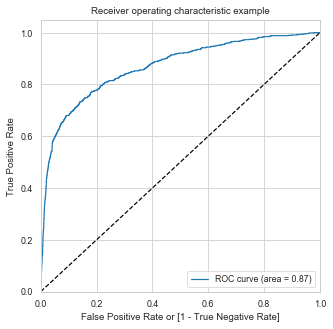

(array([0.00000000e+00, 0.00000000e+00, 1.23152709e-04, ...,
        9.99753695e-01, 9.99876847e-01, 1.00000000e+00]),
 array([0.        , 0.00129534, 0.00129534, ..., 1.        , 1.        ,
        1.        ]),
 array([2.00000000e+00, 1.00000000e+00, 9.99999999e-01, ...,
        4.39429154e-18, 1.05316438e-18, 3.42556492e-26]))

In [220]:
draw_roc(y_pred_final.churn_data, y_pred_final.Churn_Prob)

In [221]:
# Area under curve
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [222]:
auc = auc_val(fpr,tpr)
auc

0.868107914954436

As a rule of thumb, an AUC can be classed as follows,

0.90 - 1.00 = excellent

0.80 - 0.90 = good

0.70 - 0.80 = fair

0.60 - 0.70 = poor

0.50 - 0.60 = fail

Auc is 0.87, our model seems to be doing good on the test dataset.

In [223]:
### Feature Importance
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

roam_og_mou_7        7.38  
loc_og_mou_8         -54.75
std_og_mou_7         1.21  
loc_ic_t2m_mou_7     2.88  
last_day_rch_amt_8   -21.67
monthly_2g_8         -7.65 
sachet_2g_8          -9.06 
monthly_3g_8         -9.70 
sep_vbc_3g           -57.34
ic_ratio             31.59 
dtype: float64

In [224]:
#feature_importance = abs(new_params)
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

roam_og_mou_7        23.36  
loc_og_mou_8         -173.33
std_og_mou_7         3.82   
loc_ic_t2m_mou_7     9.13   
last_day_rch_amt_8   -68.60 
monthly_2g_8         -24.23 
sachet_2g_8          -28.69 
monthly_3g_8         -30.71 
sep_vbc_3g           -181.54
ic_ratio             100.00 
dtype: float64

In [225]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

roam_og_mou_7         8
loc_og_mou_8          1
std_og_mou_7          4
loc_ic_t2m_mou_7      7
last_day_rch_amt_8    6
monthly_2g_8          5
sachet_2g_8           2
monthly_3g_8          3
sep_vbc_3g            0
ic_ratio              9
dtype: int64

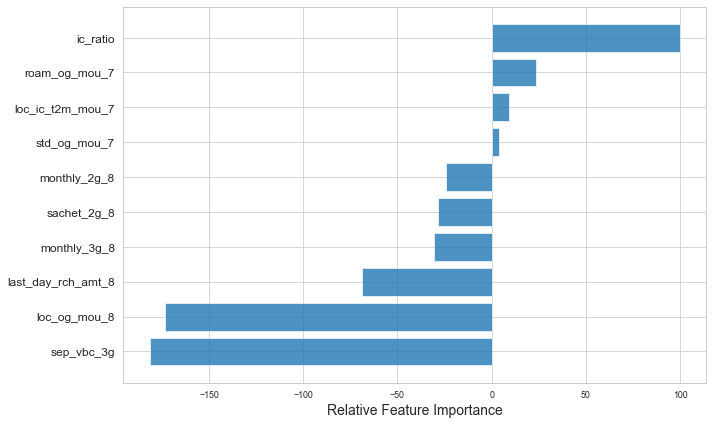

In [226]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:blue',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

In [227]:
### Top 3 feature selection.
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

index      0
9  ic_ratio         100.00
0  roam_og_mou_7    23.36 
3  loc_ic_t2m_mou_7 9.13

# PCA

In [228]:
#Improt PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [231]:
X_train.head()

arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 0.05    0.06    0.05    0.01         0.01         0.01           
1 0.07    0.08    0.11    0.01         0.00         0.00           
2 0.05    0.06    0.05    0.04         0.03         0.03           
3 0.04    0.08    0.03    0.08         0.14         0.03           
4 0.09    0.03    0.00    0.08         0.02         -0.00          

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0 0.04          0.03          0.02          0.00           0.00             
1 0.03          0.02          0.02          0.00           0.00             
2 0.01          0.01          0.01          0.00           0.00             
3 0.00          0.00          0.00          0.00           0.00             
4 0.05          0.01          0.01          0.00           0.00             

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0 0.00           0.00           0.00           0.00             
1 0.00           0.00           0.00           0.00             
2 0.00           0.00           0.00           0.00             
3 0.00           0.00           0.00           0.00             
4 0.01           0.00           0.00           0.00             

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0 0.01              0.01              0.01              0.03                
1 0.00              0.00              0.00              0.04                
2 0.00              0.00              0.00              0.00                
3 0.00              0.00              0.00              0.00                
4 0.10              0.02              0.00              0.01                

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0 0.04              0.06              0.00              0.03                
1 0.04              0.05              0.02              0.01                
2 0.00              0.00              0.00              0.00                
3 0.00              0.00              0.00              0.00                
4 0.00              0.02              0.01              0.00                

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0 0.02              0.00              0.00              0.00                
1 0.00              0.00              0.00              0.00                
2 0.00              0.00              0.00              0.06                
3 0.00              0.00              0.00              0.00                
4 0.01              0.00              0.00              -0.03               

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0 0.04          0.03          0.03          0.01                
1 0.03          0.03          0.03          0.01                
2 0.00          0.00          0.00          0.04                
3 0.00          0.00          0.00          0.08                
4 0.10          0.02          -0.00         0.00                

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0 0.00              0.00              0.01              0.00                
1 0.00              0.00              0.00              0.00                
2 0.03              0.04              0.01              0.00                
3 0.15              0.04              0.00              0.00                
4 0.00              0.01              0.05              0.01                

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0 0.00              0.12              0.12              0.06                
1 0.00              0.00              0.00              0.00                
2 0.00              0.00              0.00              0.00                
3 0.00              0.00              0.00              0.00                
4 0.01              0.01              0.00              0.00                

   std_og_mou_6  std_og_mou_7  std

In [229]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [230]:
print(pca.components_)
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 
                       'PC3':pca.components_[2],'PC4':pca.components_[3],
                       'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],
                       'Feature':colnames})
pcs_df.head(10)

[[ 2.55957480e-02 -4.32924212e-02 -5.37253080e-02 ...  1.09254232e-02
   8.44191249e-02  1.36577212e-02]
 [ 2.54649414e-02  3.20605811e-02 -6.67340320e-03 ...  1.01336623e-02
   8.81949757e-03 -2.67830750e-03]
 [-6.52387133e-02 -5.39745167e-02 -9.01081269e-03 ... -1.58266087e-02
  -9.76598340e-02 -4.29254233e-03]
 ...
 [ 9.51451485e-08  5.19423379e-08  4.25478432e-07 ... -1.56280542e-08
  -8.26580363e-08  1.30563692e-04]
 [ 8.71246119e-16 -2.98689947e-16 -4.79824537e-17 ...  9.71445147e-17
   2.08166817e-16  7.58421104e-15]
 [-0.00000000e+00  7.20746570e-16 -6.53498372e-17 ...  2.50884383e-16
  -5.55111512e-17  1.02123171e-14]]


PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10        Feature
0 0.03  0.03  -0.07 0.12  0.12  -0.10 0.06  0.01  0.07  0.01   arpu_6       
1 -0.04 0.03  -0.05 0.10  0.06  -0.03 -0.01 0.19  0.01  0.03   arpu_7       
2 -0.05 -0.01 -0.01 0.09  -0.01 -0.02 0.02  0.11  0.06  0.05   arpu_8       
3 0.00  0.09  -0.09 0.10  0.16  0.23  0.11  -0.01 0.18  -0.03  onnet_mou_6  
4 -0.03 0.08  -0.05 0.10  0.12  0.24  0.05  0.08  0.14  0.01   onnet_mou_7  
5 -0.03 0.03  -0.02 0.08  0.03  0.12  0.04  0.05  0.09  0.03   onnet_mou_8  
6 0.01  0.06  -0.10 0.15  0.12  -0.27 0.04  0.00  -0.16 0.01   offnet_mou_6 
7 -0.03 0.05  -0.06 0.12  0.07  -0.17 -0.02 0.09  -0.13 0.05   offnet_mou_7 
8 -0.02 0.01  -0.02 0.07  0.00  -0.06 -0.00 0.05  -0.02 0.04   offnet_mou_8 
9 0.00  -0.01 0.01  -0.01 -0.00 -0.00 0.02  0.01  -0.01 -0.00  roam_ic_mou_6

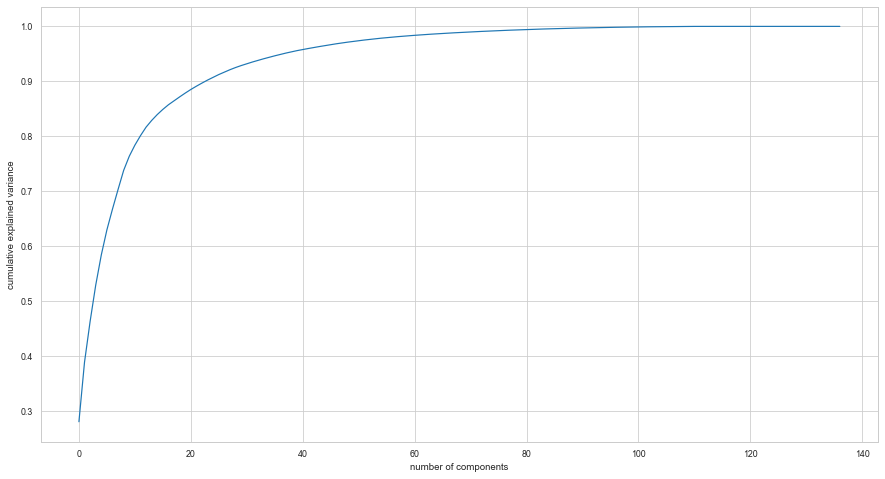

In [232]:
%matplotlib inline
fig = plt.figure(figsize = (15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### 40 components explain 95% of variance in the data.

In [233]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)

df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(37972, 40)

### Correlation matrix

In [234]:
corrmat = np.corrcoef(df_train_pca.transpose())

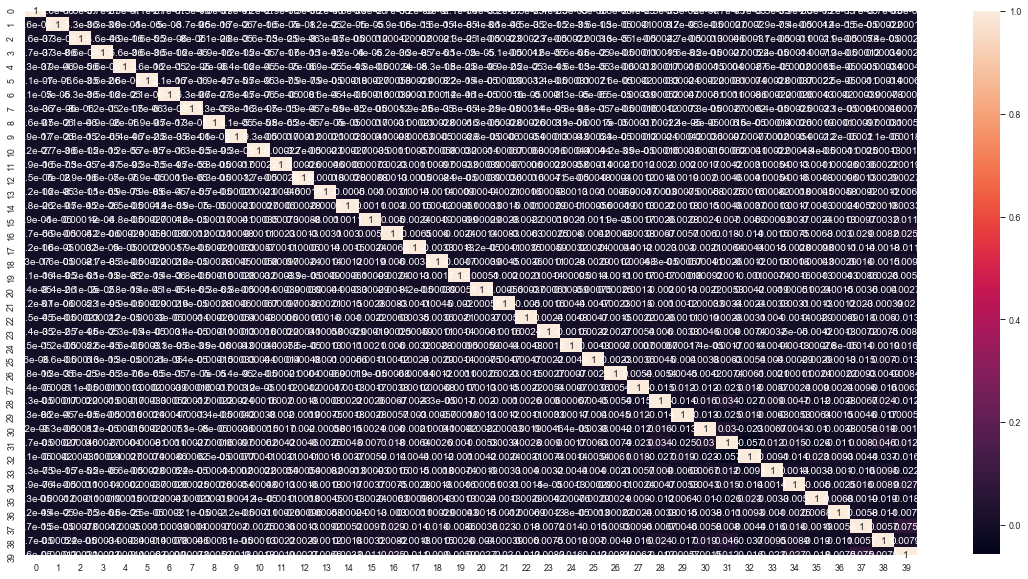

In [235]:
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [236]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# Observe that correlations are indeed very close to 0

max corr: 0.0750073551655598 , min corr:  -0.05746994412643501


In [237]:
#Apply selected components to the test data - 20 components
df_test_pca = pca_final.transform(X_test1)
df_test_pca.shape

(8892, 40)

# RandomForestClassifier with PCA

In [238]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

# fit
rfc.fit(df_train_pca,y_train)

# Making predictions
y_pred_default = rfc.predict(df_test_pca)

In [239]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[7726,  394],
       [ 317,  455]], dtype=int64)

In [240]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.5893782383419689
Specificity:  0.9514778325123153
false postive rate:  0.04852216748768473
positive predictive value:  0.535924617196702
Negative predictive value:  0.9605868457043392
Misclassification Rate:  0.07995951417004049


### Hyperparameter tuning for RandomForest

In [241]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

rf_with_pca = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
rf_with_pca.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [242]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0 3.80           0.01          0.05             0.00              
1 11.54          0.36          0.09             0.00              
2 16.91          0.05          0.13             0.00              
3 17.39          3.26          0.13             0.03              

  param_max_depth             params  split0_test_score  split1_test_score  \
0  2               {'max_depth': 2}  0.79               0.78                 
1  7               {'max_depth': 7}  0.84               0.86                 
2  12              {'max_depth': 12} 0.91               0.91                 
3  17              {'max_depth': 17} 0.95               0.94                 

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0 0.77               0.78               0.77               0.78               
1 0.86               0.86               0.86               0.86               
2 0.92               0.92               0.91               0.91               
3 0.95               0.95               0.94               0.95               

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0 0.01             4               0.80                0.79                  
1 0.01             3               0.87                0.87                  
2 0.00             2               0.95                0.95                  
3 0.00             1               0.99                0.99                  

   split2_train_score  split3_train_score  split4_train_score  \
0 0.77                0.78                0.77                  
1 0.87                0.87                0.87                  
2 0.95                0.95                0.95                  
3 0.99                0.99                0.99                  

   mean_train_score  std_train_score  
0 0.78              0.01              
1 0.87              0.00              
2 0.95              0.00              
3 0.99              0.00

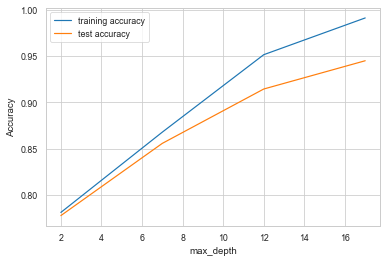

In [243]:
# plot accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [244]:
# GridSearchCV to find optimal n_estimators

# number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'n_estimators': range(100, 150, 40)}

rf = RandomForestClassifier(max_depth=10,class_weight='balanced')

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              r

In [245]:
scores = rf.cv_results_
pd.DataFrame(scores)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0 9.02           0.07          0.07             0.00              
1 13.27          0.19          0.10             0.00              

  param_n_estimators                 params  split0_test_score  \
0  100                {'n_estimators': 100} 0.88                 
1  140                {'n_estimators': 140} 0.88                 

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0 0.90               0.90               0.89               0.89                 
1 0.89               0.90               0.90               0.89                 

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0 0.89             0.01             2               0.92                  
1 0.89             0.01             1               0.92                  

   split1_train_score  split2_train_score  split3_train_score  \
0 0.92                0.92                0.92                  
1 0.92                0.92                0.92                  

   split4_train_score  mean_train_score  std_train_score  
0 0.92                0.92              0.00              
1 0.92                0.92              0.00

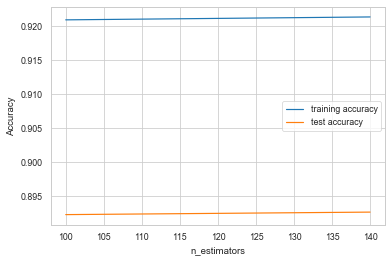

In [246]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [247]:
# GridSearchCV to find optimal max_features

n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              r

In [248]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0 6.50           0.28          0.07             0.00              
1 12.61          0.52          0.07             0.00              
2 20.65          0.18          0.07             0.00              
3 29.28          0.28          0.07             0.00              
4 36.89          2.28          0.07             0.00              

  param_max_features                params  split0_test_score  \
0  4                  {'max_features': 4}  0.88                 
1  8                  {'max_features': 8}  0.89                 
2  14                 {'max_features': 14} 0.89                 
3  20                 {'max_features': 20} 0.90                 
4  24                 {'max_features': 24} 0.90                 

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0 0.89               0.90               0.89               0.88                 
1 0.90               0.90               0.90               0.89                 
2 0.90               0.91               0.90               0.90                 
3 0.91               0.91               0.91               0.90                 
4 0.91               0.91               0.91               0.90                 

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0 0.89             0.01             5               0.92                  
1 0.90             0.00             4               0.93                  
2 0.90             0.00             3               0.93                  
3 0.91             0.01             2               0.94                  
4 0.91             0.01             1               0.94                  

   split1_train_score  split2_train_score  split3_train_score  \
0 0.92                0.91                0.91                  
1 0.92                0.92                0.92                  
2 0.93                0.93                0.93                  
3 0.94                0.94                0.93                  
4 0.94                0.94                0.94                  

   split4_train_score  mean_train_score  std_train_score  
0 0.92                0.92              0.00              
1 0.92                0.92              0.00              
2 0.93                0.93              0.00              
3 0.94                0.94              0.00              
4 0.94                0.94              0.00

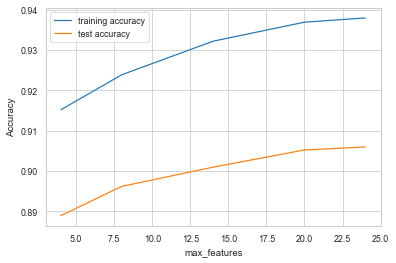

In [249]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [250]:
# GridSearchCV to find optimal min_samples_leaf

n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [251]:
scores = rf.cv_results_
pd.DataFrame(scores)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0 8.70           0.24          0.07             0.00              
1 8.22           0.21          0.07             0.01              
2 7.75           0.32          0.07             0.00              
3 7.55           0.19          0.06             0.00              
4 6.85           0.32          0.06             0.01              
5 6.29           0.12          0.05             0.00              

  param_min_samples_leaf                     params  split0_test_score  \
0  100                    {'min_samples_leaf': 100} 0.85                 
1  150                    {'min_samples_leaf': 150} 0.84                 
2  200                    {'min_samples_leaf': 200} 0.84                 
3  250                    {'min_samples_leaf': 250} 0.83                 
4  300                    {'min_samples_leaf': 300} 0.83                 
5  350                    {'min_samples_leaf': 350} 0.83                 

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0 0.86               0.87               0.87               0.86                 
1 0.85               0.86               0.86               0.85                 
2 0.85               0.85               0.85               0.85                 
3 0.84               0.85               0.85               0.85                 
4 0.84               0.84               0.84               0.85                 
5 0.84               0.84               0.84               0.84                 

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0 0.86             0.01             1               0.88                  
1 0.85             0.01             2               0.87                  
2 0.85             0.01             3               0.86                  
3 0.84             0.01             4               0.86                  
4 0.84             0.01             5               0.85                  
5 0.84             0.01             6               0.85                  

   split1_train_score  split2_train_score  split3_train_score  \
0 0.87                0.87                0.87                  
1 0.86                0.86                0.86                  
2 0.86                0.85                0.86                  
3 0.85                0.85                0.85                  
4 0.84                0.84                0.85                  
5 0.84                0.84                0.84                  

   split4_train_score  mean_train_score  std_train_score  
0 0.87                0.87              0.00              
1 0.86                0.86              0.00              
2 0.86                0.86              0.00              
3 0.85                0.85              0.00              
4 0.85                0.85              0.00              
5 0.84                0.84              0.00

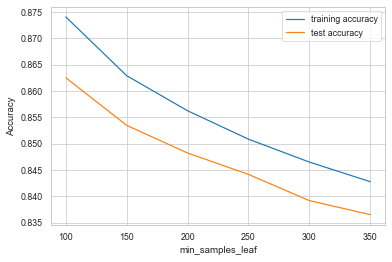

In [252]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [253]:
# GridSearchCV to find optimal min_samples_split

n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [254]:
scores = rf.cv_results_
pd.DataFrame(scores)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0 10.63          0.09          0.08             0.00              
1 10.28          0.09          0.07             0.00              
2 9.99           0.05          0.07             0.00              
3 9.62           0.06          0.07             0.00              
4 9.56           0.23          0.07             0.00              
5 9.98           0.42          0.07             0.00              

  param_min_samples_split                      params  split0_test_score  \
0  200                     {'min_samples_split': 200} 0.86                 
1  250                     {'min_samples_split': 250} 0.86                 
2  300                     {'min_samples_split': 300} 0.85                 
3  350                     {'min_samples_split': 350} 0.85                 
4  400                     {'min_samples_split': 400} 0.85                 
5  450                     {'min_samples_split': 450} 0.85                 

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0 0.88               0.89               0.88               0.88                 
1 0.87               0.88               0.88               0.87                 
2 0.87               0.88               0.87               0.87                 
3 0.87               0.87               0.87               0.86                 
4 0.86               0.87               0.87               0.86                 
5 0.86               0.86               0.87               0.86                 

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0 0.88             0.01             1               0.90                  
1 0.87             0.01             2               0.89                  
2 0.87             0.01             3               0.89                  
3 0.86             0.01             4               0.88                  
4 0.86             0.01             5               0.88                  
5 0.86             0.01             6               0.88                  

   split1_train_score  split2_train_score  split3_train_score  \
0 0.90                0.89                0.90                  
1 0.89                0.89                0.89                  
2 0.88                0.88                0.88                  
3 0.88                0.88                0.88                  
4 0.88                0.87                0.87                  
5 0.87                0.87                0.87                  

   split4_train_score  mean_train_score  std_train_score  
0 0.90                0.90              0.00              
1 0.89                0.89              0.00              
2 0.88                0.88              0.00              
3 0.88                0.88              0.00              
4 0.87                0.87              0.00              
5 0.87                0.87              0.00

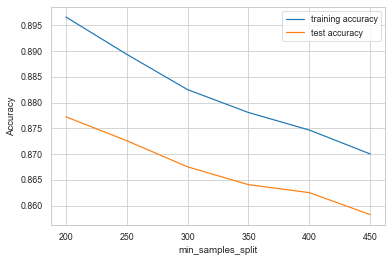

In [255]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [256]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 5, n_jobs=-1, verbose = 1)

In [257]:
# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 10.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs...
                                              oob_score=False,
                                              ra

In [258]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of ',grid_search.best_score_,' using ',grid_search.best_params_)

We can get accuracy of  0.8603711256053815  using  {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [259]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=8,
                             n_estimators=300)

In [260]:
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [261]:
# predict
y_pred_default = rfc.predict(df_test_pca)

In [262]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score:  ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      8120
           1       0.37      0.73      0.49       772

    accuracy                           0.87      8892
   macro avg       0.67      0.80      0.71      8892
weighted avg       0.92      0.87      0.89      8892

[[7151  969]
 [ 210  562]]
accuracy_score:   0.8674089068825911


In [263]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[7151,  969],
       [ 210,  562]], dtype=int64)

In [264]:
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

print('Accuracy Score:  ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:   0.8674089068825911
Sensitivity:  0.727979274611399
Specificity:  0.8806650246305419
false postive rate:  0.11933497536945813
positive predictive value:  0.36708033964728937
Negative predictive value:  0.97147126749083
Misclassification Rate:  0.1325910931174089
